In [1]:
import keras
from keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Activation,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.datasets import cifar10
import numpy as np
import pandas as pd 
import os


Using TensorFlow backend.


In [2]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
classes = np.unique(train_labels)
num_classes= len(classes)

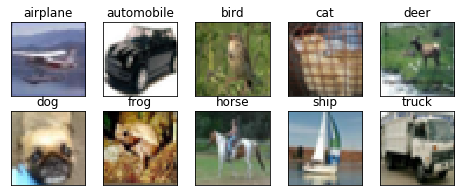

In [4]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(features_idx[img_num,::])
plt.show()

In [5]:
print(np.shape(train_labels))
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)
print(np.shape(train_labels))


(50000, 1)
(50000, 10)


(50000, 1)
(50000, 10)


In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

model.fit(train_features,train_labels,
              batch_size=256,
              epochs=5,
              validation_data=(test_features, test_labels),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5


  256/50000 [..............................] - ETA: 4:42 - loss: 2.3075 - acc: 0.1133

  512/50000 [..............................] - ETA: 4:09 - loss: 2.3141 - acc: 0.0996

  768/50000 [..............................] - ETA: 3:54 - loss: 2.3083 - acc: 0.1003

 1024/50000 [..............................] - ETA: 3:46 - loss: 2.3064 - acc: 0.1064

 1280/50000 [..............................] - ETA: 3:39 - loss: 2.3054 - acc: 0.1133

 1536/50000 [..............................] - ETA: 3:35 - loss: 2.3016 - acc: 0.1172

 1792/50000 [>.............................] - ETA: 3:32 - loss: 2.2992 - acc: 0.1200

 2048/50000 [>.............................] - ETA: 3:29 - loss: 2.2981 - acc: 0.1196

 2304/50000 [>.............................] - ETA: 3:27 - loss: 2.2980 - acc: 0.1176

 2560/50000 [>.............................] - ETA: 3:24 - loss: 2.2971 - acc: 0.1191

 2816/50000 [>.............................] - ETA: 3:23 - loss: 2.2963 - acc: 0.1207

 3072/50000 [>.............................] - ETA: 3:22 - loss: 2.2960 - acc: 0.1198

 3328/50000 [>.............................] - ETA: 3:31 - loss: 2.2955 - acc: 0.1208

 3584/50000 [=>............................] - ETA: 3:45 - loss: 2.2959 - acc: 0.1164

 3840/50000 [=>............................] - ETA: 3:47 - loss: 2.2947 - acc: 0.1185

 4096/50000 [=>............................] - ETA: 3:48 - loss: 2.2935 - acc: 0.1191

 4352/50000 [=>............................] - ETA: 3:50 - loss: 2.2929 - acc: 0.1190

 4608/50000 [=>............................] - ETA: 3:50 - loss: 2.2916 - acc: 0.1211

 4864/50000 [=>............................] - ETA: 3:50 - loss: 2.2907 - acc: 0.1219

 5120/50000 [==>...........................] - ETA: 3:49 - loss: 2.2900 - acc: 0.1229

 5376/50000 [==>...........................] - ETA: 3:49 - loss: 2.2890 - acc: 0.1235

 5632/50000 [==>...........................] - ETA: 3:51 - loss: 2.2883 - acc: 0.1227

 5888/50000 [==>...........................] - ETA: 3:51 - loss: 2.2876 - acc: 0.1230

 6144/50000 [==>...........................] - ETA: 3:50 - loss: 2.2863 - acc: 0.1227

 6400/50000 [==>...........................] - ETA: 3:49 - loss: 2.2849 - acc: 0.1244

 6656/50000 [==>...........................] - ETA: 3:49 - loss: 2.2848 - acc: 0.1236

 6912/50000 [===>..........................] - ETA: 3:48 - loss: 2.2836 - acc: 0.1253

 7168/50000 [===>..........................] - ETA: 3:49 - loss: 2.2822 - acc: 0.1260

 7424/50000 [===>..........................] - ETA: 3:48 - loss: 2.2812 - acc: 0.1261

 7680/50000 [===>..........................] - ETA: 3:46 - loss: 2.2800 - acc: 0.1279

 7936/50000 [===>..........................] - ETA: 3:45 - loss: 2.2777 - acc: 0.1298

 8192/50000 [===>..........................] - ETA: 3:45 - loss: 2.2755 - acc: 0.1322

 8448/50000 [====>.........................] - ETA: 3:44 - loss: 2.2745 - acc: 0.1320

 8704/50000 [====>.........................] - ETA: 3:41 - loss: 2.2724 - acc: 0.1340

 8960/50000 [====>.........................] - ETA: 3:39 - loss: 2.2713 - acc: 0.1350

 9216/50000 [====>.........................] - ETA: 3:36 - loss: 2.2698 - acc: 0.1363

 9472/50000 [====>.........................] - ETA: 3:35 - loss: 2.2683 - acc: 0.1370

 9728/50000 [====>.........................] - ETA: 3:33 - loss: 2.2671 - acc: 0.1373

 9984/50000 [====>.........................] - ETA: 3:31 - loss: 2.2653 - acc: 0.1386

10240/50000 [=====>........................] - ETA: 3:29 - loss: 2.2630 - acc: 0.1420

10496/50000 [=====>........................] - ETA: 3:26 - loss: 2.2618 - acc: 0.1421

10752/50000 [=====>........................] - ETA: 3:25 - loss: 2.2600 - acc: 0.1439

11008/50000 [=====>........................] - ETA: 3:28 - loss: 2.2586 - acc: 0.1445

11264/50000 [=====>........................] - ETA: 3:26 - loss: 2.2568 - acc: 0.1458

11520/50000 [=====>........................] - ETA: 3:25 - loss: 2.2550 - acc: 0.1468

11776/50000 [======>.......................] - ETA: 3:23 - loss: 2.2533 - acc: 0.1478

12032/50000 [======>.......................] - ETA: 3:21 - loss: 2.2512 - acc: 0.1491

12288/50000 [======>.......................] - ETA: 3:19 - loss: 2.2491 - acc: 0.1501

12544/50000 [======>.......................] - ETA: 3:17 - loss: 2.2474 - acc: 0.1511

12800/50000 [======>.......................] - ETA: 3:15 - loss: 2.2454 - acc: 0.1520

13056/50000 [======>.......................] - ETA: 3:13 - loss: 2.2424 - acc: 0.1540

13312/50000 [======>.......................] - ETA: 3:11 - loss: 2.2388 - acc: 0.1562

13568/50000 [=======>......................] - ETA: 3:09 - loss: 2.2360 - acc: 0.1574

13824/50000 [=======>......................] - ETA: 3:08 - loss: 2.2344 - acc: 0.1584

14080/50000 [=======>......................] - ETA: 3:07 - loss: 2.2319 - acc: 0.1594

14336/50000 [=======>......................] - ETA: 3:05 - loss: 2.2292 - acc: 0.1612

14592/50000 [=======>......................] - ETA: 3:04 - loss: 2.2270 - acc: 0.1622

14848/50000 [=======>......................] - ETA: 3:03 - loss: 2.2253 - acc: 0.1631

15104/50000 [========>.....................] - ETA: 3:01 - loss: 2.2228 - acc: 0.1647

15360/50000 [========>.....................] - ETA: 3:00 - loss: 2.2212 - acc: 0.1658

15616/50000 [========>.....................] - ETA: 2:59 - loss: 2.2188 - acc: 0.1670

15872/50000 [========>.....................] - ETA: 2:57 - loss: 2.2163 - acc: 0.1682

16128/50000 [========>.....................] - ETA: 2:56 - loss: 2.2138 - acc: 0.1690

16384/50000 [========>.....................] - ETA: 2:55 - loss: 2.2116 - acc: 0.1697

16640/50000 [========>.....................] - ETA: 2:53 - loss: 2.2101 - acc: 0.1703

16896/50000 [=========>....................] - ETA: 2:52 - loss: 2.2078 - acc: 0.1716

17152/50000 [=========>....................] - ETA: 2:51 - loss: 2.2055 - acc: 0.1725

17408/50000 [=========>....................] - ETA: 2:49 - loss: 2.2035 - acc: 0.1743

17664/50000 [=========>....................] - ETA: 2:48 - loss: 2.2009 - acc: 0.1754

17920/50000 [=========>....................] - ETA: 2:46 - loss: 2.1993 - acc: 0.1763

18176/50000 [=========>....................] - ETA: 2:44 - loss: 2.1974 - acc: 0.1772

18432/50000 [==========>...................] - ETA: 2:43 - loss: 2.1955 - acc: 0.1781

18688/50000 [==========>...................] - ETA: 2:41 - loss: 2.1939 - acc: 0.1789

18944/50000 [==========>...................] - ETA: 2:40 - loss: 2.1927 - acc: 0.1801

19200/50000 [==========>...................] - ETA: 2:38 - loss: 2.1915 - acc: 0.1809

19456/50000 [==========>...................] - ETA: 2:37 - loss: 2.1897 - acc: 0.1816

19712/50000 [==========>...................] - ETA: 2:36 - loss: 2.1878 - acc: 0.1828

19968/50000 [==========>...................] - ETA: 2:35 - loss: 2.1859 - acc: 0.1837

20224/50000 [===========>..................] - ETA: 2:33 - loss: 2.1841 - acc: 0.1843

20480/50000 [===========>..................] - ETA: 2:31 - loss: 2.1816 - acc: 0.1854

20736/50000 [===========>..................] - ETA: 2:30 - loss: 2.1797 - acc: 0.1862

20992/50000 [===========>..................] - ETA: 2:29 - loss: 2.1774 - acc: 0.1872

21248/50000 [===========>..................] - ETA: 2:27 - loss: 2.1756 - acc: 0.1883

21504/50000 [===========>..................] - ETA: 2:27 - loss: 2.1750 - acc: 0.1886

21760/50000 [============>.................] - ETA: 2:26 - loss: 2.1748 - acc: 0.1886

22016/50000 [============>.................] - ETA: 2:25 - loss: 2.1735 - acc: 0.1891

22272/50000 [============>.................] - ETA: 2:24 - loss: 2.1717 - acc: 0.1902

22528/50000 [============>.................] - ETA: 2:22 - loss: 2.1702 - acc: 0.1909

22784/50000 [============>.................] - ETA: 2:21 - loss: 2.1688 - acc: 0.1916

23040/50000 [============>.................] - ETA: 2:20 - loss: 2.1677 - acc: 0.1922

23296/50000 [============>.................] - ETA: 2:19 - loss: 2.1664 - acc: 0.1929

23552/50000 [=============>................] - ETA: 2:18 - loss: 2.1645 - acc: 0.1933

23808/50000 [=============>................] - ETA: 2:16 - loss: 2.1630 - acc: 0.1938

24064/50000 [=============>................] - ETA: 2:15 - loss: 2.1620 - acc: 0.1942

24320/50000 [=============>................] - ETA: 2:14 - loss: 2.1604 - acc: 0.1951

24576/50000 [=============>................] - ETA: 2:13 - loss: 2.1592 - acc: 0.1954

24832/50000 [=============>................] - ETA: 2:11 - loss: 2.1580 - acc: 0.1959

25088/50000 [==============>...............] - ETA: 2:10 - loss: 2.1568 - acc: 0.1963

25344/50000 [==============>...............] - ETA: 2:09 - loss: 2.1555 - acc: 0.1972

25600/50000 [==============>...............] - ETA: 2:07 - loss: 2.1550 - acc: 0.1974

25856/50000 [==============>...............] - ETA: 2:06 - loss: 2.1534 - acc: 0.1981

26112/50000 [==============>...............] - ETA: 2:05 - loss: 2.1521 - acc: 0.1988

26368/50000 [==============>...............] - ETA: 2:03 - loss: 2.1506 - acc: 0.1997

26624/50000 [==============>...............] - ETA: 2:02 - loss: 2.1498 - acc: 0.2001

26880/50000 [===============>..............] - ETA: 2:00 - loss: 2.1486 - acc: 0.2007

27136/50000 [===============>..............] - ETA: 1:59 - loss: 2.1478 - acc: 0.2013

27392/50000 [===============>..............] - ETA: 1:58 - loss: 2.1466 - acc: 0.2017

27648/50000 [===============>..............] - ETA: 1:56 - loss: 2.1453 - acc: 0.2024

27904/50000 [===============>..............] - ETA: 1:55 - loss: 2.1444 - acc: 0.2026

28160/50000 [===============>..............] - ETA: 1:54 - loss: 2.1434 - acc: 0.2031

28416/50000 [================>.............] - ETA: 1:52 - loss: 2.1417 - acc: 0.2041

28672/50000 [================>.............] - ETA: 1:51 - loss: 2.1409 - acc: 0.2046

28928/50000 [================>.............] - ETA: 1:49 - loss: 2.1390 - acc: 0.2056

29184/50000 [================>.............] - ETA: 1:48 - loss: 2.1376 - acc: 0.2062

29440/50000 [================>.............] - ETA: 1:47 - loss: 2.1362 - acc: 0.2071

29696/50000 [================>.............] - ETA: 1:45 - loss: 2.1353 - acc: 0.2075

29952/50000 [================>.............] - ETA: 1:44 - loss: 2.1342 - acc: 0.2078

30208/50000 [=================>............] - ETA: 1:43 - loss: 2.1335 - acc: 0.2083

30464/50000 [=================>............] - ETA: 1:41 - loss: 2.1322 - acc: 0.2086

30720/50000 [=================>............] - ETA: 1:40 - loss: 2.1319 - acc: 0.2091

30976/50000 [=================>............] - ETA: 1:39 - loss: 2.1314 - acc: 0.2095

31232/50000 [=================>............] - ETA: 1:37 - loss: 2.1303 - acc: 0.2099

31488/50000 [=================>............] - ETA: 1:36 - loss: 2.1289 - acc: 0.2106

31744/50000 [==================>...........] - ETA: 1:35 - loss: 2.1279 - acc: 0.2110

32000/50000 [==================>...........] - ETA: 1:33 - loss: 2.1270 - acc: 0.2112

32256/50000 [==================>...........] - ETA: 1:32 - loss: 2.1261 - acc: 0.2120

32512/50000 [==================>...........] - ETA: 1:31 - loss: 2.1251 - acc: 0.2126

32768/50000 [==================>...........] - ETA: 1:29 - loss: 2.1246 - acc: 0.2129

33024/50000 [==================>...........] - ETA: 1:28 - loss: 2.1234 - acc: 0.2133

33280/50000 [==================>...........] - ETA: 1:27 - loss: 2.1221 - acc: 0.2137

33536/50000 [===================>..........] - ETA: 1:25 - loss: 2.1207 - acc: 0.2139

33792/50000 [===================>..........] - ETA: 1:24 - loss: 2.1196 - acc: 0.2140

34048/50000 [===================>..........] - ETA: 1:22 - loss: 2.1180 - acc: 0.2147

34304/50000 [===================>..........] - ETA: 1:21 - loss: 2.1173 - acc: 0.2150

34560/50000 [===================>..........] - ETA: 1:20 - loss: 2.1166 - acc: 0.2157

34816/50000 [===================>..........] - ETA: 1:19 - loss: 2.1155 - acc: 0.2161

35072/50000 [====================>.........] - ETA: 1:17 - loss: 2.1146 - acc: 0.2164

35328/50000 [====================>.........] - ETA: 1:16 - loss: 2.1138 - acc: 0.2167

35584/50000 [====================>.........] - ETA: 1:15 - loss: 2.1126 - acc: 0.2176

35840/50000 [====================>.........] - ETA: 1:13 - loss: 2.1115 - acc: 0.2179

36096/50000 [====================>.........] - ETA: 1:12 - loss: 2.1109 - acc: 0.2182

36352/50000 [====================>.........] - ETA: 1:11 - loss: 2.1100 - acc: 0.2184

36608/50000 [====================>.........] - ETA: 1:09 - loss: 2.1094 - acc: 0.2187

36864/50000 [=====================>........] - ETA: 1:08 - loss: 2.1081 - acc: 0.2192

37120/50000 [=====================>........] - ETA: 1:06 - loss: 2.1070 - acc: 0.2197

37376/50000 [=====================>........] - ETA: 1:05 - loss: 2.1062 - acc: 0.2198

37632/50000 [=====================>........] - ETA: 1:04 - loss: 2.1054 - acc: 0.2202

37888/50000 [=====================>........] - ETA: 1:03 - loss: 2.1042 - acc: 0.2206

38144/50000 [=====================>........] - ETA: 1:01 - loss: 2.1032 - acc: 0.2211

38400/50000 [======================>.......] - ETA: 1:00 - loss: 2.1025 - acc: 0.2215

38656/50000 [======================>.......] - ETA: 59s - loss: 2.1013 - acc: 0.2219 

38912/50000 [======================>.......] - ETA: 57s - loss: 2.0998 - acc: 0.2225

39168/50000 [======================>.......] - ETA: 56s - loss: 2.0987 - acc: 0.2229

39424/50000 [======================>.......] - ETA: 55s - loss: 2.0977 - acc: 0.2233

39680/50000 [======================>.......] - ETA: 53s - loss: 2.0969 - acc: 0.2237

39936/50000 [======================>.......] - ETA: 52s - loss: 2.0955 - acc: 0.2241

40192/50000 [=======================>......] - ETA: 51s - loss: 2.0950 - acc: 0.2245

40448/50000 [=======================>......] - ETA: 49s - loss: 2.0941 - acc: 0.2248

40704/50000 [=======================>......] - ETA: 48s - loss: 2.0928 - acc: 0.2255

40960/50000 [=======================>......] - ETA: 47s - loss: 2.0921 - acc: 0.2259

41216/50000 [=======================>......] - ETA: 45s - loss: 2.0913 - acc: 0.2260

41472/50000 [=======================>......] - ETA: 44s - loss: 2.0902 - acc: 0.2266

41728/50000 [========================>.....] - ETA: 43s - loss: 2.0893 - acc: 0.2272

41984/50000 [========================>.....] - ETA: 41s - loss: 2.0881 - acc: 0.2279

42240/50000 [========================>.....] - ETA: 40s - loss: 2.0871 - acc: 0.2282

42496/50000 [========================>.....] - ETA: 39s - loss: 2.0862 - acc: 0.2288

42752/50000 [========================>.....] - ETA: 37s - loss: 2.0852 - acc: 0.2294

43008/50000 [========================>.....] - ETA: 36s - loss: 2.0838 - acc: 0.2303

43264/50000 [========================>.....] - ETA: 35s - loss: 2.0824 - acc: 0.2312

43520/50000 [=========================>....] - ETA: 33s - loss: 2.0817 - acc: 0.2317

43776/50000 [=========================>....] - ETA: 32s - loss: 2.0808 - acc: 0.2322

44032/50000 [=========================>....] - ETA: 31s - loss: 2.0802 - acc: 0.2326

44288/50000 [=========================>....] - ETA: 29s - loss: 2.0791 - acc: 0.2330

44544/50000 [=========================>....] - ETA: 28s - loss: 2.0782 - acc: 0.2334

44800/50000 [=========================>....] - ETA: 27s - loss: 2.0772 - acc: 0.2337

45056/50000 [==========================>...] - ETA: 25s - loss: 2.0764 - acc: 0.2341

45312/50000 [==========================>...] - ETA: 24s - loss: 2.0754 - acc: 0.2345

45568/50000 [==========================>...] - ETA: 23s - loss: 2.0744 - acc: 0.2351

45824/50000 [==========================>...] - ETA: 21s - loss: 2.0734 - acc: 0.2355

46080/50000 [==========================>...] - ETA: 20s - loss: 2.0721 - acc: 0.2363

46336/50000 [==========================>...] - ETA: 19s - loss: 2.0709 - acc: 0.2369

46592/50000 [==========================>...] - ETA: 17s - loss: 2.0692 - acc: 0.2377

46848/50000 [===========================>..] - ETA: 16s - loss: 2.0684 - acc: 0.2383

47104/50000 [===========================>..] - ETA: 15s - loss: 2.0674 - acc: 0.2385

47360/50000 [===========================>..] - ETA: 13s - loss: 2.0671 - acc: 0.2386

47616/50000 [===========================>..] - ETA: 12s - loss: 2.0660 - acc: 0.2390

47872/50000 [===========================>..] - ETA: 11s - loss: 2.0652 - acc: 0.2392

48128/50000 [===========================>..] - ETA: 9s - loss: 2.0642 - acc: 0.2397 

48384/50000 [============================>.] - ETA: 8s - loss: 2.0633 - acc: 0.2401

48640/50000 [============================>.] - ETA: 7s - loss: 2.0625 - acc: 0.2405

48896/50000 [============================>.] - ETA: 5s - loss: 2.0617 - acc: 0.2409

49152/50000 [============================>.] - ETA: 4s - loss: 2.0606 - acc: 0.2415

49408/50000 [============================>.] - ETA: 3s - loss: 2.0599 - acc: 0.2419

49664/50000 [============================>.] - ETA: 1s - loss: 2.0594 - acc: 0.2421

49920/50000 [============================>.] - ETA: 0s - loss: 2.0587 - acc: 0.2424

50000/50000 [==============================] - 277s 6ms/step - loss: 2.0583 - acc: 0.2426 - val_loss: 1.8313 - val_acc: 0.3655


Epoch 2/5


  256/50000 [..............................] - ETA: 4:04 - loss: 1.8487 - acc: 0.3125

  512/50000 [..............................] - ETA: 4:02 - loss: 1.8390 - acc: 0.3457

  768/50000 [..............................] - ETA: 4:01 - loss: 1.8745 - acc: 0.3307

 1024/50000 [..............................] - ETA: 4:01 - loss: 1.8714 - acc: 0.3252

 1280/50000 [..............................] - ETA: 4:00 - loss: 1.8591 - acc: 0.3336

 1536/50000 [..............................] - ETA: 3:59 - loss: 1.8442 - acc: 0.3405

 1792/50000 [>.............................] - ETA: 3:58 - loss: 1.8532 - acc: 0.3365

 2048/50000 [>.............................] - ETA: 3:56 - loss: 1.8582 - acc: 0.3369

 2304/50000 [>.............................] - ETA: 3:55 - loss: 1.8643 - acc: 0.3333

 2560/50000 [>.............................] - ETA: 3:56 - loss: 1.8621 - acc: 0.3336

 2816/50000 [>.............................] - ETA: 3:57 - loss: 1.8587 - acc: 0.3359

 3072/50000 [>.............................] - ETA: 3:56 - loss: 1.8572 - acc: 0.3327

 3328/50000 [>.............................] - ETA: 3:54 - loss: 1.8620 - acc: 0.3320

 3584/50000 [=>............................] - ETA: 3:53 - loss: 1.8634 - acc: 0.3301

 3840/50000 [=>............................] - ETA: 3:51 - loss: 1.8638 - acc: 0.3302

 4096/50000 [=>............................] - ETA: 3:49 - loss: 1.8600 - acc: 0.3333

 4352/50000 [=>............................] - ETA: 3:49 - loss: 1.8670 - acc: 0.3309

 4608/50000 [=>............................] - ETA: 3:49 - loss: 1.8698 - acc: 0.3301

 4864/50000 [=>............................] - ETA: 3:50 - loss: 1.8741 - acc: 0.3287

 5120/50000 [==>...........................] - ETA: 3:49 - loss: 1.8762 - acc: 0.3281

 5376/50000 [==>...........................] - ETA: 3:49 - loss: 1.8765 - acc: 0.3257

 5632/50000 [==>...........................] - ETA: 3:49 - loss: 1.8760 - acc: 0.3260

 5888/50000 [==>...........................] - ETA: 3:48 - loss: 1.8781 - acc: 0.3256

 6144/50000 [==>...........................] - ETA: 3:47 - loss: 1.8787 - acc: 0.3244

 6400/50000 [==>...........................] - ETA: 3:46 - loss: 1.8762 - acc: 0.3256

 6656/50000 [==>...........................] - ETA: 3:45 - loss: 1.8758 - acc: 0.3265

 6912/50000 [===>..........................] - ETA: 3:43 - loss: 1.8730 - acc: 0.3283

 7168/50000 [===>..........................] - ETA: 3:42 - loss: 1.8728 - acc: 0.3280

 7424/50000 [===>..........................] - ETA: 3:40 - loss: 1.8723 - acc: 0.3276

 7680/50000 [===>..........................] - ETA: 3:40 - loss: 1.8697 - acc: 0.3284

 7936/50000 [===>..........................] - ETA: 3:39 - loss: 1.8699 - acc: 0.3261

 8192/50000 [===>..........................] - ETA: 3:38 - loss: 1.8686 - acc: 0.3270

 8448/50000 [====>.........................] - ETA: 3:37 - loss: 1.8682 - acc: 0.3275

 8704/50000 [====>.........................] - ETA: 3:35 - loss: 1.8660 - acc: 0.3298

 8960/50000 [====>.........................] - ETA: 3:33 - loss: 1.8612 - acc: 0.3310

 9216/50000 [====>.........................] - ETA: 3:32 - loss: 1.8585 - acc: 0.3325

 9472/50000 [====>.........................] - ETA: 3:31 - loss: 1.8567 - acc: 0.3329

 9728/50000 [====>.........................] - ETA: 3:29 - loss: 1.8565 - acc: 0.3325

 9984/50000 [====>.........................] - ETA: 3:28 - loss: 1.8562 - acc: 0.3327

10240/50000 [=====>........................] - ETA: 3:27 - loss: 1.8589 - acc: 0.3312

10496/50000 [=====>........................] - ETA: 3:25 - loss: 1.8593 - acc: 0.3309

10752/50000 [=====>........................] - ETA: 3:24 - loss: 1.8611 - acc: 0.3299

11008/50000 [=====>........................] - ETA: 3:22 - loss: 1.8615 - acc: 0.3311

11264/50000 [=====>........................] - ETA: 3:21 - loss: 1.8598 - acc: 0.3320

11520/50000 [=====>........................] - ETA: 3:19 - loss: 1.8585 - acc: 0.3329

11776/50000 [======>.......................] - ETA: 3:17 - loss: 1.8574 - acc: 0.3336

12032/50000 [======>.......................] - ETA: 3:16 - loss: 1.8557 - acc: 0.3339

12288/50000 [======>.......................] - ETA: 3:14 - loss: 1.8541 - acc: 0.3347

12544/50000 [======>.......................] - ETA: 3:13 - loss: 1.8528 - acc: 0.3350

12800/50000 [======>.......................] - ETA: 3:12 - loss: 1.8517 - acc: 0.3355

13056/50000 [======>.......................] - ETA: 3:10 - loss: 1.8498 - acc: 0.3358

13312/50000 [======>.......................] - ETA: 3:09 - loss: 1.8497 - acc: 0.3362

13568/50000 [=======>......................] - ETA: 3:07 - loss: 1.8480 - acc: 0.3362

13824/50000 [=======>......................] - ETA: 3:07 - loss: 1.8468 - acc: 0.3361

14080/50000 [=======>......................] - ETA: 3:05 - loss: 1.8456 - acc: 0.3369

14336/50000 [=======>......................] - ETA: 3:04 - loss: 1.8453 - acc: 0.3366

14592/50000 [=======>......................] - ETA: 3:02 - loss: 1.8462 - acc: 0.3362

14848/50000 [=======>......................] - ETA: 3:01 - loss: 1.8445 - acc: 0.3366

15104/50000 [========>.....................] - ETA: 3:00 - loss: 1.8426 - acc: 0.3370

15360/50000 [========>.....................] - ETA: 2:58 - loss: 1.8419 - acc: 0.3371

15616/50000 [========>.....................] - ETA: 2:57 - loss: 1.8424 - acc: 0.3370

15872/50000 [========>.....................] - ETA: 2:55 - loss: 1.8425 - acc: 0.3364

16128/50000 [========>.....................] - ETA: 2:54 - loss: 1.8418 - acc: 0.3365

16384/50000 [========>.....................] - ETA: 2:52 - loss: 1.8423 - acc: 0.3365

16640/50000 [========>.....................] - ETA: 2:51 - loss: 1.8413 - acc: 0.3372

16896/50000 [=========>....................] - ETA: 2:50 - loss: 1.8415 - acc: 0.3369

17152/50000 [=========>....................] - ETA: 2:48 - loss: 1.8429 - acc: 0.3364

17408/50000 [=========>....................] - ETA: 2:47 - loss: 1.8420 - acc: 0.3367

17664/50000 [=========>....................] - ETA: 2:46 - loss: 1.8408 - acc: 0.3374

17920/50000 [=========>....................] - ETA: 2:44 - loss: 1.8411 - acc: 0.3373

18176/50000 [=========>....................] - ETA: 2:43 - loss: 1.8398 - acc: 0.3372

18432/50000 [==========>...................] - ETA: 2:41 - loss: 1.8380 - acc: 0.3377

18688/50000 [==========>...................] - ETA: 2:40 - loss: 1.8385 - acc: 0.3376

18944/50000 [==========>...................] - ETA: 2:39 - loss: 1.8375 - acc: 0.3375

19200/50000 [==========>...................] - ETA: 2:37 - loss: 1.8367 - acc: 0.3377

19456/50000 [==========>...................] - ETA: 2:36 - loss: 1.8364 - acc: 0.3381

19712/50000 [==========>...................] - ETA: 2:35 - loss: 1.8355 - acc: 0.3382

19968/50000 [==========>...................] - ETA: 2:33 - loss: 1.8356 - acc: 0.3382

20224/50000 [===========>..................] - ETA: 2:32 - loss: 1.8356 - acc: 0.3380

20480/50000 [===========>..................] - ETA: 2:31 - loss: 1.8355 - acc: 0.3376

20736/50000 [===========>..................] - ETA: 2:29 - loss: 1.8349 - acc: 0.3373

20992/50000 [===========>..................] - ETA: 2:28 - loss: 1.8341 - acc: 0.3379

21248/50000 [===========>..................] - ETA: 2:27 - loss: 1.8332 - acc: 0.3388

21504/50000 [===========>..................] - ETA: 2:25 - loss: 1.8337 - acc: 0.3390

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.8329 - acc: 0.3391

22016/50000 [============>.................] - ETA: 2:23 - loss: 1.8320 - acc: 0.3392

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.8324 - acc: 0.3389

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.8314 - acc: 0.3395

22784/50000 [============>.................] - ETA: 2:18 - loss: 1.8312 - acc: 0.3399

23040/50000 [============>.................] - ETA: 2:17 - loss: 1.8302 - acc: 0.3402

23296/50000 [============>.................] - ETA: 2:16 - loss: 1.8302 - acc: 0.3402

23552/50000 [=============>................] - ETA: 2:14 - loss: 1.8306 - acc: 0.3400

23808/50000 [=============>................] - ETA: 2:13 - loss: 1.8313 - acc: 0.3399

24064/50000 [=============>................] - ETA: 2:12 - loss: 1.8303 - acc: 0.3411

24320/50000 [=============>................] - ETA: 2:11 - loss: 1.8298 - acc: 0.3411

24576/50000 [=============>................] - ETA: 2:09 - loss: 1.8296 - acc: 0.3414

24832/50000 [=============>................] - ETA: 2:08 - loss: 1.8296 - acc: 0.3417

25088/50000 [==============>...............] - ETA: 2:07 - loss: 1.8288 - acc: 0.3420

25344/50000 [==============>...............] - ETA: 2:05 - loss: 1.8290 - acc: 0.3419

25600/50000 [==============>...............] - ETA: 2:04 - loss: 1.8284 - acc: 0.3419

25856/50000 [==============>...............] - ETA: 2:03 - loss: 1.8263 - acc: 0.3426

26112/50000 [==============>...............] - ETA: 2:02 - loss: 1.8254 - acc: 0.3428

26368/50000 [==============>...............] - ETA: 2:00 - loss: 1.8248 - acc: 0.3429

26624/50000 [==============>...............] - ETA: 1:59 - loss: 1.8234 - acc: 0.3434

26880/50000 [===============>..............] - ETA: 1:58 - loss: 1.8225 - acc: 0.3433

27136/50000 [===============>..............] - ETA: 1:56 - loss: 1.8221 - acc: 0.3433

27392/50000 [===============>..............] - ETA: 1:55 - loss: 1.8213 - acc: 0.3437

27648/50000 [===============>..............] - ETA: 1:54 - loss: 1.8206 - acc: 0.3438

27904/50000 [===============>..............] - ETA: 1:52 - loss: 1.8208 - acc: 0.3436

28160/50000 [===============>..............] - ETA: 1:51 - loss: 1.8203 - acc: 0.3439

28416/50000 [================>.............] - ETA: 1:50 - loss: 1.8199 - acc: 0.3436

28672/50000 [================>.............] - ETA: 1:48 - loss: 1.8192 - acc: 0.3437

28928/50000 [================>.............] - ETA: 1:47 - loss: 1.8184 - acc: 0.3440

29184/50000 [================>.............] - ETA: 1:46 - loss: 1.8181 - acc: 0.3440

29440/50000 [================>.............] - ETA: 1:44 - loss: 1.8175 - acc: 0.3443

29696/50000 [================>.............] - ETA: 1:43 - loss: 1.8173 - acc: 0.3440

29952/50000 [================>.............] - ETA: 1:42 - loss: 1.8168 - acc: 0.3443

30208/50000 [=================>............] - ETA: 1:40 - loss: 1.8165 - acc: 0.3442

30464/50000 [=================>............] - ETA: 1:39 - loss: 1.8171 - acc: 0.3440

30720/50000 [=================>............] - ETA: 1:38 - loss: 1.8163 - acc: 0.3443

30976/50000 [=================>............] - ETA: 1:36 - loss: 1.8156 - acc: 0.3446

31232/50000 [=================>............] - ETA: 1:35 - loss: 1.8150 - acc: 0.3449

31488/50000 [=================>............] - ETA: 1:34 - loss: 1.8146 - acc: 0.3450

31744/50000 [==================>...........] - ETA: 1:33 - loss: 1.8146 - acc: 0.3449

32000/50000 [==================>...........] - ETA: 1:31 - loss: 1.8141 - acc: 0.3450

32256/50000 [==================>...........] - ETA: 1:30 - loss: 1.8135 - acc: 0.3453

32512/50000 [==================>...........] - ETA: 1:29 - loss: 1.8126 - acc: 0.3456

32768/50000 [==================>...........] - ETA: 1:27 - loss: 1.8119 - acc: 0.3456

33024/50000 [==================>...........] - ETA: 1:26 - loss: 1.8114 - acc: 0.3456

33280/50000 [==================>...........] - ETA: 1:25 - loss: 1.8109 - acc: 0.3458

33536/50000 [===================>..........] - ETA: 1:23 - loss: 1.8110 - acc: 0.3460

33792/50000 [===================>..........] - ETA: 1:22 - loss: 1.8109 - acc: 0.3460

34048/50000 [===================>..........] - ETA: 1:21 - loss: 1.8110 - acc: 0.3457

34304/50000 [===================>..........] - ETA: 1:19 - loss: 1.8104 - acc: 0.3459

34560/50000 [===================>..........] - ETA: 1:18 - loss: 1.8100 - acc: 0.3459

34816/50000 [===================>..........] - ETA: 1:17 - loss: 1.8093 - acc: 0.3462

35072/50000 [====================>.........] - ETA: 1:16 - loss: 1.8089 - acc: 0.3461

35328/50000 [====================>.........] - ETA: 1:14 - loss: 1.8080 - acc: 0.3464

35584/50000 [====================>.........] - ETA: 1:13 - loss: 1.8074 - acc: 0.3466

35840/50000 [====================>.........] - ETA: 1:12 - loss: 1.8067 - acc: 0.3467

36096/50000 [====================>.........] - ETA: 1:10 - loss: 1.8065 - acc: 0.3468

36352/50000 [====================>.........] - ETA: 1:09 - loss: 1.8066 - acc: 0.3468

36608/50000 [====================>.........] - ETA: 1:08 - loss: 1.8067 - acc: 0.3468

36864/50000 [=====================>........] - ETA: 1:06 - loss: 1.8068 - acc: 0.3470

37120/50000 [=====================>........] - ETA: 1:05 - loss: 1.8064 - acc: 0.3471

37376/50000 [=====================>........] - ETA: 1:03 - loss: 1.8061 - acc: 0.3473

37632/50000 [=====================>........] - ETA: 1:02 - loss: 1.8059 - acc: 0.3473

37888/50000 [=====================>........] - ETA: 1:01 - loss: 1.8054 - acc: 0.3474

38144/50000 [=====================>........] - ETA: 59s - loss: 1.8051 - acc: 0.3473 

38400/50000 [======================>.......] - ETA: 58s - loss: 1.8046 - acc: 0.3476

38656/50000 [======================>.......] - ETA: 57s - loss: 1.8039 - acc: 0.3478

38912/50000 [======================>.......] - ETA: 55s - loss: 1.8040 - acc: 0.3477

39168/50000 [======================>.......] - ETA: 54s - loss: 1.8033 - acc: 0.3479

39424/50000 [======================>.......] - ETA: 53s - loss: 1.8029 - acc: 0.3479

39680/50000 [======================>.......] - ETA: 51s - loss: 1.8026 - acc: 0.3480

39936/50000 [======================>.......] - ETA: 50s - loss: 1.8024 - acc: 0.3481

40192/50000 [=======================>......] - ETA: 49s - loss: 1.8016 - acc: 0.3484

40448/50000 [=======================>......] - ETA: 47s - loss: 1.8010 - acc: 0.3486

40704/50000 [=======================>......] - ETA: 46s - loss: 1.8012 - acc: 0.3482

40960/50000 [=======================>......] - ETA: 45s - loss: 1.8009 - acc: 0.3484

41216/50000 [=======================>......] - ETA: 43s - loss: 1.8006 - acc: 0.3486

41472/50000 [=======================>......] - ETA: 42s - loss: 1.8001 - acc: 0.3489

41728/50000 [========================>.....] - ETA: 41s - loss: 1.7991 - acc: 0.3493

41984/50000 [========================>.....] - ETA: 39s - loss: 1.7992 - acc: 0.3494

42240/50000 [========================>.....] - ETA: 38s - loss: 1.7996 - acc: 0.3491

42496/50000 [========================>.....] - ETA: 37s - loss: 1.7994 - acc: 0.3491

42752/50000 [========================>.....] - ETA: 36s - loss: 1.7989 - acc: 0.3492

43008/50000 [========================>.....] - ETA: 34s - loss: 1.7986 - acc: 0.3494

43264/50000 [========================>.....] - ETA: 33s - loss: 1.7980 - acc: 0.3496

43520/50000 [=========================>....] - ETA: 32s - loss: 1.7977 - acc: 0.3496

43776/50000 [=========================>....] - ETA: 30s - loss: 1.7976 - acc: 0.3498

44032/50000 [=========================>....] - ETA: 29s - loss: 1.7974 - acc: 0.3500

44288/50000 [=========================>....] - ETA: 28s - loss: 1.7970 - acc: 0.3501

44544/50000 [=========================>....] - ETA: 26s - loss: 1.7965 - acc: 0.3500

44800/50000 [=========================>....] - ETA: 25s - loss: 1.7965 - acc: 0.3500

45056/50000 [==========================>...] - ETA: 24s - loss: 1.7967 - acc: 0.3499

45312/50000 [==========================>...] - ETA: 23s - loss: 1.7960 - acc: 0.3503

45568/50000 [==========================>...] - ETA: 21s - loss: 1.7956 - acc: 0.3505

45824/50000 [==========================>...] - ETA: 20s - loss: 1.7953 - acc: 0.3506

46080/50000 [==========================>...] - ETA: 19s - loss: 1.7954 - acc: 0.3507

46336/50000 [==========================>...] - ETA: 18s - loss: 1.7950 - acc: 0.3508

46592/50000 [==========================>...] - ETA: 16s - loss: 1.7945 - acc: 0.3511

46848/50000 [===========================>..] - ETA: 15s - loss: 1.7948 - acc: 0.3511

47104/50000 [===========================>..] - ETA: 14s - loss: 1.7945 - acc: 0.3512

47360/50000 [===========================>..] - ETA: 12s - loss: 1.7944 - acc: 0.3513

47616/50000 [===========================>..] - ETA: 11s - loss: 1.7934 - acc: 0.3517

47872/50000 [===========================>..] - ETA: 10s - loss: 1.7931 - acc: 0.3519

48128/50000 [===========================>..] - ETA: 9s - loss: 1.7929 - acc: 0.3517 

48384/50000 [============================>.] - ETA: 7s - loss: 1.7926 - acc: 0.3516

48640/50000 [============================>.] - ETA: 6s - loss: 1.7923 - acc: 0.3518

48896/50000 [============================>.] - ETA: 5s - loss: 1.7916 - acc: 0.3520

49152/50000 [============================>.] - ETA: 4s - loss: 1.7914 - acc: 0.3521

49408/50000 [============================>.] - ETA: 2s - loss: 1.7913 - acc: 0.3521

49664/50000 [============================>.] - ETA: 1s - loss: 1.7911 - acc: 0.3522

49920/50000 [============================>.] - ETA: 0s - loss: 1.7907 - acc: 0.3525

50000/50000 [==============================] - 259s 5ms/step - loss: 1.7906 - acc: 0.3526 - val_loss: 1.7584 - val_acc: 0.3710


Epoch 3/5


  256/50000 [..............................] - ETA: 4:41 - loss: 1.8393 - acc: 0.2773

  512/50000 [..............................] - ETA: 4:44 - loss: 1.7473 - acc: 0.3516

  768/50000 [..............................] - ETA: 4:40 - loss: 1.7083 - acc: 0.3763

 1024/50000 [..............................] - ETA: 4:46 - loss: 1.6959 - acc: 0.3916

 1280/50000 [..............................] - ETA: 4:54 - loss: 1.6944 - acc: 0.3891

 1536/50000 [..............................] - ETA: 5:10 - loss: 1.7053 - acc: 0.3815

 1792/50000 [>.............................] - ETA: 5:15 - loss: 1.6948 - acc: 0.3850

 2048/50000 [>.............................] - ETA: 5:18 - loss: 1.6931 - acc: 0.3838

 2304/50000 [>.............................] - ETA: 5:11 - loss: 1.6962 - acc: 0.3898

 2560/50000 [>.............................] - ETA: 4:59 - loss: 1.6920 - acc: 0.3937

 2816/50000 [>.............................] - ETA: 4:51 - loss: 1.7013 - acc: 0.3906

 3072/50000 [>.............................] - ETA: 4:43 - loss: 1.6996 - acc: 0.3913

 3328/50000 [>.............................] - ETA: 4:36 - loss: 1.6989 - acc: 0.3873

 3584/50000 [=>............................] - ETA: 4:30 - loss: 1.6985 - acc: 0.3870

 3840/50000 [=>............................] - ETA: 4:26 - loss: 1.6991 - acc: 0.3872

 4096/50000 [=>............................] - ETA: 4:22 - loss: 1.6966 - acc: 0.3879

 4352/50000 [=>............................] - ETA: 4:20 - loss: 1.7037 - acc: 0.3860

 4608/50000 [=>............................] - ETA: 4:19 - loss: 1.7080 - acc: 0.3859

 4864/50000 [=>............................] - ETA: 4:19 - loss: 1.7070 - acc: 0.3838

 5120/50000 [==>...........................] - ETA: 4:19 - loss: 1.7059 - acc: 0.3852

 5376/50000 [==>...........................] - ETA: 4:15 - loss: 1.7053 - acc: 0.3849

 5632/50000 [==>...........................] - ETA: 4:12 - loss: 1.7041 - acc: 0.3860

 5888/50000 [==>...........................] - ETA: 4:11 - loss: 1.7059 - acc: 0.3871

 6144/50000 [==>...........................] - ETA: 4:07 - loss: 1.7045 - acc: 0.3879

 6400/50000 [==>...........................] - ETA: 4:04 - loss: 1.7074 - acc: 0.3875

 6656/50000 [==>...........................] - ETA: 4:04 - loss: 1.7063 - acc: 0.3884

 6912/50000 [===>..........................] - ETA: 4:03 - loss: 1.7047 - acc: 0.3890

 7168/50000 [===>..........................] - ETA: 4:03 - loss: 1.7062 - acc: 0.3877

 7424/50000 [===>..........................] - ETA: 4:00 - loss: 1.7075 - acc: 0.3866

 7680/50000 [===>..........................] - ETA: 4:00 - loss: 1.7095 - acc: 0.3850

 7936/50000 [===>..........................] - ETA: 4:01 - loss: 1.7126 - acc: 0.3841

 8192/50000 [===>..........................] - ETA: 3:59 - loss: 1.7112 - acc: 0.3845

 8448/50000 [====>.........................] - ETA: 3:56 - loss: 1.7083 - acc: 0.3871

 8704/50000 [====>.........................] - ETA: 3:55 - loss: 1.7062 - acc: 0.3867

 8960/50000 [====>.........................] - ETA: 3:52 - loss: 1.7064 - acc: 0.3868

 9216/50000 [====>.........................] - ETA: 3:49 - loss: 1.7071 - acc: 0.3873

 9472/50000 [====>.........................] - ETA: 3:46 - loss: 1.7079 - acc: 0.3875

 9728/50000 [====>.........................] - ETA: 3:43 - loss: 1.7101 - acc: 0.3861

 9984/50000 [====>.........................] - ETA: 3:40 - loss: 1.7102 - acc: 0.3851

10240/50000 [=====>........................] - ETA: 3:38 - loss: 1.7096 - acc: 0.3851

10496/50000 [=====>........................] - ETA: 3:35 - loss: 1.7111 - acc: 0.3850

10752/50000 [=====>........................] - ETA: 3:33 - loss: 1.7103 - acc: 0.3853

11008/50000 [=====>........................] - ETA: 3:31 - loss: 1.7107 - acc: 0.3856

11264/50000 [=====>........................] - ETA: 3:29 - loss: 1.7111 - acc: 0.3856

11520/50000 [=====>........................] - ETA: 3:26 - loss: 1.7130 - acc: 0.3840

11776/50000 [======>.......................] - ETA: 3:24 - loss: 1.7147 - acc: 0.3837

12032/50000 [======>.......................] - ETA: 3:22 - loss: 1.7148 - acc: 0.3839

12288/50000 [======>.......................] - ETA: 3:20 - loss: 1.7142 - acc: 0.3840

12544/50000 [======>.......................] - ETA: 3:18 - loss: 1.7125 - acc: 0.3845

12800/50000 [======>.......................] - ETA: 3:16 - loss: 1.7125 - acc: 0.3836

13056/50000 [======>.......................] - ETA: 3:14 - loss: 1.7125 - acc: 0.3833

13312/50000 [======>.......................] - ETA: 3:12 - loss: 1.7115 - acc: 0.3839

13568/50000 [=======>......................] - ETA: 3:10 - loss: 1.7107 - acc: 0.3839

13824/50000 [=======>......................] - ETA: 3:08 - loss: 1.7095 - acc: 0.3847

14080/50000 [=======>......................] - ETA: 3:06 - loss: 1.7088 - acc: 0.3849

14336/50000 [=======>......................] - ETA: 3:04 - loss: 1.7074 - acc: 0.3864

14592/50000 [=======>......................] - ETA: 3:02 - loss: 1.7087 - acc: 0.3856

14848/50000 [=======>......................] - ETA: 3:00 - loss: 1.7065 - acc: 0.3865

15104/50000 [========>.....................] - ETA: 2:58 - loss: 1.7073 - acc: 0.3861

15360/50000 [========>.....................] - ETA: 2:57 - loss: 1.7072 - acc: 0.3858

15616/50000 [========>.....................] - ETA: 2:55 - loss: 1.7068 - acc: 0.3861

15872/50000 [========>.....................] - ETA: 2:54 - loss: 1.7052 - acc: 0.3863

16128/50000 [========>.....................] - ETA: 2:52 - loss: 1.7041 - acc: 0.3862

16384/50000 [========>.....................] - ETA: 2:51 - loss: 1.7060 - acc: 0.3858

16640/50000 [========>.....................] - ETA: 2:49 - loss: 1.7055 - acc: 0.3856

16896/50000 [=========>....................] - ETA: 2:48 - loss: 1.7052 - acc: 0.3861

17152/50000 [=========>....................] - ETA: 2:46 - loss: 1.7045 - acc: 0.3860

17408/50000 [=========>....................] - ETA: 2:45 - loss: 1.7036 - acc: 0.3861

17664/50000 [=========>....................] - ETA: 2:44 - loss: 1.7037 - acc: 0.3855

17920/50000 [=========>....................] - ETA: 2:42 - loss: 1.7034 - acc: 0.3853

18176/50000 [=========>....................] - ETA: 2:41 - loss: 1.7029 - acc: 0.3852

18432/50000 [==========>...................] - ETA: 2:41 - loss: 1.7024 - acc: 0.3849

18688/50000 [==========>...................] - ETA: 2:39 - loss: 1.7030 - acc: 0.3849

18944/50000 [==========>...................] - ETA: 2:38 - loss: 1.7032 - acc: 0.3850

19200/50000 [==========>...................] - ETA: 2:36 - loss: 1.7028 - acc: 0.3854

19456/50000 [==========>...................] - ETA: 2:35 - loss: 1.7021 - acc: 0.3856

19712/50000 [==========>...................] - ETA: 2:33 - loss: 1.7022 - acc: 0.3855

19968/50000 [==========>...................] - ETA: 2:32 - loss: 1.7026 - acc: 0.3852

20224/50000 [===========>..................] - ETA: 2:31 - loss: 1.7024 - acc: 0.3852

20480/50000 [===========>..................] - ETA: 2:30 - loss: 1.7013 - acc: 0.3851

20736/50000 [===========>..................] - ETA: 2:28 - loss: 1.7004 - acc: 0.3854

20992/50000 [===========>..................] - ETA: 2:27 - loss: 1.6997 - acc: 0.3854

21248/50000 [===========>..................] - ETA: 2:26 - loss: 1.6999 - acc: 0.3855

21504/50000 [===========>..................] - ETA: 2:25 - loss: 1.7002 - acc: 0.3856

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.6997 - acc: 0.3858

22016/50000 [============>.................] - ETA: 2:22 - loss: 1.6990 - acc: 0.3863

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.6976 - acc: 0.3864

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.6968 - acc: 0.3866

22784/50000 [============>.................] - ETA: 2:19 - loss: 1.6966 - acc: 0.3866

23040/50000 [============>.................] - ETA: 2:18 - loss: 1.6970 - acc: 0.3864

23296/50000 [============>.................] - ETA: 2:17 - loss: 1.6973 - acc: 0.3858

23552/50000 [=============>................] - ETA: 2:16 - loss: 1.6966 - acc: 0.3857

23808/50000 [=============>................] - ETA: 2:15 - loss: 1.6968 - acc: 0.3852

24064/50000 [=============>................] - ETA: 2:14 - loss: 1.6967 - acc: 0.3850

24320/50000 [=============>................] - ETA: 2:13 - loss: 1.6966 - acc: 0.3852

24576/50000 [=============>................] - ETA: 2:11 - loss: 1.6962 - acc: 0.3852

24832/50000 [=============>................] - ETA: 2:10 - loss: 1.6969 - acc: 0.3851

25088/50000 [==============>...............] - ETA: 2:08 - loss: 1.6970 - acc: 0.3853

25344/50000 [==============>...............] - ETA: 2:07 - loss: 1.6961 - acc: 0.3855

25600/50000 [==============>...............] - ETA: 2:05 - loss: 1.6966 - acc: 0.3860

25856/50000 [==============>...............] - ETA: 2:04 - loss: 1.6966 - acc: 0.3861

26112/50000 [==============>...............] - ETA: 2:02 - loss: 1.6959 - acc: 0.3865

26368/50000 [==============>...............] - ETA: 2:01 - loss: 1.6959 - acc: 0.3863

26624/50000 [==============>...............] - ETA: 1:59 - loss: 1.6965 - acc: 0.3860

26880/50000 [===============>..............] - ETA: 1:58 - loss: 1.6967 - acc: 0.3858

27136/50000 [===============>..............] - ETA: 1:57 - loss: 1.6965 - acc: 0.3858

27392/50000 [===============>..............] - ETA: 1:56 - loss: 1.6964 - acc: 0.3858

27648/50000 [===============>..............] - ETA: 1:55 - loss: 1.6959 - acc: 0.3857

27904/50000 [===============>..............] - ETA: 1:53 - loss: 1.6959 - acc: 0.3859

28160/50000 [===============>..............] - ETA: 1:52 - loss: 1.6953 - acc: 0.3860

28416/50000 [================>.............] - ETA: 1:50 - loss: 1.6955 - acc: 0.3858

28672/50000 [================>.............] - ETA: 1:49 - loss: 1.6953 - acc: 0.3856

28928/50000 [================>.............] - ETA: 1:47 - loss: 1.6953 - acc: 0.3858

29184/50000 [================>.............] - ETA: 1:46 - loss: 1.6950 - acc: 0.3857

29440/50000 [================>.............] - ETA: 1:44 - loss: 1.6943 - acc: 0.3859

29696/50000 [================>.............] - ETA: 1:43 - loss: 1.6943 - acc: 0.3855

29952/50000 [================>.............] - ETA: 1:42 - loss: 1.6939 - acc: 0.3855

30208/50000 [=================>............] - ETA: 1:40 - loss: 1.6940 - acc: 0.3854

30464/50000 [=================>............] - ETA: 1:39 - loss: 1.6943 - acc: 0.3855

30720/50000 [=================>............] - ETA: 1:37 - loss: 1.6943 - acc: 0.3855

30976/50000 [=================>............] - ETA: 1:36 - loss: 1.6939 - acc: 0.3858

31232/50000 [=================>............] - ETA: 1:35 - loss: 1.6932 - acc: 0.3860

31488/50000 [=================>............] - ETA: 1:34 - loss: 1.6925 - acc: 0.3862

31744/50000 [==================>...........] - ETA: 1:33 - loss: 1.6920 - acc: 0.3866

32000/50000 [==================>...........] - ETA: 1:31 - loss: 1.6917 - acc: 0.3865

32256/50000 [==================>...........] - ETA: 1:30 - loss: 1.6909 - acc: 0.3870

32512/50000 [==================>...........] - ETA: 1:29 - loss: 1.6900 - acc: 0.3876

32768/50000 [==================>...........] - ETA: 1:27 - loss: 1.6900 - acc: 0.3877

33024/50000 [==================>...........] - ETA: 1:26 - loss: 1.6891 - acc: 0.3880

33280/50000 [==================>...........] - ETA: 1:24 - loss: 1.6891 - acc: 0.3882

33536/50000 [===================>..........] - ETA: 1:23 - loss: 1.6890 - acc: 0.3884

33792/50000 [===================>..........] - ETA: 1:22 - loss: 1.6892 - acc: 0.3883

34048/50000 [===================>..........] - ETA: 1:21 - loss: 1.6898 - acc: 0.3878

34304/50000 [===================>..........] - ETA: 1:20 - loss: 1.6902 - acc: 0.3874

34560/50000 [===================>..........] - ETA: 1:18 - loss: 1.6897 - acc: 0.3877

34816/50000 [===================>..........] - ETA: 1:17 - loss: 1.6897 - acc: 0.3876

35072/50000 [====================>.........] - ETA: 1:16 - loss: 1.6889 - acc: 0.3879

35328/50000 [====================>.........] - ETA: 1:15 - loss: 1.6885 - acc: 0.3880

35584/50000 [====================>.........] - ETA: 1:14 - loss: 1.6883 - acc: 0.3881

35840/50000 [====================>.........] - ETA: 1:12 - loss: 1.6878 - acc: 0.3878

36096/50000 [====================>.........] - ETA: 1:11 - loss: 1.6877 - acc: 0.3879

36352/50000 [====================>.........] - ETA: 1:10 - loss: 1.6877 - acc: 0.3877

36608/50000 [====================>.........] - ETA: 1:09 - loss: 1.6879 - acc: 0.3876

36864/50000 [=====================>........] - ETA: 1:07 - loss: 1.6884 - acc: 0.3876

37120/50000 [=====================>........] - ETA: 1:06 - loss: 1.6879 - acc: 0.3880

37376/50000 [=====================>........] - ETA: 1:05 - loss: 1.6878 - acc: 0.3882

37632/50000 [=====================>........] - ETA: 1:04 - loss: 1.6879 - acc: 0.3881

37888/50000 [=====================>........] - ETA: 1:02 - loss: 1.6880 - acc: 0.3882

38144/50000 [=====================>........] - ETA: 1:01 - loss: 1.6875 - acc: 0.3885

38400/50000 [======================>.......] - ETA: 1:00 - loss: 1.6867 - acc: 0.3890

38656/50000 [======================>.......] - ETA: 58s - loss: 1.6868 - acc: 0.3890 

38912/50000 [======================>.......] - ETA: 57s - loss: 1.6869 - acc: 0.3889

39168/50000 [======================>.......] - ETA: 56s - loss: 1.6870 - acc: 0.3888

39424/50000 [======================>.......] - ETA: 55s - loss: 1.6864 - acc: 0.3890

39680/50000 [======================>.......] - ETA: 53s - loss: 1.6865 - acc: 0.3892

39936/50000 [======================>.......] - ETA: 52s - loss: 1.6859 - acc: 0.3893

40192/50000 [=======================>......] - ETA: 51s - loss: 1.6861 - acc: 0.3892

40448/50000 [=======================>......] - ETA: 50s - loss: 1.6862 - acc: 0.3889

40704/50000 [=======================>......] - ETA: 48s - loss: 1.6862 - acc: 0.3891

40960/50000 [=======================>......] - ETA: 47s - loss: 1.6857 - acc: 0.3892

41216/50000 [=======================>......] - ETA: 46s - loss: 1.6855 - acc: 0.3893

41472/50000 [=======================>......] - ETA: 44s - loss: 1.6856 - acc: 0.3894

41728/50000 [========================>.....] - ETA: 43s - loss: 1.6861 - acc: 0.3892

41984/50000 [========================>.....] - ETA: 42s - loss: 1.6854 - acc: 0.3896

42240/50000 [========================>.....] - ETA: 40s - loss: 1.6852 - acc: 0.3897

42496/50000 [========================>.....] - ETA: 39s - loss: 1.6850 - acc: 0.3898

42752/50000 [========================>.....] - ETA: 38s - loss: 1.6843 - acc: 0.3900

43008/50000 [========================>.....] - ETA: 36s - loss: 1.6840 - acc: 0.3905

43264/50000 [========================>.....] - ETA: 35s - loss: 1.6840 - acc: 0.3902

43520/50000 [=========================>....] - ETA: 34s - loss: 1.6836 - acc: 0.3903

43776/50000 [=========================>....] - ETA: 32s - loss: 1.6831 - acc: 0.3903

44032/50000 [=========================>....] - ETA: 31s - loss: 1.6826 - acc: 0.3905

44288/50000 [=========================>....] - ETA: 30s - loss: 1.6830 - acc: 0.3904

44544/50000 [=========================>....] - ETA: 28s - loss: 1.6828 - acc: 0.3906

44800/50000 [=========================>....] - ETA: 27s - loss: 1.6829 - acc: 0.3906

45056/50000 [==========================>...] - ETA: 26s - loss: 1.6830 - acc: 0.3905

45312/50000 [==========================>...] - ETA: 24s - loss: 1.6823 - acc: 0.3909

45568/50000 [==========================>...] - ETA: 23s - loss: 1.6818 - acc: 0.3911

45824/50000 [==========================>...] - ETA: 22s - loss: 1.6812 - acc: 0.3915

46080/50000 [==========================>...] - ETA: 20s - loss: 1.6810 - acc: 0.3915

46336/50000 [==========================>...] - ETA: 19s - loss: 1.6807 - acc: 0.3916

46592/50000 [==========================>...] - ETA: 17s - loss: 1.6800 - acc: 0.3919

46848/50000 [===========================>..] - ETA: 16s - loss: 1.6799 - acc: 0.3919

47104/50000 [===========================>..] - ETA: 15s - loss: 1.6793 - acc: 0.3921

47360/50000 [===========================>..] - ETA: 13s - loss: 1.6787 - acc: 0.3923

47616/50000 [===========================>..] - ETA: 12s - loss: 1.6782 - acc: 0.3922

47872/50000 [===========================>..] - ETA: 11s - loss: 1.6782 - acc: 0.3922

48128/50000 [===========================>..] - ETA: 9s - loss: 1.6779 - acc: 0.3925 

48384/50000 [============================>.] - ETA: 8s - loss: 1.6776 - acc: 0.3926

48640/50000 [============================>.] - ETA: 7s - loss: 1.6778 - acc: 0.3927

48896/50000 [============================>.] - ETA: 5s - loss: 1.6780 - acc: 0.3927

49152/50000 [============================>.] - ETA: 4s - loss: 1.6784 - acc: 0.3926

49408/50000 [============================>.] - ETA: 3s - loss: 1.6782 - acc: 0.3926

49664/50000 [============================>.] - ETA: 1s - loss: 1.6782 - acc: 0.3925

49920/50000 [============================>.] - ETA: 0s - loss: 1.6782 - acc: 0.3925

50000/50000 [==============================] - 275s 5ms/step - loss: 1.6781 - acc: 0.3925 - val_loss: 1.6023 - val_acc: 0.4278


Epoch 4/5


  256/50000 [..............................] - ETA: 3:36 - loss: 1.6335 - acc: 0.4219

  512/50000 [..............................] - ETA: 3:58 - loss: 1.6142 - acc: 0.4316

  768/50000 [..............................] - ETA: 5:02 - loss: 1.6174 - acc: 0.4219

 1024/50000 [..............................] - ETA: 4:45 - loss: 1.6502 - acc: 0.4209

 1280/50000 [..............................] - ETA: 4:42 - loss: 1.6606 - acc: 0.4133

 1536/50000 [..............................] - ETA: 4:47 - loss: 1.6470 - acc: 0.4167

 1792/50000 [>.............................] - ETA: 4:46 - loss: 1.6390 - acc: 0.4185

 2048/50000 [>.............................] - ETA: 4:44 - loss: 1.6301 - acc: 0.4229

 2304/50000 [>.............................] - ETA: 4:46 - loss: 1.6227 - acc: 0.4249

 2560/50000 [>.............................] - ETA: 4:51 - loss: 1.6286 - acc: 0.4215

 2816/50000 [>.............................] - ETA: 4:49 - loss: 1.6239 - acc: 0.4208

 3072/50000 [>.............................] - ETA: 4:49 - loss: 1.6255 - acc: 0.4173

 3328/50000 [>.............................] - ETA: 4:43 - loss: 1.6297 - acc: 0.4147

 3584/50000 [=>............................] - ETA: 4:40 - loss: 1.6238 - acc: 0.4182

 3840/50000 [=>............................] - ETA: 4:35 - loss: 1.6195 - acc: 0.4201

 4096/50000 [=>............................] - ETA: 4:31 - loss: 1.6151 - acc: 0.4209

 4352/50000 [=>............................] - ETA: 4:26 - loss: 1.6190 - acc: 0.4173

 4608/50000 [=>............................] - ETA: 4:22 - loss: 1.6240 - acc: 0.4154

 4864/50000 [=>............................] - ETA: 4:19 - loss: 1.6251 - acc: 0.4132

 5120/50000 [==>...........................] - ETA: 4:17 - loss: 1.6263 - acc: 0.4139

 5376/50000 [==>...........................] - ETA: 4:15 - loss: 1.6278 - acc: 0.4139

 5632/50000 [==>...........................] - ETA: 4:14 - loss: 1.6323 - acc: 0.4112

 5888/50000 [==>...........................] - ETA: 4:14 - loss: 1.6333 - acc: 0.4108

 6144/50000 [==>...........................] - ETA: 4:14 - loss: 1.6299 - acc: 0.4118

 6400/50000 [==>...........................] - ETA: 4:13 - loss: 1.6302 - acc: 0.4114

 6656/50000 [==>...........................] - ETA: 4:11 - loss: 1.6297 - acc: 0.4124

 6912/50000 [===>..........................] - ETA: 4:10 - loss: 1.6337 - acc: 0.4110

 7168/50000 [===>..........................] - ETA: 4:07 - loss: 1.6336 - acc: 0.4116

 7424/50000 [===>..........................] - ETA: 4:05 - loss: 1.6339 - acc: 0.4104

 7680/50000 [===>..........................] - ETA: 4:06 - loss: 1.6342 - acc: 0.4095

 7936/50000 [===>..........................] - ETA: 4:05 - loss: 1.6377 - acc: 0.4085

 8192/50000 [===>..........................] - ETA: 4:03 - loss: 1.6377 - acc: 0.4082

 8448/50000 [====>.........................] - ETA: 4:01 - loss: 1.6376 - acc: 0.4087

 8704/50000 [====>.........................] - ETA: 3:59 - loss: 1.6403 - acc: 0.4069

 8960/50000 [====>.........................] - ETA: 3:56 - loss: 1.6380 - acc: 0.4075

 9216/50000 [====>.........................] - ETA: 3:55 - loss: 1.6356 - acc: 0.4080

 9472/50000 [====>.........................] - ETA: 3:53 - loss: 1.6365 - acc: 0.4073

 9728/50000 [====>.........................] - ETA: 3:51 - loss: 1.6366 - acc: 0.4068

 9984/50000 [====>.........................] - ETA: 3:49 - loss: 1.6369 - acc: 0.4077

10240/50000 [=====>........................] - ETA: 3:47 - loss: 1.6346 - acc: 0.4080

10496/50000 [=====>........................] - ETA: 3:45 - loss: 1.6355 - acc: 0.4082

10752/50000 [=====>........................] - ETA: 3:43 - loss: 1.6359 - acc: 0.4076

11008/50000 [=====>........................] - ETA: 3:40 - loss: 1.6355 - acc: 0.4076

11264/50000 [=====>........................] - ETA: 3:38 - loss: 1.6330 - acc: 0.4083

11520/50000 [=====>........................] - ETA: 3:36 - loss: 1.6307 - acc: 0.4089

11776/50000 [======>.......................] - ETA: 3:33 - loss: 1.6275 - acc: 0.4095

12032/50000 [======>.......................] - ETA: 3:31 - loss: 1.6245 - acc: 0.4110

12288/50000 [======>.......................] - ETA: 3:28 - loss: 1.6226 - acc: 0.4122

12544/50000 [======>.......................] - ETA: 3:26 - loss: 1.6225 - acc: 0.4123

12800/50000 [======>.......................] - ETA: 3:24 - loss: 1.6231 - acc: 0.4115

13056/50000 [======>.......................] - ETA: 3:21 - loss: 1.6250 - acc: 0.4115

13312/50000 [======>.......................] - ETA: 3:19 - loss: 1.6246 - acc: 0.4120

13568/50000 [=======>......................] - ETA: 3:17 - loss: 1.6242 - acc: 0.4113

13824/50000 [=======>......................] - ETA: 3:15 - loss: 1.6237 - acc: 0.4115

14080/50000 [=======>......................] - ETA: 3:14 - loss: 1.6236 - acc: 0.4118

14336/50000 [=======>......................] - ETA: 3:12 - loss: 1.6249 - acc: 0.4107

14592/50000 [=======>......................] - ETA: 3:10 - loss: 1.6255 - acc: 0.4100

14848/50000 [=======>......................] - ETA: 3:08 - loss: 1.6255 - acc: 0.4106

15104/50000 [========>.....................] - ETA: 3:07 - loss: 1.6241 - acc: 0.4115

15360/50000 [========>.....................] - ETA: 3:05 - loss: 1.6235 - acc: 0.4111

15616/50000 [========>.....................] - ETA: 3:03 - loss: 1.6222 - acc: 0.4111

15872/50000 [========>.....................] - ETA: 3:01 - loss: 1.6233 - acc: 0.4109

16128/50000 [========>.....................] - ETA: 2:59 - loss: 1.6254 - acc: 0.4101

16384/50000 [========>.....................] - ETA: 2:57 - loss: 1.6258 - acc: 0.4100

16640/50000 [========>.....................] - ETA: 2:55 - loss: 1.6247 - acc: 0.4107

16896/50000 [=========>....................] - ETA: 2:53 - loss: 1.6243 - acc: 0.4106

17152/50000 [=========>....................] - ETA: 2:51 - loss: 1.6246 - acc: 0.4103

17408/50000 [=========>....................] - ETA: 2:50 - loss: 1.6237 - acc: 0.4108

17664/50000 [=========>....................] - ETA: 2:50 - loss: 1.6225 - acc: 0.4116

17920/50000 [=========>....................] - ETA: 2:48 - loss: 1.6220 - acc: 0.4124

18176/50000 [=========>....................] - ETA: 2:47 - loss: 1.6222 - acc: 0.4127

18432/50000 [==========>...................] - ETA: 2:45 - loss: 1.6215 - acc: 0.4130

18688/50000 [==========>...................] - ETA: 2:44 - loss: 1.6211 - acc: 0.4132

18944/50000 [==========>...................] - ETA: 2:42 - loss: 1.6196 - acc: 0.4140

19200/50000 [==========>...................] - ETA: 2:40 - loss: 1.6201 - acc: 0.4136

19456/50000 [==========>...................] - ETA: 2:39 - loss: 1.6212 - acc: 0.4130

19712/50000 [==========>...................] - ETA: 2:37 - loss: 1.6217 - acc: 0.4127

19968/50000 [==========>...................] - ETA: 2:35 - loss: 1.6223 - acc: 0.4129

20224/50000 [===========>..................] - ETA: 2:34 - loss: 1.6215 - acc: 0.4133

20480/50000 [===========>..................] - ETA: 2:32 - loss: 1.6213 - acc: 0.4134

20736/50000 [===========>..................] - ETA: 2:30 - loss: 1.6207 - acc: 0.4139

20992/50000 [===========>..................] - ETA: 2:29 - loss: 1.6199 - acc: 0.4149

21248/50000 [===========>..................] - ETA: 2:27 - loss: 1.6201 - acc: 0.4149

21504/50000 [===========>..................] - ETA: 2:26 - loss: 1.6210 - acc: 0.4146

21760/50000 [============>.................] - ETA: 2:24 - loss: 1.6206 - acc: 0.4150

22016/50000 [============>.................] - ETA: 2:23 - loss: 1.6186 - acc: 0.4158

22272/50000 [============>.................] - ETA: 2:21 - loss: 1.6189 - acc: 0.4155

22528/50000 [============>.................] - ETA: 2:20 - loss: 1.6187 - acc: 0.4153

22784/50000 [============>.................] - ETA: 2:18 - loss: 1.6177 - acc: 0.4151

23040/50000 [============>.................] - ETA: 2:17 - loss: 1.6179 - acc: 0.4153

23296/50000 [============>.................] - ETA: 2:15 - loss: 1.6170 - acc: 0.4155

23552/50000 [=============>................] - ETA: 2:14 - loss: 1.6172 - acc: 0.4157

23808/50000 [=============>................] - ETA: 2:12 - loss: 1.6167 - acc: 0.4159

24064/50000 [=============>................] - ETA: 2:11 - loss: 1.6165 - acc: 0.4153

24320/50000 [=============>................] - ETA: 2:09 - loss: 1.6157 - acc: 0.4157

24576/50000 [=============>................] - ETA: 2:08 - loss: 1.6150 - acc: 0.4157

24832/50000 [=============>................] - ETA: 2:06 - loss: 1.6156 - acc: 0.4156

25088/50000 [==============>...............] - ETA: 2:05 - loss: 1.6149 - acc: 0.4156

25344/50000 [==============>...............] - ETA: 2:03 - loss: 1.6133 - acc: 0.4163

25600/50000 [==============>...............] - ETA: 2:02 - loss: 1.6138 - acc: 0.4164

25856/50000 [==============>...............] - ETA: 2:01 - loss: 1.6133 - acc: 0.4166

26112/50000 [==============>...............] - ETA: 1:59 - loss: 1.6139 - acc: 0.4167

26368/50000 [==============>...............] - ETA: 1:58 - loss: 1.6147 - acc: 0.4165

26624/50000 [==============>...............] - ETA: 1:57 - loss: 1.6140 - acc: 0.4167

26880/50000 [===============>..............] - ETA: 1:55 - loss: 1.6142 - acc: 0.4164

27136/50000 [===============>..............] - ETA: 1:54 - loss: 1.6133 - acc: 0.4166

27392/50000 [===============>..............] - ETA: 1:52 - loss: 1.6130 - acc: 0.4169

27648/50000 [===============>..............] - ETA: 1:51 - loss: 1.6135 - acc: 0.4167

27904/50000 [===============>..............] - ETA: 1:50 - loss: 1.6135 - acc: 0.4164

28160/50000 [===============>..............] - ETA: 1:48 - loss: 1.6132 - acc: 0.4165

28416/50000 [================>.............] - ETA: 1:47 - loss: 1.6133 - acc: 0.4163

28672/50000 [================>.............] - ETA: 1:45 - loss: 1.6133 - acc: 0.4165

28928/50000 [================>.............] - ETA: 1:44 - loss: 1.6129 - acc: 0.4164

29184/50000 [================>.............] - ETA: 1:43 - loss: 1.6132 - acc: 0.4163

29440/50000 [================>.............] - ETA: 1:41 - loss: 1.6128 - acc: 0.4165

29696/50000 [================>.............] - ETA: 1:40 - loss: 1.6119 - acc: 0.4166

29952/50000 [================>.............] - ETA: 1:39 - loss: 1.6117 - acc: 0.4170

30208/50000 [=================>............] - ETA: 1:37 - loss: 1.6127 - acc: 0.4165

30464/50000 [=================>............] - ETA: 1:36 - loss: 1.6134 - acc: 0.4161

30720/50000 [=================>............] - ETA: 1:35 - loss: 1.6127 - acc: 0.4165

30976/50000 [=================>............] - ETA: 1:33 - loss: 1.6123 - acc: 0.4165

31232/50000 [=================>............] - ETA: 1:32 - loss: 1.6123 - acc: 0.4165

31488/50000 [=================>............] - ETA: 1:31 - loss: 1.6122 - acc: 0.4164

31744/50000 [==================>...........] - ETA: 1:29 - loss: 1.6120 - acc: 0.4165

32000/50000 [==================>...........] - ETA: 1:28 - loss: 1.6124 - acc: 0.4163

32256/50000 [==================>...........] - ETA: 1:27 - loss: 1.6110 - acc: 0.4166

32512/50000 [==================>...........] - ETA: 1:25 - loss: 1.6105 - acc: 0.4166

32768/50000 [==================>...........] - ETA: 1:24 - loss: 1.6107 - acc: 0.4166

33024/50000 [==================>...........] - ETA: 1:23 - loss: 1.6111 - acc: 0.4166

33280/50000 [==================>...........] - ETA: 1:22 - loss: 1.6102 - acc: 0.4170

33536/50000 [===================>..........] - ETA: 1:20 - loss: 1.6097 - acc: 0.4172

33792/50000 [===================>..........] - ETA: 1:19 - loss: 1.6099 - acc: 0.4170

34048/50000 [===================>..........] - ETA: 1:18 - loss: 1.6098 - acc: 0.4168

34304/50000 [===================>..........] - ETA: 1:17 - loss: 1.6092 - acc: 0.4165

34560/50000 [===================>..........] - ETA: 1:15 - loss: 1.6092 - acc: 0.4168

34816/50000 [===================>..........] - ETA: 1:14 - loss: 1.6084 - acc: 0.4169

35072/50000 [====================>.........] - ETA: 1:13 - loss: 1.6084 - acc: 0.4167

35328/50000 [====================>.........] - ETA: 1:12 - loss: 1.6081 - acc: 0.4170

35584/50000 [====================>.........] - ETA: 1:10 - loss: 1.6072 - acc: 0.4173

35840/50000 [====================>.........] - ETA: 1:09 - loss: 1.6071 - acc: 0.4172

36096/50000 [====================>.........] - ETA: 1:08 - loss: 1.6077 - acc: 0.4169

36352/50000 [====================>.........] - ETA: 1:06 - loss: 1.6072 - acc: 0.4172

36608/50000 [====================>.........] - ETA: 1:05 - loss: 1.6064 - acc: 0.4174

36864/50000 [=====================>........] - ETA: 1:04 - loss: 1.6064 - acc: 0.4171

37120/50000 [=====================>........] - ETA: 1:03 - loss: 1.6067 - acc: 0.4168

37376/50000 [=====================>........] - ETA: 1:01 - loss: 1.6067 - acc: 0.4167

37632/50000 [=====================>........] - ETA: 1:00 - loss: 1.6064 - acc: 0.4167

37888/50000 [=====================>........] - ETA: 59s - loss: 1.6066 - acc: 0.4167 

38144/50000 [=====================>........] - ETA: 58s - loss: 1.6059 - acc: 0.4172

38400/50000 [======================>.......] - ETA: 56s - loss: 1.6051 - acc: 0.4178

38656/50000 [======================>.......] - ETA: 55s - loss: 1.6050 - acc: 0.4180

38912/50000 [======================>.......] - ETA: 54s - loss: 1.6048 - acc: 0.4181

39168/50000 [======================>.......] - ETA: 53s - loss: 1.6045 - acc: 0.4182

39424/50000 [======================>.......] - ETA: 51s - loss: 1.6045 - acc: 0.4183

39680/50000 [======================>.......] - ETA: 50s - loss: 1.6043 - acc: 0.4185

39936/50000 [======================>.......] - ETA: 49s - loss: 1.6044 - acc: 0.4184

40192/50000 [=======================>......] - ETA: 47s - loss: 1.6042 - acc: 0.4184

40448/50000 [=======================>......] - ETA: 46s - loss: 1.6039 - acc: 0.4184

40704/50000 [=======================>......] - ETA: 45s - loss: 1.6038 - acc: 0.4181

40960/50000 [=======================>......] - ETA: 44s - loss: 1.6034 - acc: 0.4185

41216/50000 [=======================>......] - ETA: 42s - loss: 1.6031 - acc: 0.4187

41472/50000 [=======================>......] - ETA: 41s - loss: 1.6035 - acc: 0.4187

41728/50000 [========================>.....] - ETA: 40s - loss: 1.6031 - acc: 0.4190

41984/50000 [========================>.....] - ETA: 39s - loss: 1.6025 - acc: 0.4192

42240/50000 [========================>.....] - ETA: 37s - loss: 1.6027 - acc: 0.4188

42496/50000 [========================>.....] - ETA: 36s - loss: 1.6026 - acc: 0.4190

42752/50000 [========================>.....] - ETA: 35s - loss: 1.6019 - acc: 0.4191

43008/50000 [========================>.....] - ETA: 33s - loss: 1.6013 - acc: 0.4191

43264/50000 [========================>.....] - ETA: 32s - loss: 1.6010 - acc: 0.4191

43520/50000 [=========================>....] - ETA: 31s - loss: 1.6014 - acc: 0.4190

43776/50000 [=========================>....] - ETA: 30s - loss: 1.6016 - acc: 0.4188

44032/50000 [=========================>....] - ETA: 28s - loss: 1.6007 - acc: 0.4191

44288/50000 [=========================>....] - ETA: 27s - loss: 1.6007 - acc: 0.4190

44544/50000 [=========================>....] - ETA: 26s - loss: 1.6004 - acc: 0.4191

44800/50000 [=========================>....] - ETA: 25s - loss: 1.6009 - acc: 0.4187

45056/50000 [==========================>...] - ETA: 23s - loss: 1.6008 - acc: 0.4187

45312/50000 [==========================>...] - ETA: 22s - loss: 1.6004 - acc: 0.4188

45568/50000 [==========================>...] - ETA: 21s - loss: 1.6002 - acc: 0.4188

45824/50000 [==========================>...] - ETA: 20s - loss: 1.5997 - acc: 0.4191

46080/50000 [==========================>...] - ETA: 18s - loss: 1.6000 - acc: 0.4190

46336/50000 [==========================>...] - ETA: 17s - loss: 1.6001 - acc: 0.4190

46592/50000 [==========================>...] - ETA: 16s - loss: 1.6002 - acc: 0.4192

46848/50000 [===========================>..] - ETA: 15s - loss: 1.6003 - acc: 0.4192

47104/50000 [===========================>..] - ETA: 13s - loss: 1.6001 - acc: 0.4190

47360/50000 [===========================>..] - ETA: 12s - loss: 1.5995 - acc: 0.4194

47616/50000 [===========================>..] - ETA: 11s - loss: 1.5995 - acc: 0.4195

47872/50000 [===========================>..] - ETA: 10s - loss: 1.5998 - acc: 0.4192

48128/50000 [===========================>..] - ETA: 9s - loss: 1.5992 - acc: 0.4194 

48384/50000 [============================>.] - ETA: 7s - loss: 1.5987 - acc: 0.4196

48640/50000 [============================>.] - ETA: 6s - loss: 1.5984 - acc: 0.4197

48896/50000 [============================>.] - ETA: 5s - loss: 1.5982 - acc: 0.4199

49152/50000 [============================>.] - ETA: 4s - loss: 1.5980 - acc: 0.4201

49408/50000 [============================>.] - ETA: 2s - loss: 1.5975 - acc: 0.4206

49664/50000 [============================>.] - ETA: 1s - loss: 1.5974 - acc: 0.4207

49920/50000 [============================>.] - ETA: 0s - loss: 1.5968 - acc: 0.4209

50000/50000 [==============================] - 257s 5ms/step - loss: 1.5968 - acc: 0.4210 - val_loss: 1.4886 - val_acc: 0.4666


Epoch 5/5


  256/50000 [..............................] - ETA: 3:38 - loss: 1.5806 - acc: 0.4062

  512/50000 [..............................] - ETA: 3:38 - loss: 1.5506 - acc: 0.4395

  768/50000 [..............................] - ETA: 3:35 - loss: 1.5471 - acc: 0.4323

 1024/50000 [..............................] - ETA: 3:34 - loss: 1.5494 - acc: 0.4297

 1280/50000 [..............................] - ETA: 3:32 - loss: 1.5483 - acc: 0.4336

 1536/50000 [..............................] - ETA: 3:33 - loss: 1.5403 - acc: 0.4355

 1792/50000 [>.............................] - ETA: 3:33 - loss: 1.5503 - acc: 0.4302

 2048/50000 [>.............................] - ETA: 3:36 - loss: 1.5606 - acc: 0.4282

 2304/50000 [>.............................] - ETA: 3:41 - loss: 1.5561 - acc: 0.4284

 2560/50000 [>.............................] - ETA: 3:42 - loss: 1.5479 - acc: 0.4316

 2816/50000 [>.............................] - ETA: 3:40 - loss: 1.5450 - acc: 0.4339

 3072/50000 [>.............................] - ETA: 3:38 - loss: 1.5493 - acc: 0.4333

 3328/50000 [>.............................] - ETA: 3:36 - loss: 1.5442 - acc: 0.4363

 3584/50000 [=>............................] - ETA: 3:36 - loss: 1.5511 - acc: 0.4330

 3840/50000 [=>............................] - ETA: 3:40 - loss: 1.5518 - acc: 0.4333

 4096/50000 [=>............................] - ETA: 3:40 - loss: 1.5529 - acc: 0.4338

 4352/50000 [=>............................] - ETA: 3:41 - loss: 1.5480 - acc: 0.4393

 4608/50000 [=>............................] - ETA: 3:41 - loss: 1.5535 - acc: 0.4353

 4864/50000 [=>............................] - ETA: 3:40 - loss: 1.5493 - acc: 0.4352

 5120/50000 [==>...........................] - ETA: 3:38 - loss: 1.5487 - acc: 0.4350

 5376/50000 [==>...........................] - ETA: 3:36 - loss: 1.5499 - acc: 0.4338

 5632/50000 [==>...........................] - ETA: 3:35 - loss: 1.5495 - acc: 0.4345

 5888/50000 [==>...........................] - ETA: 3:34 - loss: 1.5545 - acc: 0.4324

 6144/50000 [==>...........................] - ETA: 3:32 - loss: 1.5531 - acc: 0.4338

 6400/50000 [==>...........................] - ETA: 3:29 - loss: 1.5529 - acc: 0.4328

 6656/50000 [==>...........................] - ETA: 3:27 - loss: 1.5544 - acc: 0.4324

 6912/50000 [===>..........................] - ETA: 3:25 - loss: 1.5590 - acc: 0.4316

 7168/50000 [===>..........................] - ETA: 3:24 - loss: 1.5601 - acc: 0.4302

 7424/50000 [===>..........................] - ETA: 3:23 - loss: 1.5592 - acc: 0.4308

 7680/50000 [===>..........................] - ETA: 3:22 - loss: 1.5585 - acc: 0.4302

 7936/50000 [===>..........................] - ETA: 3:20 - loss: 1.5577 - acc: 0.4311

 8192/50000 [===>..........................] - ETA: 3:19 - loss: 1.5577 - acc: 0.4314

 8448/50000 [====>.........................] - ETA: 3:17 - loss: 1.5560 - acc: 0.4317

 8704/50000 [====>.........................] - ETA: 3:16 - loss: 1.5553 - acc: 0.4320

 8960/50000 [====>.........................] - ETA: 3:15 - loss: 1.5544 - acc: 0.4316

 9216/50000 [====>.........................] - ETA: 3:14 - loss: 1.5569 - acc: 0.4302

 9472/50000 [====>.........................] - ETA: 3:12 - loss: 1.5586 - acc: 0.4295

 9728/50000 [====>.........................] - ETA: 3:11 - loss: 1.5563 - acc: 0.4317

 9984/50000 [====>.........................] - ETA: 3:09 - loss: 1.5550 - acc: 0.4325

10240/50000 [=====>........................] - ETA: 3:07 - loss: 1.5543 - acc: 0.4328

10496/50000 [=====>........................] - ETA: 3:06 - loss: 1.5534 - acc: 0.4341

10752/50000 [=====>........................] - ETA: 3:04 - loss: 1.5507 - acc: 0.4349

11008/50000 [=====>........................] - ETA: 3:03 - loss: 1.5498 - acc: 0.4353

11264/50000 [=====>........................] - ETA: 3:02 - loss: 1.5489 - acc: 0.4360

11520/50000 [=====>........................] - ETA: 3:00 - loss: 1.5508 - acc: 0.4357

11776/50000 [======>.......................] - ETA: 2:59 - loss: 1.5518 - acc: 0.4347

12032/50000 [======>.......................] - ETA: 2:57 - loss: 1.5508 - acc: 0.4353

12288/50000 [======>.......................] - ETA: 2:57 - loss: 1.5497 - acc: 0.4360

12544/50000 [======>.......................] - ETA: 2:55 - loss: 1.5492 - acc: 0.4354

12800/50000 [======>.......................] - ETA: 2:54 - loss: 1.5509 - acc: 0.4346

13056/50000 [======>.......................] - ETA: 2:53 - loss: 1.5501 - acc: 0.4344

13312/50000 [======>.......................] - ETA: 2:52 - loss: 1.5483 - acc: 0.4349

13568/50000 [=======>......................] - ETA: 2:50 - loss: 1.5489 - acc: 0.4347

13824/50000 [=======>......................] - ETA: 2:49 - loss: 1.5495 - acc: 0.4351

14080/50000 [=======>......................] - ETA: 2:48 - loss: 1.5517 - acc: 0.4344

14336/50000 [=======>......................] - ETA: 2:47 - loss: 1.5545 - acc: 0.4335

14592/50000 [=======>......................] - ETA: 2:46 - loss: 1.5554 - acc: 0.4337

14848/50000 [=======>......................] - ETA: 2:45 - loss: 1.5554 - acc: 0.4344

15104/50000 [========>.....................] - ETA: 2:44 - loss: 1.5557 - acc: 0.4345

15360/50000 [========>.....................] - ETA: 2:43 - loss: 1.5552 - acc: 0.4341

15616/50000 [========>.....................] - ETA: 2:41 - loss: 1.5545 - acc: 0.4349

15872/50000 [========>.....................] - ETA: 2:40 - loss: 1.5537 - acc: 0.4352

16128/50000 [========>.....................] - ETA: 2:39 - loss: 1.5520 - acc: 0.4359

16384/50000 [========>.....................] - ETA: 2:38 - loss: 1.5518 - acc: 0.4359

16640/50000 [========>.....................] - ETA: 2:37 - loss: 1.5512 - acc: 0.4367

16896/50000 [=========>....................] - ETA: 2:36 - loss: 1.5506 - acc: 0.4373

17152/50000 [=========>....................] - ETA: 2:35 - loss: 1.5489 - acc: 0.4381

17408/50000 [=========>....................] - ETA: 2:34 - loss: 1.5492 - acc: 0.4376

17664/50000 [=========>....................] - ETA: 2:33 - loss: 1.5474 - acc: 0.4379

17920/50000 [=========>....................] - ETA: 2:31 - loss: 1.5472 - acc: 0.4378

18176/50000 [=========>....................] - ETA: 2:30 - loss: 1.5470 - acc: 0.4372

18432/50000 [==========>...................] - ETA: 2:29 - loss: 1.5470 - acc: 0.4372

18688/50000 [==========>...................] - ETA: 2:27 - loss: 1.5477 - acc: 0.4369

18944/50000 [==========>...................] - ETA: 2:26 - loss: 1.5481 - acc: 0.4368

19200/50000 [==========>...................] - ETA: 2:25 - loss: 1.5475 - acc: 0.4374

19456/50000 [==========>...................] - ETA: 2:24 - loss: 1.5478 - acc: 0.4381

19712/50000 [==========>...................] - ETA: 2:22 - loss: 1.5488 - acc: 0.4377

19968/50000 [==========>...................] - ETA: 2:21 - loss: 1.5478 - acc: 0.4376

20224/50000 [===========>..................] - ETA: 2:20 - loss: 1.5480 - acc: 0.4378

20480/50000 [===========>..................] - ETA: 2:19 - loss: 1.5469 - acc: 0.4380

20736/50000 [===========>..................] - ETA: 2:17 - loss: 1.5465 - acc: 0.4376

20992/50000 [===========>..................] - ETA: 2:16 - loss: 1.5462 - acc: 0.4381

21248/50000 [===========>..................] - ETA: 2:15 - loss: 1.5457 - acc: 0.4383

21504/50000 [===========>..................] - ETA: 2:13 - loss: 1.5446 - acc: 0.4387

21760/50000 [============>.................] - ETA: 2:12 - loss: 1.5440 - acc: 0.4384

22016/50000 [============>.................] - ETA: 2:11 - loss: 1.5437 - acc: 0.4385

22272/50000 [============>.................] - ETA: 2:10 - loss: 1.5432 - acc: 0.4389

22528/50000 [============>.................] - ETA: 2:09 - loss: 1.5436 - acc: 0.4380

22784/50000 [============>.................] - ETA: 2:08 - loss: 1.5446 - acc: 0.4375

23040/50000 [============>.................] - ETA: 2:07 - loss: 1.5454 - acc: 0.4372

23296/50000 [============>.................] - ETA: 2:06 - loss: 1.5449 - acc: 0.4378

23552/50000 [=============>................] - ETA: 2:05 - loss: 1.5439 - acc: 0.4381

23808/50000 [=============>................] - ETA: 2:03 - loss: 1.5446 - acc: 0.4380

24064/50000 [=============>................] - ETA: 2:03 - loss: 1.5450 - acc: 0.4377

24320/50000 [=============>................] - ETA: 2:01 - loss: 1.5445 - acc: 0.4379

24576/50000 [=============>................] - ETA: 2:00 - loss: 1.5449 - acc: 0.4381

24832/50000 [=============>................] - ETA: 1:59 - loss: 1.5443 - acc: 0.4385

25088/50000 [==============>...............] - ETA: 1:58 - loss: 1.5445 - acc: 0.4385

25344/50000 [==============>...............] - ETA: 1:57 - loss: 1.5447 - acc: 0.4384

25600/50000 [==============>...............] - ETA: 1:56 - loss: 1.5449 - acc: 0.4383

25856/50000 [==============>...............] - ETA: 1:55 - loss: 1.5440 - acc: 0.4390

26112/50000 [==============>...............] - ETA: 1:54 - loss: 1.5433 - acc: 0.4390

26368/50000 [==============>...............] - ETA: 1:52 - loss: 1.5449 - acc: 0.4385

26624/50000 [==============>...............] - ETA: 1:51 - loss: 1.5455 - acc: 0.4386

26880/50000 [===============>..............] - ETA: 1:50 - loss: 1.5461 - acc: 0.4381

27136/50000 [===============>..............] - ETA: 1:49 - loss: 1.5466 - acc: 0.4378

27392/50000 [===============>..............] - ETA: 1:48 - loss: 1.5463 - acc: 0.4378

27648/50000 [===============>..............] - ETA: 1:46 - loss: 1.5455 - acc: 0.4377

27904/50000 [===============>..............] - ETA: 1:45 - loss: 1.5450 - acc: 0.4384

28160/50000 [===============>..............] - ETA: 1:44 - loss: 1.5453 - acc: 0.4386

28416/50000 [================>.............] - ETA: 1:43 - loss: 1.5458 - acc: 0.4385

28672/50000 [================>.............] - ETA: 1:41 - loss: 1.5458 - acc: 0.4381

28928/50000 [================>.............] - ETA: 1:40 - loss: 1.5454 - acc: 0.4382

29184/50000 [================>.............] - ETA: 1:39 - loss: 1.5456 - acc: 0.4383

29440/50000 [================>.............] - ETA: 1:37 - loss: 1.5459 - acc: 0.4382

29696/50000 [================>.............] - ETA: 1:36 - loss: 1.5457 - acc: 0.4385

29952/50000 [================>.............] - ETA: 1:35 - loss: 1.5462 - acc: 0.4385

30208/50000 [=================>............] - ETA: 1:34 - loss: 1.5468 - acc: 0.4381

30464/50000 [=================>............] - ETA: 1:32 - loss: 1.5470 - acc: 0.4381

30720/50000 [=================>............] - ETA: 1:31 - loss: 1.5475 - acc: 0.4380

30976/50000 [=================>............] - ETA: 1:30 - loss: 1.5467 - acc: 0.4383

31232/50000 [=================>............] - ETA: 1:28 - loss: 1.5475 - acc: 0.4382

31488/50000 [=================>............] - ETA: 1:27 - loss: 1.5476 - acc: 0.4381

31744/50000 [==================>...........] - ETA: 1:26 - loss: 1.5469 - acc: 0.4384

32000/50000 [==================>...........] - ETA: 1:24 - loss: 1.5470 - acc: 0.4383

32256/50000 [==================>...........] - ETA: 1:23 - loss: 1.5466 - acc: 0.4384

32512/50000 [==================>...........] - ETA: 1:22 - loss: 1.5461 - acc: 0.4386

32768/50000 [==================>...........] - ETA: 1:21 - loss: 1.5459 - acc: 0.4384

33024/50000 [==================>...........] - ETA: 1:19 - loss: 1.5452 - acc: 0.4387

33280/50000 [==================>...........] - ETA: 1:18 - loss: 1.5449 - acc: 0.4389

33536/50000 [===================>..........] - ETA: 1:17 - loss: 1.5443 - acc: 0.4391

33792/50000 [===================>..........] - ETA: 1:16 - loss: 1.5441 - acc: 0.4391

34048/50000 [===================>..........] - ETA: 1:14 - loss: 1.5440 - acc: 0.4391

34304/50000 [===================>..........] - ETA: 1:13 - loss: 1.5441 - acc: 0.4390

34560/50000 [===================>..........] - ETA: 1:12 - loss: 1.5434 - acc: 0.4391

34816/50000 [===================>..........] - ETA: 1:11 - loss: 1.5432 - acc: 0.4393

35072/50000 [====================>.........] - ETA: 1:09 - loss: 1.5432 - acc: 0.4395

35328/50000 [====================>.........] - ETA: 1:08 - loss: 1.5429 - acc: 0.4396

35584/50000 [====================>.........] - ETA: 1:07 - loss: 1.5427 - acc: 0.4399

35840/50000 [====================>.........] - ETA: 1:06 - loss: 1.5432 - acc: 0.4396

36096/50000 [====================>.........] - ETA: 1:04 - loss: 1.5427 - acc: 0.4399

36352/50000 [====================>.........] - ETA: 1:03 - loss: 1.5423 - acc: 0.4398

36608/50000 [====================>.........] - ETA: 1:02 - loss: 1.5422 - acc: 0.4400

36864/50000 [=====================>........] - ETA: 1:01 - loss: 1.5416 - acc: 0.4399

37120/50000 [=====================>........] - ETA: 59s - loss: 1.5414 - acc: 0.4397 

37376/50000 [=====================>........] - ETA: 58s - loss: 1.5418 - acc: 0.4395

37632/50000 [=====================>........] - ETA: 57s - loss: 1.5411 - acc: 0.4399

37888/50000 [=====================>........] - ETA: 56s - loss: 1.5407 - acc: 0.4398

38144/50000 [=====================>........] - ETA: 55s - loss: 1.5406 - acc: 0.4400

38400/50000 [======================>.......] - ETA: 53s - loss: 1.5406 - acc: 0.4398

38656/50000 [======================>.......] - ETA: 52s - loss: 1.5405 - acc: 0.4397

38912/50000 [======================>.......] - ETA: 51s - loss: 1.5409 - acc: 0.4396

39168/50000 [======================>.......] - ETA: 50s - loss: 1.5407 - acc: 0.4397

39424/50000 [======================>.......] - ETA: 48s - loss: 1.5403 - acc: 0.4399

39680/50000 [======================>.......] - ETA: 47s - loss: 1.5400 - acc: 0.4401

39936/50000 [======================>.......] - ETA: 46s - loss: 1.5401 - acc: 0.4399

40192/50000 [=======================>......] - ETA: 45s - loss: 1.5398 - acc: 0.4399

40448/50000 [=======================>......] - ETA: 44s - loss: 1.5397 - acc: 0.4400

40704/50000 [=======================>......] - ETA: 42s - loss: 1.5393 - acc: 0.4402

40960/50000 [=======================>......] - ETA: 41s - loss: 1.5390 - acc: 0.4403

41216/50000 [=======================>......] - ETA: 40s - loss: 1.5390 - acc: 0.4402

41472/50000 [=======================>......] - ETA: 39s - loss: 1.5381 - acc: 0.4404

41728/50000 [========================>.....] - ETA: 38s - loss: 1.5380 - acc: 0.4404

41984/50000 [========================>.....] - ETA: 36s - loss: 1.5377 - acc: 0.4405

42240/50000 [========================>.....] - ETA: 35s - loss: 1.5377 - acc: 0.4406

42496/50000 [========================>.....] - ETA: 34s - loss: 1.5372 - acc: 0.4408

42752/50000 [========================>.....] - ETA: 33s - loss: 1.5376 - acc: 0.4407

43008/50000 [========================>.....] - ETA: 32s - loss: 1.5370 - acc: 0.4411

43264/50000 [========================>.....] - ETA: 30s - loss: 1.5370 - acc: 0.4410

43520/50000 [=========================>....] - ETA: 29s - loss: 1.5372 - acc: 0.4410

43776/50000 [=========================>....] - ETA: 28s - loss: 1.5371 - acc: 0.4409

44032/50000 [=========================>....] - ETA: 27s - loss: 1.5372 - acc: 0.4407

44288/50000 [=========================>....] - ETA: 26s - loss: 1.5371 - acc: 0.4405

44544/50000 [=========================>....] - ETA: 25s - loss: 1.5369 - acc: 0.4407

44800/50000 [=========================>....] - ETA: 23s - loss: 1.5366 - acc: 0.4406

45056/50000 [==========================>...] - ETA: 22s - loss: 1.5365 - acc: 0.4408

45312/50000 [==========================>...] - ETA: 21s - loss: 1.5368 - acc: 0.4406

45568/50000 [==========================>...] - ETA: 20s - loss: 1.5370 - acc: 0.4404

45824/50000 [==========================>...] - ETA: 19s - loss: 1.5372 - acc: 0.4405

46080/50000 [==========================>...] - ETA: 17s - loss: 1.5362 - acc: 0.4410

46336/50000 [==========================>...] - ETA: 16s - loss: 1.5356 - acc: 0.4411

46592/50000 [==========================>...] - ETA: 15s - loss: 1.5354 - acc: 0.4411

46848/50000 [===========================>..] - ETA: 14s - loss: 1.5350 - acc: 0.4412

47104/50000 [===========================>..] - ETA: 13s - loss: 1.5349 - acc: 0.4412

47360/50000 [===========================>..] - ETA: 12s - loss: 1.5353 - acc: 0.4410

47616/50000 [===========================>..] - ETA: 10s - loss: 1.5352 - acc: 0.4410

47872/50000 [===========================>..] - ETA: 9s - loss: 1.5347 - acc: 0.4411 

48128/50000 [===========================>..] - ETA: 8s - loss: 1.5342 - acc: 0.4414

48384/50000 [============================>.] - ETA: 7s - loss: 1.5344 - acc: 0.4411

48640/50000 [============================>.] - ETA: 6s - loss: 1.5350 - acc: 0.4407

48896/50000 [============================>.] - ETA: 5s - loss: 1.5350 - acc: 0.4407

49152/50000 [============================>.] - ETA: 3s - loss: 1.5349 - acc: 0.4408

49408/50000 [============================>.] - ETA: 2s - loss: 1.5346 - acc: 0.4408

49664/50000 [============================>.] - ETA: 1s - loss: 1.5347 - acc: 0.4406

49920/50000 [============================>.] - ETA: 0s - loss: 1.5344 - acc: 0.4408

50000/50000 [==============================] - 245s 5ms/step - loss: 1.5342 - acc: 0.4409 - val_loss: 1.4286 - val_acc: 0.4884


In [9]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/amrita95/saved_models/keras_cifar10_trained_model.h5 
   32/10000 [..............................] - ETA: 19s

   64/10000 [..............................] - ETA: 17s

   96/10000 [..............................] - ETA: 20s

  128/10000 [..............................] - ETA: 20s

  160/10000 [..............................] - ETA: 21s

  192/10000 [..............................] - ETA: 22s

  224/10000 [..............................] - ETA: 23s

  256/10000 [..............................] - ETA: 24s

  288/10000 [..............................] - ETA: 24s

  320/10000 [..............................] - ETA: 24s

  352/10000 [>.............................] - ETA: 24s

  384/10000 [>.............................] - ETA: 24s

  416/10000 [>.............................] - ETA: 24s

  448/10000 [>.............................] - ETA: 24s

  480/10000 [>.............................] - ETA: 24s

  512/10000 [>.............................] - ETA: 23s

  544/10000 [>.............................] - ETA: 23s

  576/10000 [>.............................] - ETA: 23s

  608/10000 [>.............................] - ETA: 22s

  640/10000 [>.............................] - ETA: 22s

  672/10000 [=>............................] - ETA: 22s

  704/10000 [=>............................] - ETA: 22s

  736/10000 [=>............................] - ETA: 21s

  768/10000 [=>............................] - ETA: 21s

  832/10000 [=>............................] - ETA: 20s

  864/10000 [=>............................] - ETA: 20s

  896/10000 [=>............................] - ETA: 20s

  960/10000 [=>............................] - ETA: 19s

 1024/10000 [==>...........................] - ETA: 19s

 1088/10000 [==>...........................] - ETA: 18s

 1152/10000 [==>...........................] - ETA: 17s

 1216/10000 [==>...........................] - ETA: 17s

 1280/10000 [==>...........................] - ETA: 17s

 1344/10000 [===>..........................] - ETA: 16s

 1408/10000 [===>..........................] - ETA: 16s

 1472/10000 [===>..........................] - ETA: 15s

 1536/10000 [===>..........................] - ETA: 15s

 1600/10000 [===>..........................] - ETA: 15s

 1664/10000 [===>..........................] - ETA: 14s

 1728/10000 [====>.........................] - ETA: 14s

 1792/10000 [====>.........................] - ETA: 14s

 1824/10000 [====>.........................] - ETA: 14s

 1888/10000 [====>.........................] - ETA: 14s

 1952/10000 [====>.........................] - ETA: 13s

 2016/10000 [=====>........................] - ETA: 13s

 2080/10000 [=====>........................] - ETA: 13s

 2144/10000 [=====>........................] - ETA: 13s

 2208/10000 [=====>........................] - ETA: 12s

 2272/10000 [=====>........................] - ETA: 12s

 2336/10000 [======>.......................] - ETA: 12s

 2400/10000 [======>.......................] - ETA: 12s

 2464/10000 [======>.......................] - ETA: 12s

 2528/10000 [======>.......................] - ETA: 12s

 2592/10000 [======>.......................] - ETA: 11s

 2656/10000 [======>.......................] - ETA: 11s

 2720/10000 [=======>......................] - ETA: 11s

 2784/10000 [=======>......................] - ETA: 11s

 2848/10000 [=======>......................] - ETA: 11s

 2880/10000 [=======>......................] - ETA: 11s

 2944/10000 [=======>......................] - ETA: 11s

 3008/10000 [========>.....................] - ETA: 10s

 3072/10000 [========>.....................] - ETA: 10s

 3136/10000 [========>.....................] - ETA: 10s

 3200/10000 [========>.....................] - ETA: 10s

 3264/10000 [========>.....................] - ETA: 10s

 3328/10000 [========>.....................] - ETA: 10s

 3392/10000 [=========>....................] - ETA: 10s

 3456/10000 [=========>....................] - ETA: 9s 

 3520/10000 [=========>....................] - ETA: 9s

 3584/10000 [=========>....................] - ETA: 9s

 3648/10000 [=========>....................] - ETA: 9s

 3712/10000 [==========>...................] - ETA: 9s

 3776/10000 [==========>...................] - ETA: 9s

 3840/10000 [==========>...................] - ETA: 9s

 3904/10000 [==========>...................] - ETA: 9s

 3968/10000 [==========>...................] - ETA: 8s

 4032/10000 [===========>..................] - ETA: 8s

 4096/10000 [===========>..................] - ETA: 8s

 4160/10000 [===========>..................] - ETA: 8s

 4224/10000 [===========>..................] - ETA: 8s

 4288/10000 [===========>..................] - ETA: 8s

 4352/10000 [============>.................] - ETA: 8s

 4416/10000 [============>.................] - ETA: 8s

 4480/10000 [============>.................] - ETA: 8s

 4544/10000 [============>.................] - ETA: 7s

 4608/10000 [============>.................] - ETA: 7s

 4672/10000 [=============>................] - ETA: 7s

 4736/10000 [=============>................] - ETA: 7s

 4800/10000 [=============>................] - ETA: 7s

 4864/10000 [=============>................] - ETA: 7s

 4928/10000 [=============>................] - ETA: 7s

 4992/10000 [=============>................] - ETA: 7s

 5056/10000 [==============>...............] - ETA: 7s

 5120/10000 [==============>...............] - ETA: 6s

 5184/10000 [==============>...............] - ETA: 6s

 5248/10000 [==============>...............] - ETA: 6s

 5312/10000 [==============>...............] - ETA: 6s

 5376/10000 [===============>..............] - ETA: 6s

 5440/10000 [===============>..............] - ETA: 6s

 5504/10000 [===============>..............] - ETA: 6s

 5568/10000 [===============>..............] - ETA: 6s

 5632/10000 [===============>..............] - ETA: 6s

 5696/10000 [================>.............] - ETA: 6s

 5760/10000 [================>.............] - ETA: 5s

 5824/10000 [================>.............] - ETA: 5s

 5888/10000 [================>.............] - ETA: 5s

 5952/10000 [================>.............] - ETA: 5s

 6016/10000 [=================>............] - ETA: 5s

 6080/10000 [=================>............] - ETA: 5s

 6144/10000 [=================>............] - ETA: 5s

 6208/10000 [=================>............] - ETA: 5s

 6272/10000 [=================>............] - ETA: 5s

 6336/10000 [==================>...........] - ETA: 5s

 6400/10000 [==================>...........] - ETA: 5s

 6464/10000 [==================>...........] - ETA: 4s

 6528/10000 [==================>...........] - ETA: 4s

 6592/10000 [==================>...........] - ETA: 4s

 6656/10000 [==================>...........] - ETA: 4s

 6720/10000 [===================>..........] - ETA: 4s

 6784/10000 [===================>..........] - ETA: 4s

 6848/10000 [===================>..........] - ETA: 4s

 6912/10000 [===================>..........] - ETA: 4s

 6976/10000 [===================>..........] - ETA: 4s

 7040/10000 [====================>.........] - ETA: 4s

 7104/10000 [====================>.........] - ETA: 3s

 7168/10000 [====================>.........] - ETA: 3s

 7232/10000 [====================>.........] - ETA: 3s

 7296/10000 [====================>.........] - ETA: 3s

 7360/10000 [=====================>........] - ETA: 3s

 7424/10000 [=====================>........] - ETA: 3s

 7488/10000 [=====================>........] - ETA: 3s

 7552/10000 [=====================>........] - ETA: 3s

 7616/10000 [=====================>........] - ETA: 3s

 7680/10000 [======================>.......] - ETA: 3s

 7744/10000 [======================>.......] - ETA: 3s

 7808/10000 [======================>.......] - ETA: 3s

 7872/10000 [======================>.......] - ETA: 2s

 7936/10000 [======================>.......] - ETA: 2s

 8000/10000 [=======================>......] - ETA: 2s

 8064/10000 [=======================>......] - ETA: 2s

 8128/10000 [=======================>......] - ETA: 2s

 8192/10000 [=======================>......] - ETA: 2s

 8256/10000 [=======================>......] - ETA: 2s

 8320/10000 [=======================>......] - ETA: 2s

 8384/10000 [========================>.....] - ETA: 2s

 8448/10000 [========================>.....] - ETA: 2s

 8512/10000 [========================>.....] - ETA: 2s

 8576/10000 [========================>.....] - ETA: 1s

 8640/10000 [========================>.....] - ETA: 1s

 8704/10000 [=========================>....] - ETA: 1s

 8768/10000 [=========================>....] - ETA: 1s

 8832/10000 [=========================>....] - ETA: 1s

 8896/10000 [=========================>....] - ETA: 1s

 8960/10000 [=========================>....] - ETA: 1s

 9024/10000 [==========================>...] - ETA: 1s

 9088/10000 [==========================>...] - ETA: 1s

 9152/10000 [==========================>...] - ETA: 1s

 9216/10000 [==========================>...] - ETA: 1s

 9280/10000 [==========================>...] - ETA: 0s

 9344/10000 [===========================>..] - ETA: 0s

 9408/10000 [===========================>..] - ETA: 0s

 9472/10000 [===========================>..] - ETA: 0s

 9536/10000 [===========================>..] - ETA: 0s

 9600/10000 [===========================>..] - ETA: 0s

 9664/10000 [===========================>..] - ETA: 0s

 9728/10000 [============================>.] - ETA: 0s

 9792/10000 [============================>.] - ETA: 0s

 9856/10000 [============================>.] - ETA: 0s

 9920/10000 [============================>.] - ETA: 0s

 9984/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 13s 1ms/step


Test loss: 1.42862722855
Test accuracy: 0.4884


In [7]:
print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(train_features)

model.fit_generator(datagen.flow(train_features,train_labels,
                                     batch_size=256),
                        epochs=5,
                        validation_data=(test_features, test_labels),
                        workers=4)


Using real-time data augmentation.


Epoch 1/5


  1/196 [..............................] - ETA: 7:10 - loss: 13.7534 - acc: 0.1172

  2/196 [..............................] - ETA: 5:30 - loss: 13.5283 - acc: 0.1348

  3/196 [..............................] - ETA: 4:58 - loss: 13.8266 - acc: 0.1172

  4/196 [..............................] - ETA: 4:42 - loss: 13.9106 - acc: 0.1113

  5/196 [..............................] - ETA: 4:30 - loss: 14.0002 - acc: 0.1047

  6/196 [..............................] - ETA: 4:24 - loss: 14.0160 - acc: 0.1029

  7/196 [>.............................] - ETA: 4:18 - loss: 14.0098 - acc: 0.1016

  8/196 [>.............................] - ETA: 4:13 - loss: 14.0020 - acc: 0.1025

  9/196 [>.............................] - ETA: 4:09 - loss: 13.9955 - acc: 0.1016

 10/196 [>.............................] - ETA: 4:06 - loss: 14.0051 - acc: 0.1012

 11/196 [>.............................] - ETA: 4:04 - loss: 13.9445 - acc: 0.1030

 12/196 [>.............................] - ETA: 4:01 - loss: 13.9590 - acc: 0.1016

 13/196 [>.............................] - ETA: 3:59 - loss: 13.9433 - acc: 0.1025

 14/196 [=>............................] - ETA: 3:56 - loss: 13.9514 - acc: 0.1021

 15/196 [=>............................] - ETA: 3:54 - loss: 13.9140 - acc: 0.1042

 16/196 [=>............................] - ETA: 3:53 - loss: 13.8726 - acc: 0.1064

 17/196 [=>............................] - ETA: 4:02 - loss: 13.8574 - acc: 0.1068

 18/196 [=>............................] - ETA: 4:12 - loss: 13.8362 - acc: 0.1076

 19/196 [=>............................] - ETA: 4:14 - loss: 13.8422 - acc: 0.1069

 20/196 [==>...........................] - ETA: 4:14 - loss: 13.8503 - acc: 0.1059

 21/196 [==>...........................] - ETA: 4:10 - loss: 13.8672 - acc: 0.1049

 22/196 [==>...........................] - ETA: 4:09 - loss: 13.8367 - acc: 0.1062

 23/196 [==>...........................] - ETA: 4:07 - loss: 13.8195 - acc: 0.1060

 24/196 [==>...........................] - ETA: 4:05 - loss: 13.7922 - acc: 0.1068

 25/196 [==>...........................] - ETA: 4:02 - loss: 13.7864 - acc: 0.1069

 26/196 [==>...........................] - ETA: 4:00 - loss: 13.7682 - acc: 0.1079

 27/196 [===>..........................] - ETA: 3:59 - loss: 13.7554 - acc: 0.1075

 28/196 [===>..........................] - ETA: 3:56 - loss: 13.7559 - acc: 0.1080

 29/196 [===>..........................] - ETA: 3:54 - loss: 13.7326 - acc: 0.1092

 30/196 [===>..........................] - ETA: 3:53 - loss: 13.7224 - acc: 0.1090

 31/196 [===>..........................] - ETA: 3:51 - loss: 13.7190 - acc: 0.1086

 32/196 [===>..........................] - ETA: 3:49 - loss: 13.7127 - acc: 0.1086

 33/196 [====>.........................] - ETA: 3:46 - loss: 13.7015 - acc: 0.1081

 34/196 [====>.........................] - ETA: 3:44 - loss: 13.6770 - acc: 0.1088

 35/196 [====>.........................] - ETA: 3:41 - loss: 13.6421 - acc: 0.1096

 36/196 [====>.........................] - ETA: 3:39 - loss: 13.6294 - acc: 0.1096

 37/196 [====>.........................] - ETA: 3:37 - loss: 13.6113 - acc: 0.1099

 38/196 [====>.........................] - ETA: 3:34 - loss: 13.5994 - acc: 0.1099

 39/196 [====>.........................] - ETA: 3:32 - loss: 13.5741 - acc: 0.1108

 40/196 [=====>........................] - ETA: 3:30 - loss: 13.5583 - acc: 0.1110

 41/196 [=====>........................] - ETA: 3:28 - loss: 13.5407 - acc: 0.1113

 42/196 [=====>........................] - ETA: 3:27 - loss: 13.5089 - acc: 0.1123

 43/196 [=====>........................] - ETA: 3:27 - loss: 13.4934 - acc: 0.1125

 44/196 [=====>........................] - ETA: 3:27 - loss: 13.4904 - acc: 0.1120

 45/196 [=====>........................] - ETA: 3:27 - loss: 13.4623 - acc: 0.1128

 46/196 [======>.......................] - ETA: 3:25 - loss: 13.4356 - acc: 0.1127

 47/196 [======>.......................] - ETA: 3:22 - loss: 13.4154 - acc: 0.1125

 48/196 [======>.......................] - ETA: 3:20 - loss: 13.3897 - acc: 0.1129

 49/196 [======>.......................] - ETA: 3:20 - loss: 13.3640 - acc: 0.1129

 50/196 [======>.......................] - ETA: 3:21 - loss: 13.3426 - acc: 0.1130

 51/196 [======>.......................] - ETA: 3:19 - loss: 13.3005 - acc: 0.1140

 52/196 [======>.......................] - ETA: 3:17 - loss: 13.2746 - acc: 0.1139

 53/196 [=======>......................] - ETA: 3:15 - loss: 13.2390 - acc: 0.1138

 54/196 [=======>......................] - ETA: 3:14 - loss: 13.2011 - acc: 0.1141

 55/196 [=======>......................] - ETA: 3:11 - loss: 13.1821 - acc: 0.1132

 56/196 [=======>......................] - ETA: 3:09 - loss: 13.1395 - acc: 0.1132

 57/196 [=======>......................] - ETA: 3:07 - loss: 13.0834 - acc: 0.1140

 58/196 [=======>......................] - ETA: 3:06 - loss: 13.0397 - acc: 0.1144

 59/196 [========>.....................] - ETA: 3:04 - loss: 12.9889 - acc: 0.1147

 60/196 [========>.....................] - ETA: 3:03 - loss: 12.9290 - acc: 0.1149

 61/196 [========>.....................] - ETA: 3:02 - loss: 12.8683 - acc: 0.1153

 62/196 [========>.....................] - ETA: 3:01 - loss: 12.8091 - acc: 0.1152

 63/196 [========>.....................] - ETA: 3:00 - loss: 12.7335 - acc: 0.1156

 64/196 [========>.....................] - ETA: 2:59 - loss: 12.6525 - acc: 0.1158

 65/196 [========>.....................] - ETA: 2:57 - loss: 12.5797 - acc: 0.1165

 66/196 [=========>....................] - ETA: 2:55 - loss: 12.5037 - acc: 0.1169

 67/196 [=========>....................] - ETA: 2:53 - loss: 12.4212 - acc: 0.1173

 68/196 [=========>....................] - ETA: 2:52 - loss: 12.3268 - acc: 0.1179

 69/196 [=========>....................] - ETA: 2:51 - loss: 12.2324 - acc: 0.1179

 70/196 [=========>....................] - ETA: 2:50 - loss: 12.1355 - acc: 0.1186

 71/196 [=========>....................] - ETA: 2:48 - loss: 12.0498 - acc: 0.1186

 72/196 [==========>...................] - ETA: 2:47 - loss: 11.9556 - acc: 0.1192

 73/196 [==========>...................] - ETA: 2:47 - loss: 11.8573 - acc: 0.1198

 74/196 [==========>...................] - ETA: 2:47 - loss: 11.7590 - acc: 0.1205

 75/196 [==========>...................] - ETA: 2:47 - loss: 11.6709 - acc: 0.1209

 76/196 [==========>...................] - ETA: 2:47 - loss: 11.5788 - acc: 0.1209

 77/196 [==========>...................] - ETA: 2:46 - loss: 11.4800 - acc: 0.1214

 78/196 [==========>...................] - ETA: 2:46 - loss: 11.3844 - acc: 0.1219

 79/196 [===========>..................] - ETA: 2:46 - loss: 11.2897 - acc: 0.1229

 80/196 [===========>..................] - ETA: 2:45 - loss: 11.1979 - acc: 0.1232

 81/196 [===========>..................] - ETA: 2:45 - loss: 11.1080 - acc: 0.1237

 82/196 [===========>..................] - ETA: 2:44 - loss: 11.0171 - acc: 0.1240

 83/196 [===========>..................] - ETA: 2:43 - loss: 10.9279 - acc: 0.1242

 84/196 [===========>..................] - ETA: 2:42 - loss: 10.8394 - acc: 0.1242

 85/196 [============>.................] - ETA: 2:41 - loss: 10.7517 - acc: 0.1246

 86/196 [============>.................] - ETA: 2:41 - loss: 10.6658 - acc: 0.1250

 87/196 [============>.................] - ETA: 2:40 - loss: 10.5843 - acc: 0.1250

 88/196 [============>.................] - ETA: 2:38 - loss: 10.5021 - acc: 0.1252

 89/196 [============>.................] - ETA: 2:37 - loss: 10.4168 - acc: 0.1257

 90/196 [============>.................] - ETA: 2:36 - loss: 10.3352 - acc: 0.1260

 91/196 [============>.................] - ETA: 2:34 - loss: 10.2543 - acc: 0.1265

 92/196 [=============>................] - ETA: 2:33 - loss: 10.1745 - acc: 0.1270

 93/196 [=============>................] - ETA: 2:32 - loss: 10.0966 - acc: 0.1271

 94/196 [=============>................] - ETA: 2:30 - loss: 10.0228 - acc: 0.1272

 95/196 [=============>................] - ETA: 2:29 - loss: 9.9468 - acc: 0.1278 

 96/196 [=============>................] - ETA: 2:28 - loss: 9.8718 - acc: 0.1282

 97/196 [=============>................] - ETA: 2:26 - loss: 9.7989 - acc: 0.1285

 98/196 [==============>...............] - ETA: 2:25 - loss: 9.7276 - acc: 0.1286

 99/196 [==============>...............] - ETA: 2:23 - loss: 9.6576 - acc: 0.1290

100/196 [==============>...............] - ETA: 2:22 - loss: 9.5874 - acc: 0.1294

101/196 [==============>...............] - ETA: 2:21 - loss: 9.5182 - acc: 0.1301

102/196 [==============>...............] - ETA: 2:19 - loss: 9.4513 - acc: 0.1305

103/196 [==============>...............] - ETA: 2:18 - loss: 9.3852 - acc: 0.1308

104/196 [==============>...............] - ETA: 2:16 - loss: 9.3203 - acc: 0.1315

105/196 [===============>..............] - ETA: 2:15 - loss: 9.2547 - acc: 0.1321

106/196 [===============>..............] - ETA: 2:13 - loss: 9.1906 - acc: 0.1324

107/196 [===============>..............] - ETA: 2:12 - loss: 9.1295 - acc: 0.1325

108/196 [===============>..............] - ETA: 2:10 - loss: 9.0694 - acc: 0.1326

109/196 [===============>..............] - ETA: 2:09 - loss: 9.0086 - acc: 0.1329

110/196 [===============>..............] - ETA: 2:08 - loss: 8.9491 - acc: 0.1333

111/196 [===============>..............] - ETA: 2:06 - loss: 8.8911 - acc: 0.1335

112/196 [================>.............] - ETA: 2:05 - loss: 8.8329 - acc: 0.1341

113/196 [================>.............] - ETA: 2:04 - loss: 8.7762 - acc: 0.1345

114/196 [================>.............] - ETA: 2:02 - loss: 8.7201 - acc: 0.1348

115/196 [================>.............] - ETA: 2:01 - loss: 8.6652 - acc: 0.1351

116/196 [================>.............] - ETA: 1:59 - loss: 8.6119 - acc: 0.1355

117/196 [================>.............] - ETA: 1:58 - loss: 8.5593 - acc: 0.1359

118/196 [=================>............] - ETA: 1:56 - loss: 8.5059 - acc: 0.1367

119/196 [=================>............] - ETA: 1:55 - loss: 8.4544 - acc: 0.1369

120/196 [=================>............] - ETA: 1:53 - loss: 8.4021 - acc: 0.1373

121/196 [=================>............] - ETA: 1:52 - loss: 8.3526 - acc: 0.1377

122/196 [=================>............] - ETA: 1:50 - loss: 8.3023 - acc: 0.1382

123/196 [=================>............] - ETA: 1:49 - loss: 8.2531 - acc: 0.1384

124/196 [=================>............] - ETA: 1:47 - loss: 8.2054 - acc: 0.1388

125/196 [==================>...........] - ETA: 1:45 - loss: 8.1581 - acc: 0.1394

126/196 [==================>...........] - ETA: 1:44 - loss: 8.1119 - acc: 0.1396

127/196 [==================>...........] - ETA: 1:42 - loss: 8.0669 - acc: 0.1396

128/196 [==================>...........] - ETA: 1:41 - loss: 8.0225 - acc: 0.1398

129/196 [==================>...........] - ETA: 1:39 - loss: 7.9779 - acc: 0.1403

130/196 [==================>...........] - ETA: 1:38 - loss: 7.9338 - acc: 0.1409

131/196 [===================>..........] - ETA: 1:36 - loss: 7.8904 - acc: 0.1413

132/196 [===================>..........] - ETA: 1:35 - loss: 7.8482 - acc: 0.1413

133/196 [===================>..........] - ETA: 1:33 - loss: 7.8058 - acc: 0.1418

134/196 [===================>..........] - ETA: 1:32 - loss: 7.7639 - acc: 0.1423

135/196 [===================>..........] - ETA: 1:30 - loss: 7.7228 - acc: 0.1428

136/196 [===================>..........] - ETA: 1:29 - loss: 7.6832 - acc: 0.1429

137/196 [===================>..........] - ETA: 1:27 - loss: 7.6437 - acc: 0.1434

138/196 [====================>.........] - ETA: 1:25 - loss: 7.6041 - acc: 0.1439

139/196 [====================>.........] - ETA: 1:24 - loss: 7.5649 - acc: 0.1444

140/196 [====================>.........] - ETA: 1:22 - loss: 7.5258 - acc: 0.1451

141/196 [====================>.........] - ETA: 1:21 - loss: 7.4881 - acc: 0.1453

142/196 [====================>.........] - ETA: 1:19 - loss: 7.4503 - acc: 0.1459

143/196 [====================>.........] - ETA: 1:17 - loss: 7.4131 - acc: 0.1466

144/196 [=====================>........] - ETA: 1:16 - loss: 7.3763 - acc: 0.1471

145/196 [=====================>........] - ETA: 1:14 - loss: 7.3402 - acc: 0.1476

146/196 [=====================>........] - ETA: 1:13 - loss: 7.3043 - acc: 0.1482

147/196 [=====================>........] - ETA: 1:11 - loss: 7.2692 - acc: 0.1488

148/196 [=====================>........] - ETA: 1:10 - loss: 7.2340 - acc: 0.1495

149/196 [=====================>........] - ETA: 1:08 - loss: 7.1998 - acc: 0.1498

150/196 [=====================>........] - ETA: 1:07 - loss: 7.1659 - acc: 0.1503

151/196 [======================>.......] - ETA: 1:05 - loss: 7.1327 - acc: 0.1508

152/196 [======================>.......] - ETA: 1:04 - loss: 7.0997 - acc: 0.1514

153/196 [======================>.......] - ETA: 1:02 - loss: 7.0674 - acc: 0.1518

154/196 [======================>.......] - ETA: 1:00 - loss: 7.0356 - acc: 0.1520

155/196 [======================>.......] - ETA: 59s - loss: 7.0034 - acc: 0.1525 

156/196 [======================>.......] - ETA: 57s - loss: 6.9721 - acc: 0.1529

157/196 [=======================>......] - ETA: 56s - loss: 6.9415 - acc: 0.1533

158/196 [=======================>......] - ETA: 55s - loss: 6.9109 - acc: 0.1536

159/196 [=======================>......] - ETA: 53s - loss: 6.8807 - acc: 0.1542

160/196 [=======================>......] - ETA: 52s - loss: 6.8503 - acc: 0.1549

161/196 [=======================>......] - ETA: 50s - loss: 6.8200 - acc: 0.1555

162/196 [=======================>......] - ETA: 49s - loss: 6.7911 - acc: 0.1558

163/196 [=======================>......] - ETA: 47s - loss: 6.7625 - acc: 0.1564

164/196 [========================>.....] - ETA: 46s - loss: 6.7334 - acc: 0.1569

165/196 [========================>.....] - ETA: 44s - loss: 6.7051 - acc: 0.1574

166/196 [========================>.....] - ETA: 43s - loss: 6.6766 - acc: 0.1579

167/196 [========================>.....] - ETA: 41s - loss: 6.6486 - acc: 0.1588

168/196 [========================>.....] - ETA: 40s - loss: 6.6214 - acc: 0.1592

169/196 [========================>.....] - ETA: 38s - loss: 6.5944 - acc: 0.1596

170/196 [=========================>....] - ETA: 37s - loss: 6.5678 - acc: 0.1600

171/196 [=========================>....] - ETA: 35s - loss: 6.5412 - acc: 0.1607

172/196 [=========================>....] - ETA: 34s - loss: 6.5150 - acc: 0.1614

173/196 [=========================>....] - ETA: 33s - loss: 6.4895 - acc: 0.1619

174/196 [=========================>....] - ETA: 31s - loss: 6.4638 - acc: 0.1625

175/196 [=========================>....] - ETA: 30s - loss: 6.4385 - acc: 0.1629

176/196 [=========================>....] - ETA: 28s - loss: 6.4136 - acc: 0.1632

177/196 [==========================>...] - ETA: 27s - loss: 6.3893 - acc: 0.1636

178/196 [==========================>...] - ETA: 25s - loss: 6.3648 - acc: 0.1642

179/196 [==========================>...] - ETA: 24s - loss: 6.3403 - acc: 0.1647

180/196 [==========================>...] - ETA: 22s - loss: 6.3164 - acc: 0.1652

181/196 [==========================>...] - ETA: 21s - loss: 6.2926 - acc: 0.1656

182/196 [==========================>...] - ETA: 19s - loss: 6.2688 - acc: 0.1662

183/196 [===========================>..] - ETA: 18s - loss: 6.2458 - acc: 0.1667

184/196 [===========================>..] - ETA: 17s - loss: 6.2229 - acc: 0.1670

185/196 [===========================>..] - ETA: 15s - loss: 6.2001 - acc: 0.1676

186/196 [===========================>..] - ETA: 14s - loss: 6.1784 - acc: 0.1678

187/196 [===========================>..] - ETA: 12s - loss: 6.1560 - acc: 0.1683

188/196 [===========================>..] - ETA: 11s - loss: 6.1343 - acc: 0.1686

189/196 [===========================>..] - ETA: 9s - loss: 6.1128 - acc: 0.1690 

190/196 [============================>.] - ETA: 8s - loss: 6.0910 - acc: 0.1694

191/196 [============================>.] - ETA: 7s - loss: 6.0696 - acc: 0.1698

192/196 [============================>.] - ETA: 5s - loss: 6.0486 - acc: 0.1704

193/196 [============================>.] - ETA: 4s - loss: 6.0275 - acc: 0.1707

194/196 [============================>.] - ETA: 2s - loss: 6.0066 - acc: 0.1710

195/196 [============================>.] - ETA: 1s - loss: 5.9859 - acc: 0.1713

196/196 [==============================] - 294s 1s/step - loss: 5.9653 - acc: 0.1718 - val_loss: 1.8665 - val_acc: 0.3386


Epoch 2/5


  1/196 [..............................] - ETA: 4:26 - loss: 2.0397 - acc: 0.2539

  2/196 [..............................] - ETA: 4:25 - loss: 2.0115 - acc: 0.2363

  3/196 [..............................] - ETA: 4:15 - loss: 1.9882 - acc: 0.2474

  4/196 [..............................] - ETA: 4:19 - loss: 1.9806 - acc: 0.2588

  5/196 [..............................] - ETA: 3:41 - loss: 1.9562 - acc: 0.2670

  6/196 [..............................] - ETA: 3:39 - loss: 1.9468 - acc: 0.2714

  7/196 [>.............................] - ETA: 3:43 - loss: 1.9583 - acc: 0.2616

  8/196 [>.............................] - ETA: 3:48 - loss: 1.9582 - acc: 0.2631

  9/196 [>.............................] - ETA: 3:49 - loss: 1.9668 - acc: 0.2634

 10/196 [>.............................] - ETA: 3:50 - loss: 1.9649 - acc: 0.2706

 11/196 [>.............................] - ETA: 3:51 - loss: 1.9651 - acc: 0.2698

 12/196 [>.............................] - ETA: 3:49 - loss: 1.9579 - acc: 0.2740

 13/196 [>.............................] - ETA: 3:47 - loss: 1.9551 - acc: 0.2779

 14/196 [=>............................] - ETA: 3:45 - loss: 1.9533 - acc: 0.2773

 15/196 [=>............................] - ETA: 3:44 - loss: 1.9546 - acc: 0.2739

 16/196 [=>............................] - ETA: 3:44 - loss: 1.9546 - acc: 0.2744

 17/196 [=>............................] - ETA: 3:44 - loss: 1.9533 - acc: 0.2748

 18/196 [=>............................] - ETA: 3:42 - loss: 1.9571 - acc: 0.2738

 19/196 [=>............................] - ETA: 3:40 - loss: 1.9539 - acc: 0.2761

 20/196 [==>...........................] - ETA: 3:39 - loss: 1.9487 - acc: 0.2781

 21/196 [==>...........................] - ETA: 3:37 - loss: 1.9529 - acc: 0.2773

 22/196 [==>...........................] - ETA: 3:34 - loss: 1.9541 - acc: 0.2784

 23/196 [==>...........................] - ETA: 3:33 - loss: 1.9563 - acc: 0.2785

 24/196 [==>...........................] - ETA: 3:31 - loss: 1.9581 - acc: 0.2771

 25/196 [==>...........................] - ETA: 3:31 - loss: 1.9598 - acc: 0.2764

 26/196 [==>...........................] - ETA: 3:29 - loss: 1.9557 - acc: 0.2775

 27/196 [===>..........................] - ETA: 3:27 - loss: 1.9616 - acc: 0.2766

 28/196 [===>..........................] - ETA: 3:26 - loss: 1.9608 - acc: 0.2756

 29/196 [===>..........................] - ETA: 3:24 - loss: 1.9614 - acc: 0.2742

 30/196 [===>..........................] - ETA: 3:24 - loss: 1.9638 - acc: 0.2722

 31/196 [===>..........................] - ETA: 3:23 - loss: 1.9617 - acc: 0.2733

 32/196 [===>..........................] - ETA: 3:22 - loss: 1.9598 - acc: 0.2740

 33/196 [====>.........................] - ETA: 3:21 - loss: 1.9613 - acc: 0.2739

 34/196 [====>.........................] - ETA: 3:20 - loss: 1.9634 - acc: 0.2732

 35/196 [====>.........................] - ETA: 3:19 - loss: 1.9629 - acc: 0.2730

 36/196 [====>.........................] - ETA: 3:18 - loss: 1.9624 - acc: 0.2740

 37/196 [====>.........................] - ETA: 3:16 - loss: 1.9626 - acc: 0.2723

 38/196 [====>.........................] - ETA: 3:16 - loss: 1.9621 - acc: 0.2721

 39/196 [====>.........................] - ETA: 3:15 - loss: 1.9597 - acc: 0.2732

 40/196 [=====>........................] - ETA: 3:14 - loss: 1.9564 - acc: 0.2751

 41/196 [=====>........................] - ETA: 3:12 - loss: 1.9545 - acc: 0.2754

 42/196 [=====>........................] - ETA: 3:11 - loss: 1.9524 - acc: 0.2770

 43/196 [=====>........................] - ETA: 3:09 - loss: 1.9503 - acc: 0.2768

 44/196 [=====>........................] - ETA: 3:08 - loss: 1.9493 - acc: 0.2772

 45/196 [=====>........................] - ETA: 3:08 - loss: 1.9496 - acc: 0.2777

 46/196 [======>.......................] - ETA: 3:07 - loss: 1.9513 - acc: 0.2777

 47/196 [======>.......................] - ETA: 3:06 - loss: 1.9521 - acc: 0.2779

 48/196 [======>.......................] - ETA: 3:07 - loss: 1.9486 - acc: 0.2785

 49/196 [======>.......................] - ETA: 3:06 - loss: 1.9472 - acc: 0.2788

 50/196 [======>.......................] - ETA: 3:05 - loss: 1.9482 - acc: 0.2787

 51/196 [======>.......................] - ETA: 3:04 - loss: 1.9469 - acc: 0.2791

 52/196 [======>.......................] - ETA: 3:02 - loss: 1.9463 - acc: 0.2792

 53/196 [=======>......................] - ETA: 3:01 - loss: 1.9446 - acc: 0.2806

 54/196 [=======>......................] - ETA: 3:01 - loss: 1.9425 - acc: 0.2815

 55/196 [=======>......................] - ETA: 2:59 - loss: 1.9435 - acc: 0.2812

 56/196 [=======>......................] - ETA: 2:58 - loss: 1.9404 - acc: 0.2821

 57/196 [=======>......................] - ETA: 2:57 - loss: 1.9401 - acc: 0.2822

 58/196 [=======>......................] - ETA: 2:55 - loss: 1.9397 - acc: 0.2824

 59/196 [========>.....................] - ETA: 2:54 - loss: 1.9385 - acc: 0.2832

 60/196 [========>.....................] - ETA: 2:52 - loss: 1.9359 - acc: 0.2838

 61/196 [========>.....................] - ETA: 2:51 - loss: 1.9343 - acc: 0.2845

 62/196 [========>.....................] - ETA: 2:49 - loss: 1.9323 - acc: 0.2850

 63/196 [========>.....................] - ETA: 2:48 - loss: 1.9307 - acc: 0.2853

 64/196 [========>.....................] - ETA: 2:47 - loss: 1.9311 - acc: 0.2847

 65/196 [========>.....................] - ETA: 2:46 - loss: 1.9303 - acc: 0.2846

 66/196 [=========>....................] - ETA: 2:44 - loss: 1.9301 - acc: 0.2844

 67/196 [=========>....................] - ETA: 2:43 - loss: 1.9301 - acc: 0.2844

 68/196 [=========>....................] - ETA: 2:42 - loss: 1.9297 - acc: 0.2841

 69/196 [=========>....................] - ETA: 2:40 - loss: 1.9289 - acc: 0.2842

 70/196 [=========>....................] - ETA: 2:39 - loss: 1.9290 - acc: 0.2842

 71/196 [=========>....................] - ETA: 2:38 - loss: 1.9279 - acc: 0.2841

 72/196 [==========>...................] - ETA: 2:37 - loss: 1.9282 - acc: 0.2842

 73/196 [==========>...................] - ETA: 2:35 - loss: 1.9277 - acc: 0.2844

 74/196 [==========>...................] - ETA: 2:34 - loss: 1.9267 - acc: 0.2851

 75/196 [==========>...................] - ETA: 2:33 - loss: 1.9261 - acc: 0.2850

 76/196 [==========>...................] - ETA: 2:31 - loss: 1.9251 - acc: 0.2855

 77/196 [==========>...................] - ETA: 2:30 - loss: 1.9249 - acc: 0.2860

 78/196 [==========>...................] - ETA: 2:29 - loss: 1.9246 - acc: 0.2861

 79/196 [===========>..................] - ETA: 2:28 - loss: 1.9246 - acc: 0.2861

 80/196 [===========>..................] - ETA: 2:27 - loss: 1.9232 - acc: 0.2867

 81/196 [===========>..................] - ETA: 2:27 - loss: 1.9218 - acc: 0.2876

 82/196 [===========>..................] - ETA: 2:26 - loss: 1.9203 - acc: 0.2883

 83/196 [===========>..................] - ETA: 2:24 - loss: 1.9200 - acc: 0.2883

 84/196 [===========>..................] - ETA: 2:23 - loss: 1.9205 - acc: 0.2885

 85/196 [============>.................] - ETA: 2:22 - loss: 1.9201 - acc: 0.2885

 86/196 [============>.................] - ETA: 2:21 - loss: 1.9192 - acc: 0.2888

 87/196 [============>.................] - ETA: 2:20 - loss: 1.9185 - acc: 0.2895

 88/196 [============>.................] - ETA: 2:19 - loss: 1.9176 - acc: 0.2894

 89/196 [============>.................] - ETA: 2:17 - loss: 1.9181 - acc: 0.2893

 90/196 [============>.................] - ETA: 2:16 - loss: 1.9184 - acc: 0.2891

 91/196 [============>.................] - ETA: 2:14 - loss: 1.9171 - acc: 0.2892

 92/196 [=============>................] - ETA: 2:13 - loss: 1.9161 - acc: 0.2896

 93/196 [=============>................] - ETA: 2:12 - loss: 1.9150 - acc: 0.2902

 94/196 [=============>................] - ETA: 2:12 - loss: 1.9149 - acc: 0.2897

 95/196 [=============>................] - ETA: 2:11 - loss: 1.9135 - acc: 0.2898

 96/196 [=============>................] - ETA: 2:11 - loss: 1.9128 - acc: 0.2903

 97/196 [=============>................] - ETA: 2:10 - loss: 1.9122 - acc: 0.2906

 98/196 [==============>...............] - ETA: 2:10 - loss: 1.9116 - acc: 0.2910

 99/196 [==============>...............] - ETA: 2:09 - loss: 1.9113 - acc: 0.2909

100/196 [==============>...............] - ETA: 2:08 - loss: 1.9114 - acc: 0.2909

101/196 [==============>...............] - ETA: 2:07 - loss: 1.9111 - acc: 0.2913

102/196 [==============>...............] - ETA: 2:06 - loss: 1.9109 - acc: 0.2910

103/196 [==============>...............] - ETA: 2:05 - loss: 1.9099 - acc: 0.2917

104/196 [==============>...............] - ETA: 2:04 - loss: 1.9096 - acc: 0.2918

105/196 [===============>..............] - ETA: 2:03 - loss: 1.9086 - acc: 0.2921

106/196 [===============>..............] - ETA: 2:02 - loss: 1.9082 - acc: 0.2922

107/196 [===============>..............] - ETA: 2:01 - loss: 1.9073 - acc: 0.2924

108/196 [===============>..............] - ETA: 2:00 - loss: 1.9071 - acc: 0.2925

109/196 [===============>..............] - ETA: 1:59 - loss: 1.9065 - acc: 0.2927

110/196 [===============>..............] - ETA: 1:58 - loss: 1.9060 - acc: 0.2932

111/196 [===============>..............] - ETA: 1:57 - loss: 1.9064 - acc: 0.2936

112/196 [================>.............] - ETA: 1:56 - loss: 1.9055 - acc: 0.2939

113/196 [================>.............] - ETA: 1:55 - loss: 1.9050 - acc: 0.2943

114/196 [================>.............] - ETA: 1:53 - loss: 1.9049 - acc: 0.2942

115/196 [================>.............] - ETA: 1:52 - loss: 1.9045 - acc: 0.2944

116/196 [================>.............] - ETA: 1:51 - loss: 1.9044 - acc: 0.2945

117/196 [================>.............] - ETA: 1:49 - loss: 1.9041 - acc: 0.2946

118/196 [=================>............] - ETA: 1:48 - loss: 1.9044 - acc: 0.2946

119/196 [=================>............] - ETA: 1:47 - loss: 1.9036 - acc: 0.2947

120/196 [=================>............] - ETA: 1:45 - loss: 1.9028 - acc: 0.2951

121/196 [=================>............] - ETA: 1:44 - loss: 1.9025 - acc: 0.2952

122/196 [=================>............] - ETA: 1:43 - loss: 1.9020 - acc: 0.2954

123/196 [=================>............] - ETA: 1:42 - loss: 1.9008 - acc: 0.2957

124/196 [=================>............] - ETA: 1:41 - loss: 1.9000 - acc: 0.2961

125/196 [==================>...........] - ETA: 1:39 - loss: 1.8994 - acc: 0.2965

126/196 [==================>...........] - ETA: 1:38 - loss: 1.8990 - acc: 0.2969

127/196 [==================>...........] - ETA: 1:37 - loss: 1.8984 - acc: 0.2973

128/196 [==================>...........] - ETA: 1:35 - loss: 1.8973 - acc: 0.2978

129/196 [==================>...........] - ETA: 1:34 - loss: 1.8959 - acc: 0.2982

130/196 [==================>...........] - ETA: 1:33 - loss: 1.8945 - acc: 0.2988

131/196 [===================>..........] - ETA: 1:32 - loss: 1.8946 - acc: 0.2990

132/196 [===================>..........] - ETA: 1:30 - loss: 1.8936 - acc: 0.2991

133/196 [===================>..........] - ETA: 1:29 - loss: 1.8939 - acc: 0.2993

134/196 [===================>..........] - ETA: 1:28 - loss: 1.8942 - acc: 0.2991

135/196 [===================>..........] - ETA: 1:26 - loss: 1.8940 - acc: 0.2992

136/196 [===================>..........] - ETA: 1:25 - loss: 1.8939 - acc: 0.2993

137/196 [===================>..........] - ETA: 1:24 - loss: 1.8936 - acc: 0.2993

138/196 [====================>.........] - ETA: 1:22 - loss: 1.8937 - acc: 0.2993

139/196 [====================>.........] - ETA: 1:21 - loss: 1.8931 - acc: 0.2997

140/196 [====================>.........] - ETA: 1:20 - loss: 1.8930 - acc: 0.2995

141/196 [====================>.........] - ETA: 1:18 - loss: 1.8927 - acc: 0.2997

142/196 [====================>.........] - ETA: 1:17 - loss: 1.8923 - acc: 0.3000

143/196 [====================>.........] - ETA: 1:15 - loss: 1.8916 - acc: 0.3003

144/196 [=====================>........] - ETA: 1:14 - loss: 1.8914 - acc: 0.3005

145/196 [=====================>........] - ETA: 1:12 - loss: 1.8906 - acc: 0.3007

146/196 [=====================>........] - ETA: 1:11 - loss: 1.8898 - acc: 0.3012

147/196 [=====================>........] - ETA: 1:09 - loss: 1.8895 - acc: 0.3014

148/196 [=====================>........] - ETA: 1:08 - loss: 1.8897 - acc: 0.3013

149/196 [=====================>........] - ETA: 1:06 - loss: 1.8893 - acc: 0.3016

150/196 [=====================>........] - ETA: 1:05 - loss: 1.8884 - acc: 0.3020

151/196 [======================>.......] - ETA: 1:04 - loss: 1.8876 - acc: 0.3024

152/196 [======================>.......] - ETA: 1:02 - loss: 1.8868 - acc: 0.3029

153/196 [======================>.......] - ETA: 1:01 - loss: 1.8860 - acc: 0.3033

154/196 [======================>.......] - ETA: 1:00 - loss: 1.8847 - acc: 0.3038

155/196 [======================>.......] - ETA: 58s - loss: 1.8838 - acc: 0.3041 

156/196 [======================>.......] - ETA: 57s - loss: 1.8828 - acc: 0.3042

157/196 [=======================>......] - ETA: 55s - loss: 1.8826 - acc: 0.3043

158/196 [=======================>......] - ETA: 54s - loss: 1.8829 - acc: 0.3044

159/196 [=======================>......] - ETA: 53s - loss: 1.8828 - acc: 0.3045

160/196 [=======================>......] - ETA: 51s - loss: 1.8820 - acc: 0.3048

161/196 [=======================>......] - ETA: 50s - loss: 1.8821 - acc: 0.3047

162/196 [=======================>......] - ETA: 48s - loss: 1.8813 - acc: 0.3051

163/196 [=======================>......] - ETA: 47s - loss: 1.8817 - acc: 0.3050

164/196 [========================>.....] - ETA: 45s - loss: 1.8811 - acc: 0.3051

165/196 [========================>.....] - ETA: 44s - loss: 1.8810 - acc: 0.3054

166/196 [========================>.....] - ETA: 42s - loss: 1.8805 - acc: 0.3055

167/196 [========================>.....] - ETA: 41s - loss: 1.8795 - acc: 0.3057

168/196 [========================>.....] - ETA: 39s - loss: 1.8789 - acc: 0.3060

169/196 [========================>.....] - ETA: 38s - loss: 1.8779 - acc: 0.3062

170/196 [=========================>....] - ETA: 36s - loss: 1.8775 - acc: 0.3062

171/196 [=========================>....] - ETA: 35s - loss: 1.8772 - acc: 0.3064

172/196 [=========================>....] - ETA: 34s - loss: 1.8766 - acc: 0.3064

173/196 [=========================>....] - ETA: 32s - loss: 1.8763 - acc: 0.3064

174/196 [=========================>....] - ETA: 31s - loss: 1.8755 - acc: 0.3067

175/196 [=========================>....] - ETA: 30s - loss: 1.8756 - acc: 0.3065

176/196 [=========================>....] - ETA: 28s - loss: 1.8748 - acc: 0.3070

177/196 [==========================>...] - ETA: 27s - loss: 1.8744 - acc: 0.3072

178/196 [==========================>...] - ETA: 25s - loss: 1.8738 - acc: 0.3076

179/196 [==========================>...] - ETA: 24s - loss: 1.8734 - acc: 0.3074

180/196 [==========================>...] - ETA: 22s - loss: 1.8730 - acc: 0.3075

181/196 [==========================>...] - ETA: 21s - loss: 1.8729 - acc: 0.3075

182/196 [==========================>...] - ETA: 20s - loss: 1.8722 - acc: 0.3077

183/196 [===========================>..] - ETA: 18s - loss: 1.8719 - acc: 0.3080

184/196 [===========================>..] - ETA: 17s - loss: 1.8707 - acc: 0.3086

185/196 [===========================>..] - ETA: 15s - loss: 1.8696 - acc: 0.3088

186/196 [===========================>..] - ETA: 14s - loss: 1.8688 - acc: 0.3090

187/196 [===========================>..] - ETA: 12s - loss: 1.8685 - acc: 0.3094

188/196 [===========================>..] - ETA: 11s - loss: 1.8684 - acc: 0.3094

189/196 [===========================>..] - ETA: 10s - loss: 1.8681 - acc: 0.3095

190/196 [============================>.] - ETA: 8s - loss: 1.8680 - acc: 0.3095 

191/196 [============================>.] - ETA: 7s - loss: 1.8681 - acc: 0.3096

192/196 [============================>.] - ETA: 5s - loss: 1.8674 - acc: 0.3097

193/196 [============================>.] - ETA: 4s - loss: 1.8669 - acc: 0.3099

194/196 [============================>.] - ETA: 2s - loss: 1.8663 - acc: 0.3100

195/196 [============================>.] - ETA: 1s - loss: 1.8655 - acc: 0.3104

196/196 [==============================] - 299s 2s/step - loss: 1.8652 - acc: 0.3106 - val_loss: 1.6478 - val_acc: 0.4133


Epoch 3/5


  1/196 [..............................] - ETA: 4:17 - loss: 1.8316 - acc: 0.3125

  2/196 [..............................] - ETA: 4:22 - loss: 1.8499 - acc: 0.2949

  3/196 [..............................] - ETA: 4:12 - loss: 1.8088 - acc: 0.3086

  4/196 [..............................] - ETA: 4:09 - loss: 1.8214 - acc: 0.3096

  5/196 [..............................] - ETA: 4:12 - loss: 1.8211 - acc: 0.3086

  6/196 [..............................] - ETA: 4:22 - loss: 1.8321 - acc: 0.3053

  7/196 [>.............................] - ETA: 4:24 - loss: 1.8282 - acc: 0.3086

  8/196 [>.............................] - ETA: 4:30 - loss: 1.8259 - acc: 0.3086

  9/196 [>.............................] - ETA: 4:35 - loss: 1.8158 - acc: 0.3160

 10/196 [>.............................] - ETA: 4:41 - loss: 1.8102 - acc: 0.3234

 11/196 [>.............................] - ETA: 4:43 - loss: 1.8105 - acc: 0.3256

 12/196 [>.............................] - ETA: 4:44 - loss: 1.8075 - acc: 0.3278

 13/196 [>.............................] - ETA: 4:38 - loss: 1.8084 - acc: 0.3296

 14/196 [=>............................] - ETA: 4:32 - loss: 1.8047 - acc: 0.3315

 15/196 [=>............................] - ETA: 4:32 - loss: 1.7998 - acc: 0.3341

 16/196 [=>............................] - ETA: 4:30 - loss: 1.7948 - acc: 0.3354

 17/196 [=>............................] - ETA: 4:27 - loss: 1.7965 - acc: 0.3352

 18/196 [=>............................] - ETA: 4:23 - loss: 1.7950 - acc: 0.3375

 19/196 [=>............................] - ETA: 4:19 - loss: 1.7936 - acc: 0.3392

 20/196 [==>...........................] - ETA: 4:16 - loss: 1.7951 - acc: 0.3406

 21/196 [==>...........................] - ETA: 4:15 - loss: 1.7915 - acc: 0.3419

 22/196 [==>...........................] - ETA: 4:14 - loss: 1.7914 - acc: 0.3404

 23/196 [==>...........................] - ETA: 4:13 - loss: 1.7867 - acc: 0.3421

 24/196 [==>...........................] - ETA: 4:15 - loss: 1.7827 - acc: 0.3429

 25/196 [==>...........................] - ETA: 4:16 - loss: 1.7786 - acc: 0.3441

 26/196 [==>...........................] - ETA: 4:14 - loss: 1.7775 - acc: 0.3445

 27/196 [===>..........................] - ETA: 4:12 - loss: 1.7775 - acc: 0.3439

 28/196 [===>..........................] - ETA: 4:10 - loss: 1.7761 - acc: 0.3460

 29/196 [===>..........................] - ETA: 4:08 - loss: 1.7757 - acc: 0.3435

 30/196 [===>..........................] - ETA: 4:05 - loss: 1.7791 - acc: 0.3426

 31/196 [===>..........................] - ETA: 4:04 - loss: 1.7784 - acc: 0.3429

 32/196 [===>..........................] - ETA: 4:02 - loss: 1.7803 - acc: 0.3427

 33/196 [====>.........................] - ETA: 4:01 - loss: 1.7813 - acc: 0.3419

 34/196 [====>.........................] - ETA: 4:00 - loss: 1.7788 - acc: 0.3434

 35/196 [====>.........................] - ETA: 3:58 - loss: 1.7762 - acc: 0.3444

 36/196 [====>.........................] - ETA: 3:57 - loss: 1.7769 - acc: 0.3443

 37/196 [====>.........................] - ETA: 3:55 - loss: 1.7771 - acc: 0.3442

 38/196 [====>.........................] - ETA: 3:53 - loss: 1.7759 - acc: 0.3446

 39/196 [====>.........................] - ETA: 3:51 - loss: 1.7735 - acc: 0.3445

 40/196 [=====>........................] - ETA: 3:50 - loss: 1.7728 - acc: 0.3452

 41/196 [=====>........................] - ETA: 3:48 - loss: 1.7708 - acc: 0.3453

 42/196 [=====>........................] - ETA: 3:48 - loss: 1.7711 - acc: 0.3450

 43/196 [=====>........................] - ETA: 3:48 - loss: 1.7694 - acc: 0.3454

 44/196 [=====>........................] - ETA: 3:47 - loss: 1.7676 - acc: 0.3466

 45/196 [=====>........................] - ETA: 3:46 - loss: 1.7673 - acc: 0.3466

 46/196 [======>.......................] - ETA: 3:43 - loss: 1.7665 - acc: 0.3465

 47/196 [======>.......................] - ETA: 3:42 - loss: 1.7686 - acc: 0.3453

 48/196 [======>.......................] - ETA: 3:40 - loss: 1.7680 - acc: 0.3465

 49/196 [======>.......................] - ETA: 3:38 - loss: 1.7691 - acc: 0.3468

 50/196 [======>.......................] - ETA: 3:36 - loss: 1.7675 - acc: 0.3473

 51/196 [======>.......................] - ETA: 3:34 - loss: 1.7680 - acc: 0.3466

 52/196 [======>.......................] - ETA: 3:32 - loss: 1.7667 - acc: 0.3469

 53/196 [=======>......................] - ETA: 3:30 - loss: 1.7663 - acc: 0.3473

 54/196 [=======>......................] - ETA: 3:29 - loss: 1.7661 - acc: 0.3476

 55/196 [=======>......................] - ETA: 3:28 - loss: 1.7666 - acc: 0.3477

 56/196 [=======>......................] - ETA: 3:27 - loss: 1.7669 - acc: 0.3478

 57/196 [=======>......................] - ETA: 3:26 - loss: 1.7662 - acc: 0.3484

 58/196 [=======>......................] - ETA: 3:25 - loss: 1.7658 - acc: 0.3488

 59/196 [========>.....................] - ETA: 3:23 - loss: 1.7640 - acc: 0.3495

 60/196 [========>.....................] - ETA: 3:21 - loss: 1.7628 - acc: 0.3500

 61/196 [========>.....................] - ETA: 3:19 - loss: 1.7636 - acc: 0.3493

 62/196 [========>.....................] - ETA: 3:18 - loss: 1.7635 - acc: 0.3490

 63/196 [========>.....................] - ETA: 3:18 - loss: 1.7638 - acc: 0.3488

 64/196 [========>.....................] - ETA: 3:16 - loss: 1.7651 - acc: 0.3484

 65/196 [========>.....................] - ETA: 3:15 - loss: 1.7653 - acc: 0.3486

 66/196 [=========>....................] - ETA: 3:13 - loss: 1.7638 - acc: 0.3489

 67/196 [=========>....................] - ETA: 3:11 - loss: 1.7630 - acc: 0.3491

 68/196 [=========>....................] - ETA: 3:09 - loss: 1.7620 - acc: 0.3490

 69/196 [=========>....................] - ETA: 3:07 - loss: 1.7614 - acc: 0.3494

 70/196 [=========>....................] - ETA: 3:06 - loss: 1.7636 - acc: 0.3492

 71/196 [=========>....................] - ETA: 3:04 - loss: 1.7636 - acc: 0.3494

 72/196 [==========>...................] - ETA: 3:02 - loss: 1.7628 - acc: 0.3496

 73/196 [==========>...................] - ETA: 3:00 - loss: 1.7627 - acc: 0.3500

 74/196 [==========>...................] - ETA: 2:58 - loss: 1.7640 - acc: 0.3498

 75/196 [==========>...................] - ETA: 2:56 - loss: 1.7642 - acc: 0.3502

 76/196 [==========>...................] - ETA: 2:54 - loss: 1.7634 - acc: 0.3507

 77/196 [==========>...................] - ETA: 2:53 - loss: 1.7643 - acc: 0.3504

 78/196 [==========>...................] - ETA: 2:51 - loss: 1.7640 - acc: 0.3507

 79/196 [===========>..................] - ETA: 2:49 - loss: 1.7639 - acc: 0.3510

 80/196 [===========>..................] - ETA: 2:48 - loss: 1.7625 - acc: 0.3519

 81/196 [===========>..................] - ETA: 2:47 - loss: 1.7602 - acc: 0.3527

 82/196 [===========>..................] - ETA: 2:46 - loss: 1.7603 - acc: 0.3524

 83/196 [===========>..................] - ETA: 2:44 - loss: 1.7603 - acc: 0.3526

 84/196 [===========>..................] - ETA: 2:42 - loss: 1.7597 - acc: 0.3525

 85/196 [============>.................] - ETA: 2:40 - loss: 1.7594 - acc: 0.3529

 86/196 [============>.................] - ETA: 2:39 - loss: 1.7585 - acc: 0.3529

 87/196 [============>.................] - ETA: 2:37 - loss: 1.7574 - acc: 0.3538

 88/196 [============>.................] - ETA: 2:35 - loss: 1.7570 - acc: 0.3538

 89/196 [============>.................] - ETA: 2:33 - loss: 1.7579 - acc: 0.3532

 90/196 [============>.................] - ETA: 2:32 - loss: 1.7573 - acc: 0.3536

 91/196 [============>.................] - ETA: 2:30 - loss: 1.7574 - acc: 0.3537

 92/196 [=============>................] - ETA: 2:28 - loss: 1.7572 - acc: 0.3540

 93/196 [=============>................] - ETA: 2:27 - loss: 1.7570 - acc: 0.3540

 94/196 [=============>................] - ETA: 2:25 - loss: 1.7558 - acc: 0.3543

 95/196 [=============>................] - ETA: 2:24 - loss: 1.7544 - acc: 0.3548

 96/196 [=============>................] - ETA: 2:22 - loss: 1.7547 - acc: 0.3545

 97/196 [=============>................] - ETA: 2:20 - loss: 1.7538 - acc: 0.3553

 98/196 [==============>...............] - ETA: 2:19 - loss: 1.7537 - acc: 0.3549

 99/196 [==============>...............] - ETA: 2:17 - loss: 1.7519 - acc: 0.3552

100/196 [==============>...............] - ETA: 2:16 - loss: 1.7522 - acc: 0.3552

101/196 [==============>...............] - ETA: 2:14 - loss: 1.7518 - acc: 0.3553

102/196 [==============>...............] - ETA: 2:12 - loss: 1.7511 - acc: 0.3555

103/196 [==============>...............] - ETA: 2:11 - loss: 1.7501 - acc: 0.3563

104/196 [==============>...............] - ETA: 2:09 - loss: 1.7513 - acc: 0.3563

105/196 [===============>..............] - ETA: 2:08 - loss: 1.7508 - acc: 0.3567

106/196 [===============>..............] - ETA: 2:06 - loss: 1.7505 - acc: 0.3573

107/196 [===============>..............] - ETA: 2:04 - loss: 1.7498 - acc: 0.3576

108/196 [===============>..............] - ETA: 2:03 - loss: 1.7489 - acc: 0.3579

109/196 [===============>..............] - ETA: 2:01 - loss: 1.7478 - acc: 0.3583

110/196 [===============>..............] - ETA: 2:00 - loss: 1.7471 - acc: 0.3587

111/196 [===============>..............] - ETA: 1:58 - loss: 1.7472 - acc: 0.3589

112/196 [================>.............] - ETA: 1:56 - loss: 1.7465 - acc: 0.3592

113/196 [================>.............] - ETA: 1:55 - loss: 1.7453 - acc: 0.3597

114/196 [================>.............] - ETA: 1:53 - loss: 1.7446 - acc: 0.3600

115/196 [================>.............] - ETA: 1:52 - loss: 1.7442 - acc: 0.3604

116/196 [================>.............] - ETA: 1:50 - loss: 1.7443 - acc: 0.3603

117/196 [================>.............] - ETA: 1:49 - loss: 1.7438 - acc: 0.3607

118/196 [=================>............] - ETA: 1:47 - loss: 1.7433 - acc: 0.3605

119/196 [=================>............] - ETA: 1:46 - loss: 1.7432 - acc: 0.3605

120/196 [=================>............] - ETA: 1:44 - loss: 1.7427 - acc: 0.3604

121/196 [=================>............] - ETA: 1:42 - loss: 1.7427 - acc: 0.3604

122/196 [=================>............] - ETA: 1:41 - loss: 1.7422 - acc: 0.3607

123/196 [=================>............] - ETA: 1:39 - loss: 1.7419 - acc: 0.3609

124/196 [=================>............] - ETA: 1:38 - loss: 1.7409 - acc: 0.3611

125/196 [==================>...........] - ETA: 1:36 - loss: 1.7403 - acc: 0.3614

126/196 [==================>...........] - ETA: 1:35 - loss: 1.7406 - acc: 0.3613

127/196 [==================>...........] - ETA: 1:33 - loss: 1.7400 - acc: 0.3616

128/196 [==================>...........] - ETA: 1:32 - loss: 1.7392 - acc: 0.3618

129/196 [==================>...........] - ETA: 1:31 - loss: 1.7391 - acc: 0.3621

130/196 [==================>...........] - ETA: 1:29 - loss: 1.7388 - acc: 0.3624

131/196 [===================>..........] - ETA: 1:28 - loss: 1.7384 - acc: 0.3624

132/196 [===================>..........] - ETA: 1:26 - loss: 1.7381 - acc: 0.3627

133/196 [===================>..........] - ETA: 1:25 - loss: 1.7388 - acc: 0.3624

134/196 [===================>..........] - ETA: 1:23 - loss: 1.7391 - acc: 0.3624

135/196 [===================>..........] - ETA: 1:22 - loss: 1.7389 - acc: 0.3623

136/196 [===================>..........] - ETA: 1:20 - loss: 1.7391 - acc: 0.3622

137/196 [===================>..........] - ETA: 1:19 - loss: 1.7386 - acc: 0.3622

138/196 [====================>.........] - ETA: 1:18 - loss: 1.7385 - acc: 0.3623

139/196 [====================>.........] - ETA: 1:16 - loss: 1.7386 - acc: 0.3621

140/196 [====================>.........] - ETA: 1:15 - loss: 1.7382 - acc: 0.3624

141/196 [====================>.........] - ETA: 1:13 - loss: 1.7379 - acc: 0.3627

142/196 [====================>.........] - ETA: 1:12 - loss: 1.7375 - acc: 0.3629

143/196 [====================>.........] - ETA: 1:10 - loss: 1.7378 - acc: 0.3630

144/196 [=====================>........] - ETA: 1:09 - loss: 1.7376 - acc: 0.3629

145/196 [=====================>........] - ETA: 1:08 - loss: 1.7376 - acc: 0.3627

146/196 [=====================>........] - ETA: 1:06 - loss: 1.7376 - acc: 0.3628

147/196 [=====================>........] - ETA: 1:05 - loss: 1.7389 - acc: 0.3627

148/196 [=====================>........] - ETA: 1:03 - loss: 1.7389 - acc: 0.3627

149/196 [=====================>........] - ETA: 1:02 - loss: 1.7389 - acc: 0.3626

150/196 [=====================>........] - ETA: 1:01 - loss: 1.7388 - acc: 0.3628

151/196 [======================>.......] - ETA: 59s - loss: 1.7390 - acc: 0.3626 

152/196 [======================>.......] - ETA: 58s - loss: 1.7383 - acc: 0.3628

153/196 [======================>.......] - ETA: 57s - loss: 1.7377 - acc: 0.3633

154/196 [======================>.......] - ETA: 55s - loss: 1.7377 - acc: 0.3631

155/196 [======================>.......] - ETA: 54s - loss: 1.7376 - acc: 0.3630

156/196 [======================>.......] - ETA: 53s - loss: 1.7367 - acc: 0.3635

157/196 [=======================>......] - ETA: 51s - loss: 1.7364 - acc: 0.3635

158/196 [=======================>......] - ETA: 50s - loss: 1.7361 - acc: 0.3635

159/196 [=======================>......] - ETA: 48s - loss: 1.7356 - acc: 0.3640

160/196 [=======================>......] - ETA: 47s - loss: 1.7352 - acc: 0.3640

161/196 [=======================>......] - ETA: 46s - loss: 1.7350 - acc: 0.3638

162/196 [=======================>......] - ETA: 44s - loss: 1.7344 - acc: 0.3641

163/196 [=======================>......] - ETA: 43s - loss: 1.7339 - acc: 0.3643

164/196 [========================>.....] - ETA: 42s - loss: 1.7334 - acc: 0.3646

165/196 [========================>.....] - ETA: 40s - loss: 1.7330 - acc: 0.3648

166/196 [========================>.....] - ETA: 39s - loss: 1.7327 - acc: 0.3650

167/196 [========================>.....] - ETA: 38s - loss: 1.7323 - acc: 0.3650

168/196 [========================>.....] - ETA: 36s - loss: 1.7320 - acc: 0.3652

169/196 [========================>.....] - ETA: 35s - loss: 1.7323 - acc: 0.3652

170/196 [=========================>....] - ETA: 34s - loss: 1.7320 - acc: 0.3653

171/196 [=========================>....] - ETA: 32s - loss: 1.7313 - acc: 0.3655

172/196 [=========================>....] - ETA: 31s - loss: 1.7312 - acc: 0.3656

173/196 [=========================>....] - ETA: 30s - loss: 1.7309 - acc: 0.3657

174/196 [=========================>....] - ETA: 28s - loss: 1.7307 - acc: 0.3660

175/196 [=========================>....] - ETA: 27s - loss: 1.7302 - acc: 0.3662

176/196 [=========================>....] - ETA: 26s - loss: 1.7302 - acc: 0.3661

177/196 [==========================>...] - ETA: 24s - loss: 1.7302 - acc: 0.3661

178/196 [==========================>...] - ETA: 23s - loss: 1.7296 - acc: 0.3666

179/196 [==========================>...] - ETA: 22s - loss: 1.7290 - acc: 0.3667

180/196 [==========================>...] - ETA: 21s - loss: 1.7289 - acc: 0.3667

181/196 [==========================>...] - ETA: 19s - loss: 1.7287 - acc: 0.3668

182/196 [==========================>...] - ETA: 18s - loss: 1.7278 - acc: 0.3668

183/196 [===========================>..] - ETA: 17s - loss: 1.7282 - acc: 0.3668

184/196 [===========================>..] - ETA: 15s - loss: 1.7283 - acc: 0.3667

185/196 [===========================>..] - ETA: 14s - loss: 1.7284 - acc: 0.3670

186/196 [===========================>..] - ETA: 13s - loss: 1.7280 - acc: 0.3671

187/196 [===========================>..] - ETA: 11s - loss: 1.7269 - acc: 0.3673

188/196 [===========================>..] - ETA: 10s - loss: 1.7265 - acc: 0.3675

189/196 [===========================>..] - ETA: 9s - loss: 1.7259 - acc: 0.3677 

190/196 [============================>.] - ETA: 7s - loss: 1.7252 - acc: 0.3678

191/196 [============================>.] - ETA: 6s - loss: 1.7243 - acc: 0.3681

192/196 [============================>.] - ETA: 5s - loss: 1.7240 - acc: 0.3683

193/196 [============================>.] - ETA: 3s - loss: 1.7246 - acc: 0.3681

194/196 [============================>.] - ETA: 2s - loss: 1.7249 - acc: 0.3680

195/196 [============================>.] - ETA: 1s - loss: 1.7247 - acc: 0.3681

196/196 [==============================] - 273s 1s/step - loss: 1.7243 - acc: 0.3682 - val_loss: 1.5531 - val_acc: 0.4397


Epoch 4/5


  1/196 [..............................] - ETA: 4:39 - loss: 1.6565 - acc: 0.4180

  2/196 [..............................] - ETA: 4:22 - loss: 1.6581 - acc: 0.3926

  3/196 [..............................] - ETA: 4:14 - loss: 1.6722 - acc: 0.3880

  4/196 [..............................] - ETA: 4:10 - loss: 1.6625 - acc: 0.4062

  5/196 [..............................] - ETA: 4:07 - loss: 1.6730 - acc: 0.3977

  6/196 [..............................] - ETA: 4:01 - loss: 1.6781 - acc: 0.3926

  7/196 [>.............................] - ETA: 4:04 - loss: 1.6798 - acc: 0.3867

  8/196 [>.............................] - ETA: 4:02 - loss: 1.6725 - acc: 0.3882

  9/196 [>.............................] - ETA: 3:57 - loss: 1.6542 - acc: 0.3958

 10/196 [>.............................] - ETA: 3:56 - loss: 1.6560 - acc: 0.3977

 11/196 [>.............................] - ETA: 3:56 - loss: 1.6579 - acc: 0.3952

 12/196 [>.............................] - ETA: 3:57 - loss: 1.6557 - acc: 0.3978

 13/196 [>.............................] - ETA: 3:55 - loss: 1.6548 - acc: 0.3969

 14/196 [=>............................] - ETA: 3:51 - loss: 1.6567 - acc: 0.3948

 15/196 [=>............................] - ETA: 3:48 - loss: 1.6621 - acc: 0.3974

 16/196 [=>............................] - ETA: 3:45 - loss: 1.6633 - acc: 0.3960

 17/196 [=>............................] - ETA: 3:43 - loss: 1.6676 - acc: 0.3948

 18/196 [=>............................] - ETA: 3:40 - loss: 1.6675 - acc: 0.3932

 19/196 [=>............................] - ETA: 3:39 - loss: 1.6673 - acc: 0.3925

 20/196 [==>...........................] - ETA: 3:38 - loss: 1.6631 - acc: 0.3937

 21/196 [==>...........................] - ETA: 3:36 - loss: 1.6611 - acc: 0.3940

 22/196 [==>...........................] - ETA: 3:34 - loss: 1.6638 - acc: 0.3931

 23/196 [==>...........................] - ETA: 3:32 - loss: 1.6604 - acc: 0.3928

 24/196 [==>...........................] - ETA: 3:30 - loss: 1.6641 - acc: 0.3914

 25/196 [==>...........................] - ETA: 3:23 - loss: 1.6686 - acc: 0.3888

 26/196 [==>...........................] - ETA: 3:23 - loss: 1.6694 - acc: 0.3878

 27/196 [===>..........................] - ETA: 3:26 - loss: 1.6671 - acc: 0.3888

 28/196 [===>..........................] - ETA: 3:25 - loss: 1.6662 - acc: 0.3898

 29/196 [===>..........................] - ETA: 3:24 - loss: 1.6631 - acc: 0.3915

 30/196 [===>..........................] - ETA: 3:23 - loss: 1.6613 - acc: 0.3918

 31/196 [===>..........................] - ETA: 3:22 - loss: 1.6656 - acc: 0.3908

 32/196 [===>..........................] - ETA: 3:21 - loss: 1.6686 - acc: 0.3903

 33/196 [====>.........................] - ETA: 3:22 - loss: 1.6692 - acc: 0.3899

 34/196 [====>.........................] - ETA: 3:21 - loss: 1.6700 - acc: 0.3889

 35/196 [====>.........................] - ETA: 3:22 - loss: 1.6683 - acc: 0.3901

 36/196 [====>.........................] - ETA: 3:21 - loss: 1.6694 - acc: 0.3893

 37/196 [====>.........................] - ETA: 3:20 - loss: 1.6680 - acc: 0.3897

 38/196 [====>.........................] - ETA: 3:19 - loss: 1.6681 - acc: 0.3893

 39/196 [====>.........................] - ETA: 3:18 - loss: 1.6687 - acc: 0.3903

 40/196 [=====>........................] - ETA: 3:17 - loss: 1.6688 - acc: 0.3902

 41/196 [=====>........................] - ETA: 3:16 - loss: 1.6669 - acc: 0.3911

 42/196 [=====>........................] - ETA: 3:14 - loss: 1.6662 - acc: 0.3910

 43/196 [=====>........................] - ETA: 3:14 - loss: 1.6652 - acc: 0.3914

 44/196 [=====>........................] - ETA: 3:13 - loss: 1.6680 - acc: 0.3891

 45/196 [=====>........................] - ETA: 3:11 - loss: 1.6678 - acc: 0.3896

 46/196 [======>.......................] - ETA: 3:11 - loss: 1.6657 - acc: 0.3902

 47/196 [======>.......................] - ETA: 3:10 - loss: 1.6641 - acc: 0.3914

 48/196 [======>.......................] - ETA: 3:09 - loss: 1.6657 - acc: 0.3914

 49/196 [======>.......................] - ETA: 3:08 - loss: 1.6688 - acc: 0.3902

 50/196 [======>.......................] - ETA: 3:06 - loss: 1.6703 - acc: 0.3890

 51/196 [======>.......................] - ETA: 3:05 - loss: 1.6713 - acc: 0.3888

 52/196 [======>.......................] - ETA: 3:03 - loss: 1.6715 - acc: 0.3886

 53/196 [=======>......................] - ETA: 3:01 - loss: 1.6716 - acc: 0.3889

 54/196 [=======>......................] - ETA: 3:00 - loss: 1.6696 - acc: 0.3898

 55/196 [=======>......................] - ETA: 2:58 - loss: 1.6708 - acc: 0.3888

 56/196 [=======>......................] - ETA: 2:57 - loss: 1.6704 - acc: 0.3888

 57/196 [=======>......................] - ETA: 2:55 - loss: 1.6690 - acc: 0.3896

 58/196 [=======>......................] - ETA: 2:53 - loss: 1.6683 - acc: 0.3895

 59/196 [========>.....................] - ETA: 2:52 - loss: 1.6687 - acc: 0.3896

 60/196 [========>.....................] - ETA: 2:51 - loss: 1.6670 - acc: 0.3904

 61/196 [========>.....................] - ETA: 2:50 - loss: 1.6660 - acc: 0.3905

 62/196 [========>.....................] - ETA: 2:48 - loss: 1.6664 - acc: 0.3901

 63/196 [========>.....................] - ETA: 2:47 - loss: 1.6662 - acc: 0.3893

 64/196 [========>.....................] - ETA: 2:45 - loss: 1.6657 - acc: 0.3895

 65/196 [========>.....................] - ETA: 2:44 - loss: 1.6645 - acc: 0.3896

 66/196 [=========>....................] - ETA: 2:42 - loss: 1.6639 - acc: 0.3890

 67/196 [=========>....................] - ETA: 2:41 - loss: 1.6635 - acc: 0.3895

 68/196 [=========>....................] - ETA: 2:40 - loss: 1.6613 - acc: 0.3902

 69/196 [=========>....................] - ETA: 2:38 - loss: 1.6624 - acc: 0.3898

 70/196 [=========>....................] - ETA: 2:37 - loss: 1.6618 - acc: 0.3900

 71/196 [=========>....................] - ETA: 2:35 - loss: 1.6617 - acc: 0.3906

 72/196 [==========>...................] - ETA: 2:34 - loss: 1.6619 - acc: 0.3910

 73/196 [==========>...................] - ETA: 2:33 - loss: 1.6616 - acc: 0.3910

 74/196 [==========>...................] - ETA: 2:31 - loss: 1.6606 - acc: 0.3907

 75/196 [==========>...................] - ETA: 2:30 - loss: 1.6607 - acc: 0.3914

 76/196 [==========>...................] - ETA: 2:29 - loss: 1.6588 - acc: 0.3921

 77/196 [==========>...................] - ETA: 2:28 - loss: 1.6583 - acc: 0.3922

 78/196 [==========>...................] - ETA: 2:26 - loss: 1.6576 - acc: 0.3925

 79/196 [===========>..................] - ETA: 2:25 - loss: 1.6578 - acc: 0.3927

 80/196 [===========>..................] - ETA: 2:24 - loss: 1.6581 - acc: 0.3921

 81/196 [===========>..................] - ETA: 2:22 - loss: 1.6579 - acc: 0.3922

 82/196 [===========>..................] - ETA: 2:21 - loss: 1.6576 - acc: 0.3928

 83/196 [===========>..................] - ETA: 2:20 - loss: 1.6571 - acc: 0.3930

 84/196 [===========>..................] - ETA: 2:18 - loss: 1.6567 - acc: 0.3933

 85/196 [============>.................] - ETA: 2:17 - loss: 1.6550 - acc: 0.3937

 86/196 [============>.................] - ETA: 2:16 - loss: 1.6530 - acc: 0.3939

 87/196 [============>.................] - ETA: 2:14 - loss: 1.6529 - acc: 0.3938

 88/196 [============>.................] - ETA: 2:13 - loss: 1.6523 - acc: 0.3938

 89/196 [============>.................] - ETA: 2:12 - loss: 1.6515 - acc: 0.3943

 90/196 [============>.................] - ETA: 2:10 - loss: 1.6512 - acc: 0.3940

 91/196 [============>.................] - ETA: 2:09 - loss: 1.6498 - acc: 0.3948

 92/196 [=============>................] - ETA: 2:08 - loss: 1.6500 - acc: 0.3948

 93/196 [=============>................] - ETA: 2:07 - loss: 1.6496 - acc: 0.3947

 94/196 [=============>................] - ETA: 2:05 - loss: 1.6490 - acc: 0.3949

 95/196 [=============>................] - ETA: 2:04 - loss: 1.6483 - acc: 0.3952

 96/196 [=============>................] - ETA: 2:03 - loss: 1.6472 - acc: 0.3956

 97/196 [=============>................] - ETA: 2:02 - loss: 1.6470 - acc: 0.3958

 98/196 [==============>...............] - ETA: 2:01 - loss: 1.6469 - acc: 0.3957

 99/196 [==============>...............] - ETA: 1:59 - loss: 1.6471 - acc: 0.3953

100/196 [==============>...............] - ETA: 1:58 - loss: 1.6464 - acc: 0.3956

101/196 [==============>...............] - ETA: 1:57 - loss: 1.6452 - acc: 0.3961

102/196 [==============>...............] - ETA: 1:56 - loss: 1.6448 - acc: 0.3965

103/196 [==============>...............] - ETA: 1:54 - loss: 1.6438 - acc: 0.3970

104/196 [==============>...............] - ETA: 1:53 - loss: 1.6435 - acc: 0.3973

105/196 [===============>..............] - ETA: 1:52 - loss: 1.6431 - acc: 0.3976

106/196 [===============>..............] - ETA: 1:51 - loss: 1.6432 - acc: 0.3974

107/196 [===============>..............] - ETA: 1:49 - loss: 1.6435 - acc: 0.3975

108/196 [===============>..............] - ETA: 1:48 - loss: 1.6426 - acc: 0.3978

109/196 [===============>..............] - ETA: 1:47 - loss: 1.6425 - acc: 0.3982

110/196 [===============>..............] - ETA: 1:46 - loss: 1.6419 - acc: 0.3986

111/196 [===============>..............] - ETA: 1:44 - loss: 1.6415 - acc: 0.3990

112/196 [================>.............] - ETA: 1:43 - loss: 1.6411 - acc: 0.3995

113/196 [================>.............] - ETA: 1:42 - loss: 1.6420 - acc: 0.3992

114/196 [================>.............] - ETA: 1:41 - loss: 1.6421 - acc: 0.3992

115/196 [================>.............] - ETA: 1:40 - loss: 1.6417 - acc: 0.3993

116/196 [================>.............] - ETA: 1:38 - loss: 1.6412 - acc: 0.3995

117/196 [================>.............] - ETA: 1:37 - loss: 1.6405 - acc: 0.4000

118/196 [=================>............] - ETA: 1:36 - loss: 1.6402 - acc: 0.4000

119/196 [=================>............] - ETA: 1:35 - loss: 1.6397 - acc: 0.3999

120/196 [=================>............] - ETA: 1:34 - loss: 1.6398 - acc: 0.3999

121/196 [=================>............] - ETA: 1:32 - loss: 1.6396 - acc: 0.4001

122/196 [=================>............] - ETA: 1:31 - loss: 1.6402 - acc: 0.3999

123/196 [=================>............] - ETA: 1:30 - loss: 1.6404 - acc: 0.4000

124/196 [=================>............] - ETA: 1:29 - loss: 1.6408 - acc: 0.3998

125/196 [==================>...........] - ETA: 1:28 - loss: 1.6421 - acc: 0.3995

126/196 [==================>...........] - ETA: 1:26 - loss: 1.6415 - acc: 0.3999

127/196 [==================>...........] - ETA: 1:25 - loss: 1.6410 - acc: 0.4001

128/196 [==================>...........] - ETA: 1:24 - loss: 1.6411 - acc: 0.4003

129/196 [==================>...........] - ETA: 1:23 - loss: 1.6412 - acc: 0.4005

130/196 [==================>...........] - ETA: 1:21 - loss: 1.6415 - acc: 0.4004

131/196 [===================>..........] - ETA: 1:20 - loss: 1.6411 - acc: 0.4006

132/196 [===================>..........] - ETA: 1:19 - loss: 1.6406 - acc: 0.4008

133/196 [===================>..........] - ETA: 1:18 - loss: 1.6400 - acc: 0.4009

134/196 [===================>..........] - ETA: 1:17 - loss: 1.6402 - acc: 0.4006

135/196 [===================>..........] - ETA: 1:15 - loss: 1.6392 - acc: 0.4012

136/196 [===================>..........] - ETA: 1:14 - loss: 1.6387 - acc: 0.4014

137/196 [===================>..........] - ETA: 1:13 - loss: 1.6397 - acc: 0.4011

138/196 [====================>.........] - ETA: 1:11 - loss: 1.6399 - acc: 0.4010

139/196 [====================>.........] - ETA: 1:10 - loss: 1.6399 - acc: 0.4013

140/196 [====================>.........] - ETA: 1:09 - loss: 1.6393 - acc: 0.4015

141/196 [====================>.........] - ETA: 1:08 - loss: 1.6389 - acc: 0.4016

142/196 [====================>.........] - ETA: 1:07 - loss: 1.6386 - acc: 0.4018

143/196 [====================>.........] - ETA: 1:05 - loss: 1.6385 - acc: 0.4016

144/196 [=====================>........] - ETA: 1:04 - loss: 1.6385 - acc: 0.4021

145/196 [=====================>........] - ETA: 1:03 - loss: 1.6384 - acc: 0.4022

146/196 [=====================>........] - ETA: 1:02 - loss: 1.6382 - acc: 0.4021

147/196 [=====================>........] - ETA: 1:00 - loss: 1.6390 - acc: 0.4021

148/196 [=====================>........] - ETA: 59s - loss: 1.6392 - acc: 0.4021 

149/196 [=====================>........] - ETA: 58s - loss: 1.6393 - acc: 0.4016

150/196 [=====================>........] - ETA: 57s - loss: 1.6393 - acc: 0.4016

151/196 [======================>.......] - ETA: 55s - loss: 1.6392 - acc: 0.4016

152/196 [======================>.......] - ETA: 54s - loss: 1.6398 - acc: 0.4016

153/196 [======================>.......] - ETA: 53s - loss: 1.6400 - acc: 0.4015

154/196 [======================>.......] - ETA: 52s - loss: 1.6393 - acc: 0.4018

155/196 [======================>.......] - ETA: 50s - loss: 1.6388 - acc: 0.4022

156/196 [======================>.......] - ETA: 49s - loss: 1.6380 - acc: 0.4023

157/196 [=======================>......] - ETA: 48s - loss: 1.6381 - acc: 0.4025

158/196 [=======================>......] - ETA: 47s - loss: 1.6383 - acc: 0.4022

159/196 [=======================>......] - ETA: 46s - loss: 1.6380 - acc: 0.4024

160/196 [=======================>......] - ETA: 44s - loss: 1.6375 - acc: 0.4026

161/196 [=======================>......] - ETA: 43s - loss: 1.6369 - acc: 0.4031

162/196 [=======================>......] - ETA: 42s - loss: 1.6365 - acc: 0.4032

163/196 [=======================>......] - ETA: 41s - loss: 1.6368 - acc: 0.4031

164/196 [========================>.....] - ETA: 39s - loss: 1.6361 - acc: 0.4033

165/196 [========================>.....] - ETA: 38s - loss: 1.6360 - acc: 0.4032

166/196 [========================>.....] - ETA: 37s - loss: 1.6360 - acc: 0.4034

167/196 [========================>.....] - ETA: 36s - loss: 1.6359 - acc: 0.4032

168/196 [========================>.....] - ETA: 34s - loss: 1.6360 - acc: 0.4032

169/196 [========================>.....] - ETA: 33s - loss: 1.6360 - acc: 0.4032

170/196 [=========================>....] - ETA: 32s - loss: 1.6356 - acc: 0.4033

171/196 [=========================>....] - ETA: 31s - loss: 1.6351 - acc: 0.4033

172/196 [=========================>....] - ETA: 29s - loss: 1.6348 - acc: 0.4035

173/196 [=========================>....] - ETA: 28s - loss: 1.6344 - acc: 0.4036

174/196 [=========================>....] - ETA: 27s - loss: 1.6349 - acc: 0.4036

175/196 [=========================>....] - ETA: 26s - loss: 1.6339 - acc: 0.4036

176/196 [=========================>....] - ETA: 24s - loss: 1.6339 - acc: 0.4036

177/196 [==========================>...] - ETA: 23s - loss: 1.6340 - acc: 0.4035

178/196 [==========================>...] - ETA: 22s - loss: 1.6334 - acc: 0.4038

179/196 [==========================>...] - ETA: 21s - loss: 1.6334 - acc: 0.4038

180/196 [==========================>...] - ETA: 19s - loss: 1.6333 - acc: 0.4041

181/196 [==========================>...] - ETA: 18s - loss: 1.6329 - acc: 0.4042

182/196 [==========================>...] - ETA: 17s - loss: 1.6329 - acc: 0.4044

183/196 [===========================>..] - ETA: 16s - loss: 1.6331 - acc: 0.4044

184/196 [===========================>..] - ETA: 14s - loss: 1.6330 - acc: 0.4045

185/196 [===========================>..] - ETA: 13s - loss: 1.6332 - acc: 0.4044

186/196 [===========================>..] - ETA: 12s - loss: 1.6328 - acc: 0.4044

187/196 [===========================>..] - ETA: 11s - loss: 1.6326 - acc: 0.4042

188/196 [===========================>..] - ETA: 9s - loss: 1.6326 - acc: 0.4044 

189/196 [===========================>..] - ETA: 8s - loss: 1.6327 - acc: 0.4044

190/196 [============================>.] - ETA: 7s - loss: 1.6327 - acc: 0.4046

191/196 [============================>.] - ETA: 6s - loss: 1.6323 - acc: 0.4047

192/196 [============================>.] - ETA: 4s - loss: 1.6317 - acc: 0.4050

193/196 [============================>.] - ETA: 3s - loss: 1.6315 - acc: 0.4049

194/196 [============================>.] - ETA: 2s - loss: 1.6311 - acc: 0.4051

195/196 [============================>.] - ETA: 1s - loss: 1.6307 - acc: 0.4052

196/196 [==============================] - 256s 1s/step - loss: 1.6304 - acc: 0.4055 - val_loss: 1.4612 - val_acc: 0.4804


Epoch 5/5


  1/196 [..............................] - ETA: 3:52 - loss: 1.6339 - acc: 0.4102

  2/196 [..............................] - ETA: 3:46 - loss: 1.6004 - acc: 0.3965

  3/196 [..............................] - ETA: 3:44 - loss: 1.6096 - acc: 0.4049

  4/196 [..............................] - ETA: 3:44 - loss: 1.6079 - acc: 0.4189

  5/196 [..............................] - ETA: 3:42 - loss: 1.5976 - acc: 0.4289

  6/196 [..............................] - ETA: 3:43 - loss: 1.5849 - acc: 0.4355

  7/196 [>.............................] - ETA: 3:42 - loss: 1.5656 - acc: 0.4397

  8/196 [>.............................] - ETA: 3:40 - loss: 1.5716 - acc: 0.4360

  9/196 [>.............................] - ETA: 3:39 - loss: 1.5696 - acc: 0.4371

 10/196 [>.............................] - ETA: 3:37 - loss: 1.5740 - acc: 0.4336

 11/196 [>.............................] - ETA: 3:36 - loss: 1.5803 - acc: 0.4283

 12/196 [>.............................] - ETA: 3:35 - loss: 1.5865 - acc: 0.4281

 13/196 [>.............................] - ETA: 3:33 - loss: 1.5934 - acc: 0.4237

 14/196 [=>............................] - ETA: 3:32 - loss: 1.5911 - acc: 0.4241

 15/196 [=>............................] - ETA: 3:33 - loss: 1.5959 - acc: 0.4232

 16/196 [=>............................] - ETA: 3:32 - loss: 1.6025 - acc: 0.4207

 17/196 [=>............................] - ETA: 3:30 - loss: 1.6003 - acc: 0.4223

 18/196 [=>............................] - ETA: 3:29 - loss: 1.5951 - acc: 0.4243

 19/196 [=>............................] - ETA: 3:27 - loss: 1.5992 - acc: 0.4231

 20/196 [==>...........................] - ETA: 3:26 - loss: 1.5981 - acc: 0.4229

 21/196 [==>...........................] - ETA: 3:24 - loss: 1.5962 - acc: 0.4249

 22/196 [==>...........................] - ETA: 3:23 - loss: 1.5994 - acc: 0.4242

 23/196 [==>...........................] - ETA: 3:21 - loss: 1.5985 - acc: 0.4243

 24/196 [==>...........................] - ETA: 3:20 - loss: 1.5965 - acc: 0.4251

 25/196 [==>...........................] - ETA: 3:19 - loss: 1.5917 - acc: 0.4273

 26/196 [==>...........................] - ETA: 3:17 - loss: 1.5971 - acc: 0.4261

 27/196 [===>..........................] - ETA: 3:16 - loss: 1.5969 - acc: 0.4249

 28/196 [===>..........................] - ETA: 3:15 - loss: 1.5961 - acc: 0.4244

 29/196 [===>..........................] - ETA: 3:13 - loss: 1.5961 - acc: 0.4258

 30/196 [===>..........................] - ETA: 3:12 - loss: 1.5944 - acc: 0.4259

 31/196 [===>..........................] - ETA: 3:11 - loss: 1.5953 - acc: 0.4257

 32/196 [===>..........................] - ETA: 3:10 - loss: 1.5974 - acc: 0.4241

 33/196 [====>.........................] - ETA: 3:09 - loss: 1.5952 - acc: 0.4238

 34/196 [====>.........................] - ETA: 3:08 - loss: 1.5962 - acc: 0.4224

 35/196 [====>.........................] - ETA: 3:07 - loss: 1.5961 - acc: 0.4229

 36/196 [====>.........................] - ETA: 3:06 - loss: 1.5945 - acc: 0.4235

 37/196 [====>.........................] - ETA: 3:05 - loss: 1.5935 - acc: 0.4239

 38/196 [====>.........................] - ETA: 3:04 - loss: 1.5954 - acc: 0.4227

 39/196 [====>.........................] - ETA: 3:02 - loss: 1.5983 - acc: 0.4212

 40/196 [=====>........................] - ETA: 3:01 - loss: 1.5994 - acc: 0.4216

 41/196 [=====>........................] - ETA: 3:00 - loss: 1.5977 - acc: 0.4218

 42/196 [=====>........................] - ETA: 2:59 - loss: 1.5991 - acc: 0.4215

 43/196 [=====>........................] - ETA: 2:58 - loss: 1.6000 - acc: 0.4208

 44/196 [=====>........................] - ETA: 2:57 - loss: 1.6017 - acc: 0.4201

 45/196 [=====>........................] - ETA: 2:55 - loss: 1.6023 - acc: 0.4190

 46/196 [======>.......................] - ETA: 2:54 - loss: 1.5990 - acc: 0.4209

 47/196 [======>.......................] - ETA: 2:53 - loss: 1.6003 - acc: 0.4207

 48/196 [======>.......................] - ETA: 2:52 - loss: 1.5989 - acc: 0.4205

 49/196 [======>.......................] - ETA: 2:50 - loss: 1.5969 - acc: 0.4212

 50/196 [======>.......................] - ETA: 2:49 - loss: 1.5975 - acc: 0.4209

 51/196 [======>.......................] - ETA: 2:48 - loss: 1.5981 - acc: 0.4212

 52/196 [======>.......................] - ETA: 2:47 - loss: 1.5963 - acc: 0.4214

 53/196 [=======>......................] - ETA: 2:45 - loss: 1.5957 - acc: 0.4217

 54/196 [=======>......................] - ETA: 2:44 - loss: 1.5982 - acc: 0.4207

 55/196 [=======>......................] - ETA: 2:43 - loss: 1.5967 - acc: 0.4205

 56/196 [=======>......................] - ETA: 2:42 - loss: 1.5968 - acc: 0.4201

 57/196 [=======>......................] - ETA: 2:41 - loss: 1.5968 - acc: 0.4202

 58/196 [=======>......................] - ETA: 2:39 - loss: 1.5965 - acc: 0.4203

 59/196 [========>.....................] - ETA: 2:38 - loss: 1.5958 - acc: 0.4207

 60/196 [========>.....................] - ETA: 2:37 - loss: 1.5953 - acc: 0.4204

 61/196 [========>.....................] - ETA: 2:36 - loss: 1.5938 - acc: 0.4207

 62/196 [========>.....................] - ETA: 2:35 - loss: 1.5931 - acc: 0.4212

 63/196 [========>.....................] - ETA: 2:33 - loss: 1.5930 - acc: 0.4209

 64/196 [========>.....................] - ETA: 2:32 - loss: 1.5937 - acc: 0.4201

 65/196 [========>.....................] - ETA: 2:31 - loss: 1.5927 - acc: 0.4202

 66/196 [=========>....................] - ETA: 2:30 - loss: 1.5943 - acc: 0.4195

 67/196 [=========>....................] - ETA: 2:29 - loss: 1.5944 - acc: 0.4201

 68/196 [=========>....................] - ETA: 2:28 - loss: 1.5940 - acc: 0.4207

 69/196 [=========>....................] - ETA: 2:26 - loss: 1.5941 - acc: 0.4210

 70/196 [=========>....................] - ETA: 2:25 - loss: 1.5949 - acc: 0.4205

 71/196 [=========>....................] - ETA: 2:24 - loss: 1.5941 - acc: 0.4203

 72/196 [==========>...................] - ETA: 2:23 - loss: 1.5934 - acc: 0.4203

 73/196 [==========>...................] - ETA: 2:22 - loss: 1.5922 - acc: 0.4206

 74/196 [==========>...................] - ETA: 2:21 - loss: 1.5923 - acc: 0.4203

 75/196 [==========>...................] - ETA: 2:19 - loss: 1.5918 - acc: 0.4206

 76/196 [==========>...................] - ETA: 2:18 - loss: 1.5925 - acc: 0.4206

 77/196 [==========>...................] - ETA: 2:17 - loss: 1.5915 - acc: 0.4210

 78/196 [==========>...................] - ETA: 2:16 - loss: 1.5913 - acc: 0.4211

 79/196 [===========>..................] - ETA: 2:15 - loss: 1.5918 - acc: 0.4208

 80/196 [===========>..................] - ETA: 2:14 - loss: 1.5917 - acc: 0.4209

 81/196 [===========>..................] - ETA: 2:13 - loss: 1.5915 - acc: 0.4209

 82/196 [===========>..................] - ETA: 2:12 - loss: 1.5898 - acc: 0.4215

 83/196 [===========>..................] - ETA: 2:10 - loss: 1.5903 - acc: 0.4213

 84/196 [===========>..................] - ETA: 2:09 - loss: 1.5891 - acc: 0.4218

 85/196 [============>.................] - ETA: 2:08 - loss: 1.5889 - acc: 0.4222

 86/196 [============>.................] - ETA: 2:07 - loss: 1.5893 - acc: 0.4218

 87/196 [============>.................] - ETA: 2:06 - loss: 1.5876 - acc: 0.4221

 88/196 [============>.................] - ETA: 2:05 - loss: 1.5874 - acc: 0.4225

 89/196 [============>.................] - ETA: 2:03 - loss: 1.5871 - acc: 0.4227

 90/196 [============>.................] - ETA: 2:02 - loss: 1.5866 - acc: 0.4228

 91/196 [============>.................] - ETA: 2:01 - loss: 1.5872 - acc: 0.4226

 92/196 [=============>................] - ETA: 2:00 - loss: 1.5861 - acc: 0.4229

 93/196 [=============>................] - ETA: 1:59 - loss: 1.5858 - acc: 0.4233

 94/196 [=============>................] - ETA: 1:57 - loss: 1.5842 - acc: 0.4238

 95/196 [=============>................] - ETA: 1:56 - loss: 1.5851 - acc: 0.4236

 96/196 [=============>................] - ETA: 1:55 - loss: 1.5850 - acc: 0.4236

 97/196 [=============>................] - ETA: 1:54 - loss: 1.5830 - acc: 0.4245

 98/196 [==============>...............] - ETA: 1:53 - loss: 1.5830 - acc: 0.4246

 99/196 [==============>...............] - ETA: 1:51 - loss: 1.5821 - acc: 0.4246

100/196 [==============>...............] - ETA: 1:50 - loss: 1.5819 - acc: 0.4247

101/196 [==============>...............] - ETA: 1:49 - loss: 1.5825 - acc: 0.4247

102/196 [==============>...............] - ETA: 1:48 - loss: 1.5820 - acc: 0.4248

103/196 [==============>...............] - ETA: 1:47 - loss: 1.5813 - acc: 0.4254

104/196 [==============>...............] - ETA: 1:46 - loss: 1.5814 - acc: 0.4253

105/196 [===============>..............] - ETA: 1:44 - loss: 1.5808 - acc: 0.4256

106/196 [===============>..............] - ETA: 1:43 - loss: 1.5805 - acc: 0.4259

107/196 [===============>..............] - ETA: 1:42 - loss: 1.5798 - acc: 0.4264

108/196 [===============>..............] - ETA: 1:41 - loss: 1.5792 - acc: 0.4267

109/196 [===============>..............] - ETA: 1:40 - loss: 1.5794 - acc: 0.4266

110/196 [===============>..............] - ETA: 1:39 - loss: 1.5795 - acc: 0.4263

111/196 [===============>..............] - ETA: 1:37 - loss: 1.5792 - acc: 0.4263

112/196 [================>.............] - ETA: 1:36 - loss: 1.5792 - acc: 0.4263

113/196 [================>.............] - ETA: 1:35 - loss: 1.5784 - acc: 0.4265

114/196 [================>.............] - ETA: 1:34 - loss: 1.5774 - acc: 0.4267

115/196 [================>.............] - ETA: 1:33 - loss: 1.5773 - acc: 0.4265

116/196 [================>.............] - ETA: 1:32 - loss: 1.5768 - acc: 0.4268

117/196 [================>.............] - ETA: 1:30 - loss: 1.5759 - acc: 0.4268

118/196 [=================>............] - ETA: 1:29 - loss: 1.5760 - acc: 0.4270

119/196 [=================>............] - ETA: 1:28 - loss: 1.5755 - acc: 0.4270

120/196 [=================>............] - ETA: 1:27 - loss: 1.5743 - acc: 0.4275

121/196 [=================>............] - ETA: 1:26 - loss: 1.5748 - acc: 0.4277

122/196 [=================>............] - ETA: 1:25 - loss: 1.5746 - acc: 0.4277

123/196 [=================>............] - ETA: 1:24 - loss: 1.5743 - acc: 0.4279

124/196 [=================>............] - ETA: 1:22 - loss: 1.5732 - acc: 0.4280

125/196 [==================>...........] - ETA: 1:21 - loss: 1.5732 - acc: 0.4285

126/196 [==================>...........] - ETA: 1:20 - loss: 1.5737 - acc: 0.4285

127/196 [==================>...........] - ETA: 1:19 - loss: 1.5730 - acc: 0.4288

128/196 [==================>...........] - ETA: 1:18 - loss: 1.5729 - acc: 0.4290

129/196 [==================>...........] - ETA: 1:17 - loss: 1.5735 - acc: 0.4289

130/196 [==================>...........] - ETA: 1:15 - loss: 1.5751 - acc: 0.4284

131/196 [===================>..........] - ETA: 1:14 - loss: 1.5737 - acc: 0.4290

132/196 [===================>..........] - ETA: 1:13 - loss: 1.5732 - acc: 0.4295

133/196 [===================>..........] - ETA: 1:12 - loss: 1.5735 - acc: 0.4294

134/196 [===================>..........] - ETA: 1:10 - loss: 1.5733 - acc: 0.4295

135/196 [===================>..........] - ETA: 1:09 - loss: 1.5727 - acc: 0.4297

136/196 [===================>..........] - ETA: 1:08 - loss: 1.5724 - acc: 0.4296

137/196 [===================>..........] - ETA: 1:07 - loss: 1.5721 - acc: 0.4297

138/196 [====================>.........] - ETA: 1:06 - loss: 1.5710 - acc: 0.4301

139/196 [====================>.........] - ETA: 1:05 - loss: 1.5709 - acc: 0.4298

140/196 [====================>.........] - ETA: 1:04 - loss: 1.5707 - acc: 0.4302

141/196 [====================>.........] - ETA: 1:03 - loss: 1.5709 - acc: 0.4302

142/196 [====================>.........] - ETA: 1:01 - loss: 1.5703 - acc: 0.4302

143/196 [====================>.........] - ETA: 1:00 - loss: 1.5698 - acc: 0.4303

144/196 [=====================>........] - ETA: 59s - loss: 1.5697 - acc: 0.4305 

145/196 [=====================>........] - ETA: 58s - loss: 1.5699 - acc: 0.4303

146/196 [=====================>........] - ETA: 57s - loss: 1.5692 - acc: 0.4306

147/196 [=====================>........] - ETA: 56s - loss: 1.5692 - acc: 0.4306

148/196 [=====================>........] - ETA: 55s - loss: 1.5693 - acc: 0.4304

149/196 [=====================>........] - ETA: 53s - loss: 1.5701 - acc: 0.4301

150/196 [=====================>........] - ETA: 52s - loss: 1.5704 - acc: 0.4303

151/196 [======================>.......] - ETA: 51s - loss: 1.5703 - acc: 0.4302

152/196 [======================>.......] - ETA: 50s - loss: 1.5700 - acc: 0.4302

153/196 [======================>.......] - ETA: 49s - loss: 1.5699 - acc: 0.4302

154/196 [======================>.......] - ETA: 48s - loss: 1.5690 - acc: 0.4305

155/196 [======================>.......] - ETA: 47s - loss: 1.5683 - acc: 0.4309

156/196 [======================>.......] - ETA: 45s - loss: 1.5676 - acc: 0.4311

157/196 [=======================>......] - ETA: 44s - loss: 1.5671 - acc: 0.4313

158/196 [=======================>......] - ETA: 43s - loss: 1.5663 - acc: 0.4319

159/196 [=======================>......] - ETA: 42s - loss: 1.5663 - acc: 0.4318

160/196 [=======================>......] - ETA: 41s - loss: 1.5657 - acc: 0.4321

161/196 [=======================>......] - ETA: 40s - loss: 1.5659 - acc: 0.4320

162/196 [=======================>......] - ETA: 39s - loss: 1.5656 - acc: 0.4319

163/196 [=======================>......] - ETA: 38s - loss: 1.5650 - acc: 0.4321

164/196 [========================>.....] - ETA: 37s - loss: 1.5643 - acc: 0.4323

165/196 [========================>.....] - ETA: 36s - loss: 1.5638 - acc: 0.4325

166/196 [========================>.....] - ETA: 34s - loss: 1.5629 - acc: 0.4330

167/196 [========================>.....] - ETA: 33s - loss: 1.5629 - acc: 0.4330

168/196 [========================>.....] - ETA: 32s - loss: 1.5634 - acc: 0.4329

169/196 [========================>.....] - ETA: 31s - loss: 1.5639 - acc: 0.4327

170/196 [=========================>....] - ETA: 30s - loss: 1.5634 - acc: 0.4327

171/196 [=========================>....] - ETA: 29s - loss: 1.5631 - acc: 0.4326

172/196 [=========================>....] - ETA: 28s - loss: 1.5624 - acc: 0.4329

173/196 [=========================>....] - ETA: 26s - loss: 1.5630 - acc: 0.4327

174/196 [=========================>....] - ETA: 25s - loss: 1.5635 - acc: 0.4327

175/196 [=========================>....] - ETA: 24s - loss: 1.5632 - acc: 0.4327

176/196 [=========================>....] - ETA: 23s - loss: 1.5625 - acc: 0.4330

177/196 [==========================>...] - ETA: 22s - loss: 1.5624 - acc: 0.4330

178/196 [==========================>...] - ETA: 21s - loss: 1.5622 - acc: 0.4333

179/196 [==========================>...] - ETA: 20s - loss: 1.5620 - acc: 0.4333

180/196 [==========================>...] - ETA: 18s - loss: 1.5614 - acc: 0.4335

181/196 [==========================>...] - ETA: 17s - loss: 1.5618 - acc: 0.4334

182/196 [==========================>...] - ETA: 16s - loss: 1.5615 - acc: 0.4334

183/196 [===========================>..] - ETA: 15s - loss: 1.5613 - acc: 0.4335

184/196 [===========================>..] - ETA: 14s - loss: 1.5620 - acc: 0.4332

185/196 [===========================>..] - ETA: 12s - loss: 1.5619 - acc: 0.4332

186/196 [===========================>..] - ETA: 11s - loss: 1.5615 - acc: 0.4336

187/196 [===========================>..] - ETA: 10s - loss: 1.5613 - acc: 0.4336

188/196 [===========================>..] - ETA: 9s - loss: 1.5617 - acc: 0.4333 

189/196 [===========================>..] - ETA: 8s - loss: 1.5617 - acc: 0.4332

190/196 [============================>.] - ETA: 7s - loss: 1.5620 - acc: 0.4332

191/196 [============================>.] - ETA: 5s - loss: 1.5625 - acc: 0.4330

192/196 [============================>.] - ETA: 4s - loss: 1.5619 - acc: 0.4334

193/196 [============================>.] - ETA: 3s - loss: 1.5617 - acc: 0.4334

194/196 [============================>.] - ETA: 2s - loss: 1.5609 - acc: 0.4336

195/196 [============================>.] - ETA: 1s - loss: 1.5612 - acc: 0.4336

196/196 [==============================] - 246s 1s/step - loss: 1.5617 - acc: 0.4337 - val_loss: 1.4017 - val_acc: 0.4993


In [8]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/amrita95/saved_models/keras_cifar10_trained_model.h5 
   32/10000 [..............................] - ETA: 18s

   64/10000 [..............................] - ETA: 20s

   96/10000 [..............................] - ETA: 18s

  128/10000 [..............................] - ETA: 18s

  160/10000 [..............................] - ETA: 18s

  192/10000 [..............................] - ETA: 18s

  224/10000 [..............................] - ETA: 18s

  256/10000 [..............................] - ETA: 19s

  288/10000 [..............................] - ETA: 19s

  320/10000 [..............................] - ETA: 21s

  352/10000 [>.............................] - ETA: 21s

  384/10000 [>.............................] - ETA: 22s

  416/10000 [>.............................] - ETA: 22s

  448/10000 [>.............................] - ETA: 22s

  480/10000 [>.............................] - ETA: 21s

  512/10000 [>.............................] - ETA: 21s

  544/10000 [>.............................] - ETA: 20s

  576/10000 [>.............................] - ETA: 20s

  608/10000 [>.............................] - ETA: 20s

  640/10000 [>.............................] - ETA: 20s

  672/10000 [=>............................] - ETA: 20s

  704/10000 [=>............................] - ETA: 20s

  736/10000 [=>............................] - ETA: 19s

  768/10000 [=>............................] - ETA: 19s

  800/10000 [=>............................] - ETA: 19s

  864/10000 [=>............................] - ETA: 18s

  928/10000 [=>............................] - ETA: 18s

  992/10000 [=>............................] - ETA: 17s

 1056/10000 [==>...........................] - ETA: 17s

 1088/10000 [==>...........................] - ETA: 16s

 1120/10000 [==>...........................] - ETA: 16s

 1152/10000 [==>...........................] - ETA: 16s

 1216/10000 [==>...........................] - ETA: 16s

 1280/10000 [==>...........................] - ETA: 15s

 1344/10000 [===>..........................] - ETA: 15s

 1408/10000 [===>..........................] - ETA: 15s

 1472/10000 [===>..........................] - ETA: 14s

 1536/10000 [===>..........................] - ETA: 14s

 1600/10000 [===>..........................] - ETA: 14s

 1664/10000 [===>..........................] - ETA: 14s

 1728/10000 [====>.........................] - ETA: 13s

 1792/10000 [====>.........................] - ETA: 13s

 1856/10000 [====>.........................] - ETA: 13s

 1920/10000 [====>.........................] - ETA: 13s

 1984/10000 [====>.........................] - ETA: 12s

 2048/10000 [=====>........................] - ETA: 12s

 2112/10000 [=====>........................] - ETA: 12s

 2176/10000 [=====>........................] - ETA: 12s

 2240/10000 [=====>........................] - ETA: 12s

 2304/10000 [=====>........................] - ETA: 12s

 2368/10000 [======>.......................] - ETA: 11s

 2432/10000 [======>.......................] - ETA: 11s

 2496/10000 [======>.......................] - ETA: 11s

 2560/10000 [======>.......................] - ETA: 11s

 2624/10000 [======>.......................] - ETA: 11s

 2688/10000 [=======>......................] - ETA: 11s

 2752/10000 [=======>......................] - ETA: 10s

 2816/10000 [=======>......................] - ETA: 10s

 2880/10000 [=======>......................] - ETA: 10s

 2944/10000 [=======>......................] - ETA: 10s

 3008/10000 [========>.....................] - ETA: 10s

 3072/10000 [========>.....................] - ETA: 10s

 3136/10000 [========>.....................] - ETA: 10s

 3200/10000 [========>.....................] - ETA: 10s

 3264/10000 [========>.....................] - ETA: 9s 

 3328/10000 [========>.....................] - ETA: 9s

 3392/10000 [=========>....................] - ETA: 9s

 3456/10000 [=========>....................] - ETA: 9s

 3520/10000 [=========>....................] - ETA: 9s

 3584/10000 [=========>....................] - ETA: 9s

 3648/10000 [=========>....................] - ETA: 9s

 3712/10000 [==========>...................] - ETA: 9s

 3776/10000 [==========>...................] - ETA: 9s

 3840/10000 [==========>...................] - ETA: 8s

 3904/10000 [==========>...................] - ETA: 8s

 3968/10000 [==========>...................] - ETA: 8s

 4032/10000 [===========>..................] - ETA: 8s

 4096/10000 [===========>..................] - ETA: 8s

 4160/10000 [===========>..................] - ETA: 8s

 4224/10000 [===========>..................] - ETA: 8s

 4288/10000 [===========>..................] - ETA: 8s

 4352/10000 [============>.................] - ETA: 8s

 4416/10000 [============>.................] - ETA: 7s

 4480/10000 [============>.................] - ETA: 7s

 4544/10000 [============>.................] - ETA: 7s

 4608/10000 [============>.................] - ETA: 7s

 4672/10000 [=============>................] - ETA: 7s

 4736/10000 [=============>................] - ETA: 7s

 4800/10000 [=============>................] - ETA: 7s

 4864/10000 [=============>................] - ETA: 7s

 4928/10000 [=============>................] - ETA: 7s

 4992/10000 [=============>................] - ETA: 7s

 5056/10000 [==============>...............] - ETA: 6s

 5120/10000 [==============>...............] - ETA: 6s

 5184/10000 [==============>...............] - ETA: 6s

 5248/10000 [==============>...............] - ETA: 6s

 5312/10000 [==============>...............] - ETA: 6s

 5376/10000 [===============>..............] - ETA: 6s

 5440/10000 [===============>..............] - ETA: 6s

 5504/10000 [===============>..............] - ETA: 6s

 5568/10000 [===============>..............] - ETA: 6s

 5632/10000 [===============>..............] - ETA: 6s

 5696/10000 [================>.............] - ETA: 5s

 5760/10000 [================>.............] - ETA: 5s

 5824/10000 [================>.............] - ETA: 5s

 5888/10000 [================>.............] - ETA: 5s

 5952/10000 [================>.............] - ETA: 5s

 5984/10000 [================>.............] - ETA: 5s

 6048/10000 [=================>............] - ETA: 5s

 6112/10000 [=================>............] - ETA: 5s

 6176/10000 [=================>............] - ETA: 5s

 6240/10000 [=================>............] - ETA: 5s

 6304/10000 [=================>............] - ETA: 5s

 6368/10000 [==================>...........] - ETA: 4s

 6432/10000 [==================>...........] - ETA: 4s

 6496/10000 [==================>...........] - ETA: 4s

 6560/10000 [==================>...........] - ETA: 4s

 6624/10000 [==================>...........] - ETA: 4s

 6688/10000 [===================>..........] - ETA: 4s

 6752/10000 [===================>..........] - ETA: 4s

 6816/10000 [===================>..........] - ETA: 4s

 6880/10000 [===================>..........] - ETA: 4s

 6944/10000 [===================>..........] - ETA: 4s

 7008/10000 [====================>.........] - ETA: 4s

 7072/10000 [====================>.........] - ETA: 3s

 7136/10000 [====================>.........] - ETA: 3s

 7168/10000 [====================>.........] - ETA: 3s

 7200/10000 [====================>.........] - ETA: 3s

 7264/10000 [====================>.........] - ETA: 3s

 7328/10000 [====================>.........] - ETA: 3s

 7392/10000 [=====================>........] - ETA: 3s

 7456/10000 [=====================>........] - ETA: 3s

 7520/10000 [=====================>........] - ETA: 3s

 7584/10000 [=====================>........] - ETA: 3s

 7648/10000 [=====================>........] - ETA: 3s

 7712/10000 [======================>.......] - ETA: 3s

 7776/10000 [======================>.......] - ETA: 3s

 7840/10000 [======================>.......] - ETA: 2s

 7904/10000 [======================>.......] - ETA: 2s

 7968/10000 [======================>.......] - ETA: 2s

 8032/10000 [=======================>......] - ETA: 2s

 8096/10000 [=======================>......] - ETA: 2s

 8160/10000 [=======================>......] - ETA: 2s

 8224/10000 [=======================>......] - ETA: 2s

 8288/10000 [=======================>......] - ETA: 2s

 8352/10000 [========================>.....] - ETA: 2s

 8416/10000 [========================>.....] - ETA: 2s

 8480/10000 [========================>.....] - ETA: 2s

 8544/10000 [========================>.....] - ETA: 1s

 8608/10000 [========================>.....] - ETA: 1s

 8672/10000 [=========================>....] - ETA: 1s

 8736/10000 [=========================>....] - ETA: 1s

 8800/10000 [=========================>....] - ETA: 1s

 8864/10000 [=========================>....] - ETA: 1s

 8928/10000 [=========================>....] - ETA: 1s

 8992/10000 [=========================>....] - ETA: 1s

 9056/10000 [==========================>...] - ETA: 1s

 9120/10000 [==========================>...] - ETA: 1s

 9184/10000 [==========================>...] - ETA: 1s

 9248/10000 [==========================>...] - ETA: 1s

 9312/10000 [==========================>...] - ETA: 0s

 9376/10000 [===========================>..] - ETA: 0s

 9440/10000 [===========================>..] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

 9568/10000 [===========================>..] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

 9760/10000 [============================>.] - ETA: 0s

 9824/10000 [============================>.] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 13s 1ms/step


Test loss: 1.40172338829
Test accuracy: 0.4993
